## Animations
We can see that the energy and angular momentum definitely change.  There are some bumps and wiggles - when are these happening?  While we'll tackle this a bit more next week, right now we'll try out something useful to see what is happening when - animations!

In [25]:
# lets import some things:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from JSAnimation.IPython_display import display_animation
from matplotlib import animation


# if you get an error try:
!pip install JSAnimation

Let's add in our usual setup things that we've used this for:

In [26]:
# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

In [27]:
# in solar masses
M1 = 0.0009 # Jupiter ratio
#M1 = 0.09
M2 = 1.0

rp = 1.0 # in AU 
vp = 35.0 # in km/s
#vp = 40.0 # in km/s

M1 = M1*MassOfSun
M2 = M2*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

# now, do the calculation itself
r_0 = np.array([[rp, 0], [0, 0]])
v_0 = np.array([[0, vp], [0, 0]])

# we can estimate a ~ initial distance 
a = np.sqrt( ((r_0[0,:]-r_0[1,:])**2).sum() )

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(M1+M2)) )
delta_t = Porb*0.0001

n_orbits = 5

n_steps = int(np.round(Porb/delta_t))*n_orbits

# our calculation functions:
def calcAcc(mj, ri, rj):
    mag_r = np.sqrt( (ri[0]-rj[0])**2 \
                    +(ri[1]-rj[1])**2 )
    mag_a = -G*mj/mag_r**2
    # unit vector points from particle 1 -> particle 2
    unitVector = (ri - rj)/mag_r
    # return
    return mag_a*unitVector

# energy
def calcE(m1, m2, r1, r2, v1, v2):
    mag_r = np.sqrt( (r1-r2).dot(r1-r2) )
    return 0.5*(m1*v1.dot(v1) + m2*v2.dot(v2)) - G*m1*m2/mag_r

# angular momentum
def calcL(m1, m2, r1, r2, v1, v2):
    L = m1*np.cross(r1,v1) + m2*np.cross(r2,v2)
    # for 2D
    mag_L = np.sqrt(L*L)
    return mag_L


ri = r_0
vi = v_0

# initial value
r = [r_0]
E = [calcE(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])]
L = [calcL(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])]
t = [0] # time = 0

for i in range(n_steps):
    # use function to grab ag on particle 1
    ag1 = calcAcc(M2, ri[0,:], ri[1,:])
    ag2 = calcAcc(M1, ri[1,:], ri[0,:])
    
    # for ease, let's create a acceleration vector
    ag = np.array([ag1, ag2])
    
    # update new position and velocity
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # add E, L, t
    t.append(t[-1]+delta_t)
    newE = calcE(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])
    newL = calcL(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])
    E.append(newE)
    L.append(newL)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)
E = np.array(E)
L = np.array(L)
t = np.array(t)/(365.*24*60*60)

# E/L in percentages
E = (E-E[0])/E[0]
L = (L-L[0])/L[0]

(0.0, 0.0022768035236835618)

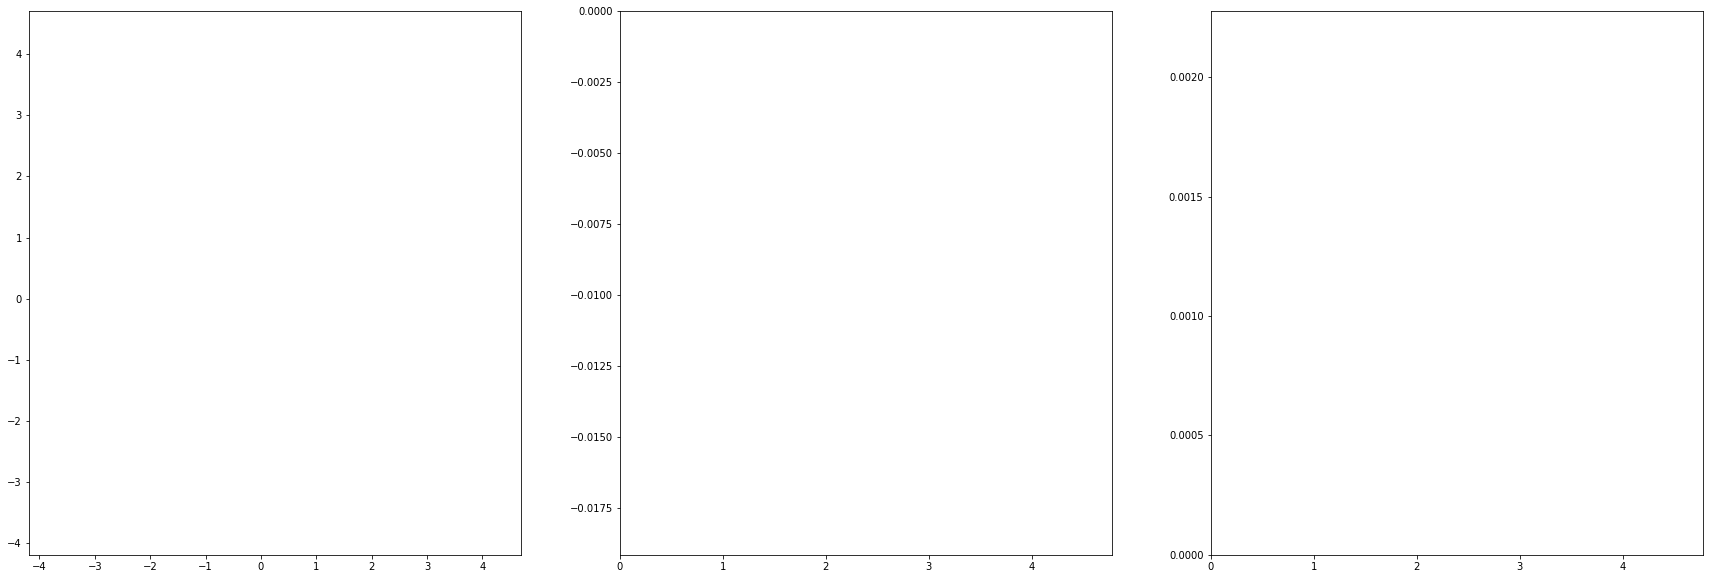

In [28]:
# initalize our figure
fig, ax = plt.subplots(1, 3, figsize = (10*3, 10))

# empty placeholders for different plots
trajectory1, = ax[0].plot([], []) # particle 1
trajectory2, = ax[0].plot([], []) # particle 2

energy, = ax[1].plot([],[])

angMom, = ax[2].plot([],[])

# set bounds
ax[0].set_xlim(r.min()/AUinCM, r.max()/AUinCM)
ax[0].set_ylim(r.min()/AUinCM, r.max()/AUinCM)

ax[1].set_xlim(t.min(),t.max())
ax[1].set_ylim(E.min(),E.max())

ax[2].set_xlim(t.min(),t.max())
ax[2].set_ylim(L.min(),L.max())

# here there will be nothing showing up, but we can check our 
#  x/y coords look good

In [29]:
# plot how many steps?  i.e. every X number of steps?
# we probably don't want a huge movie with every step
stepSize = 500

Number of frames =  100



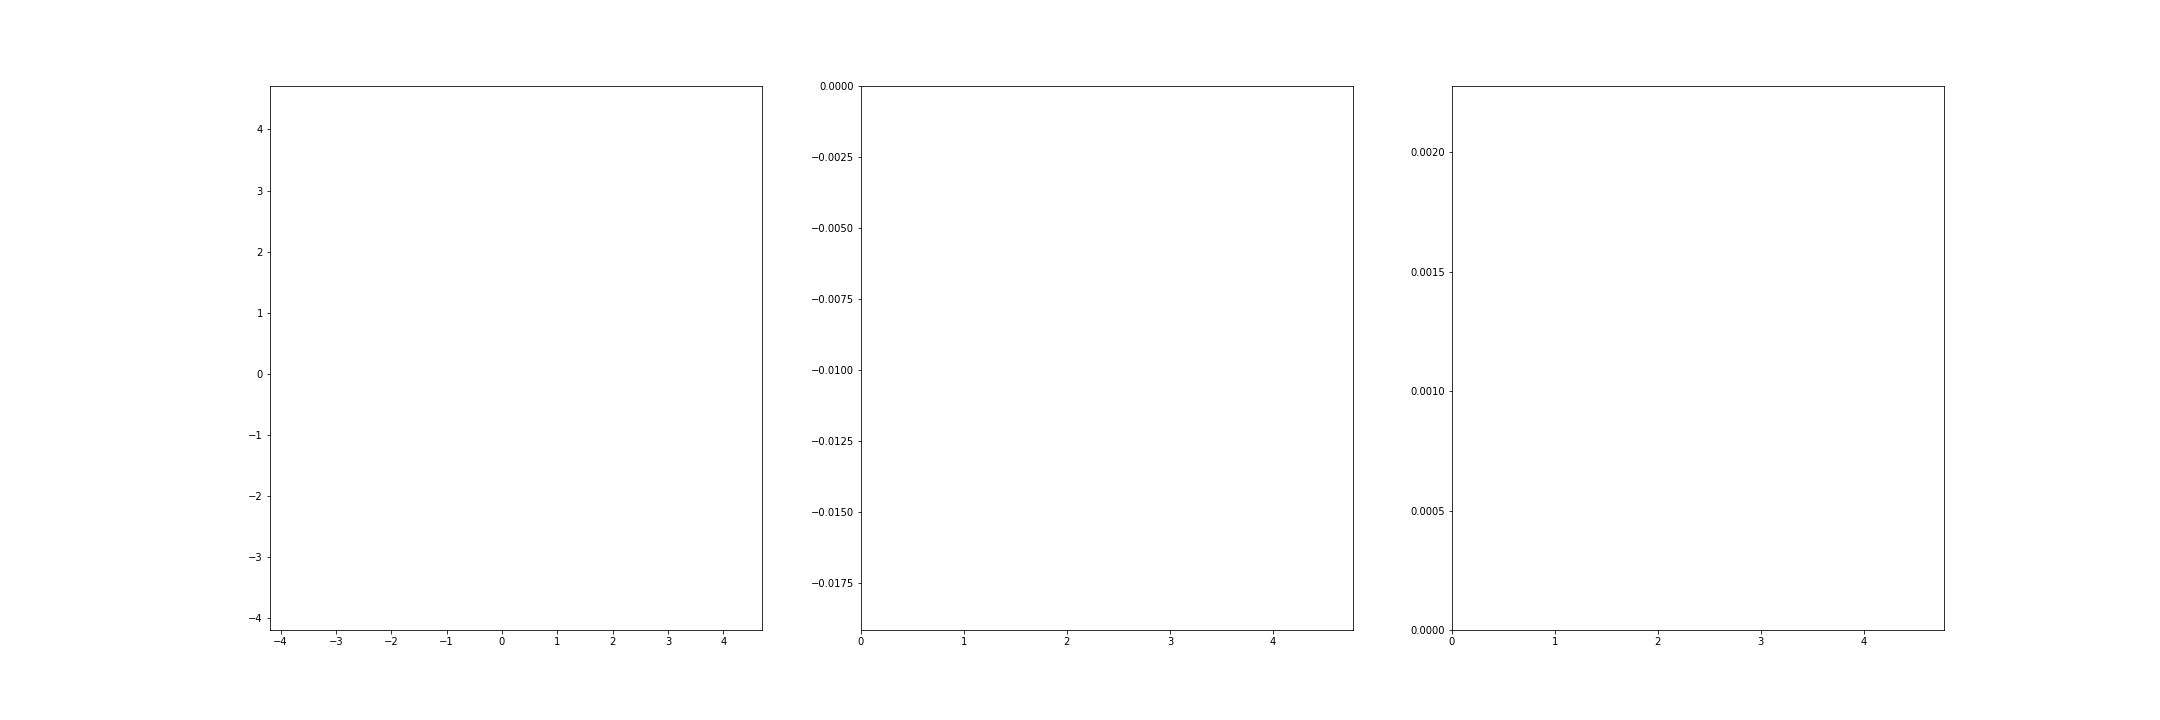
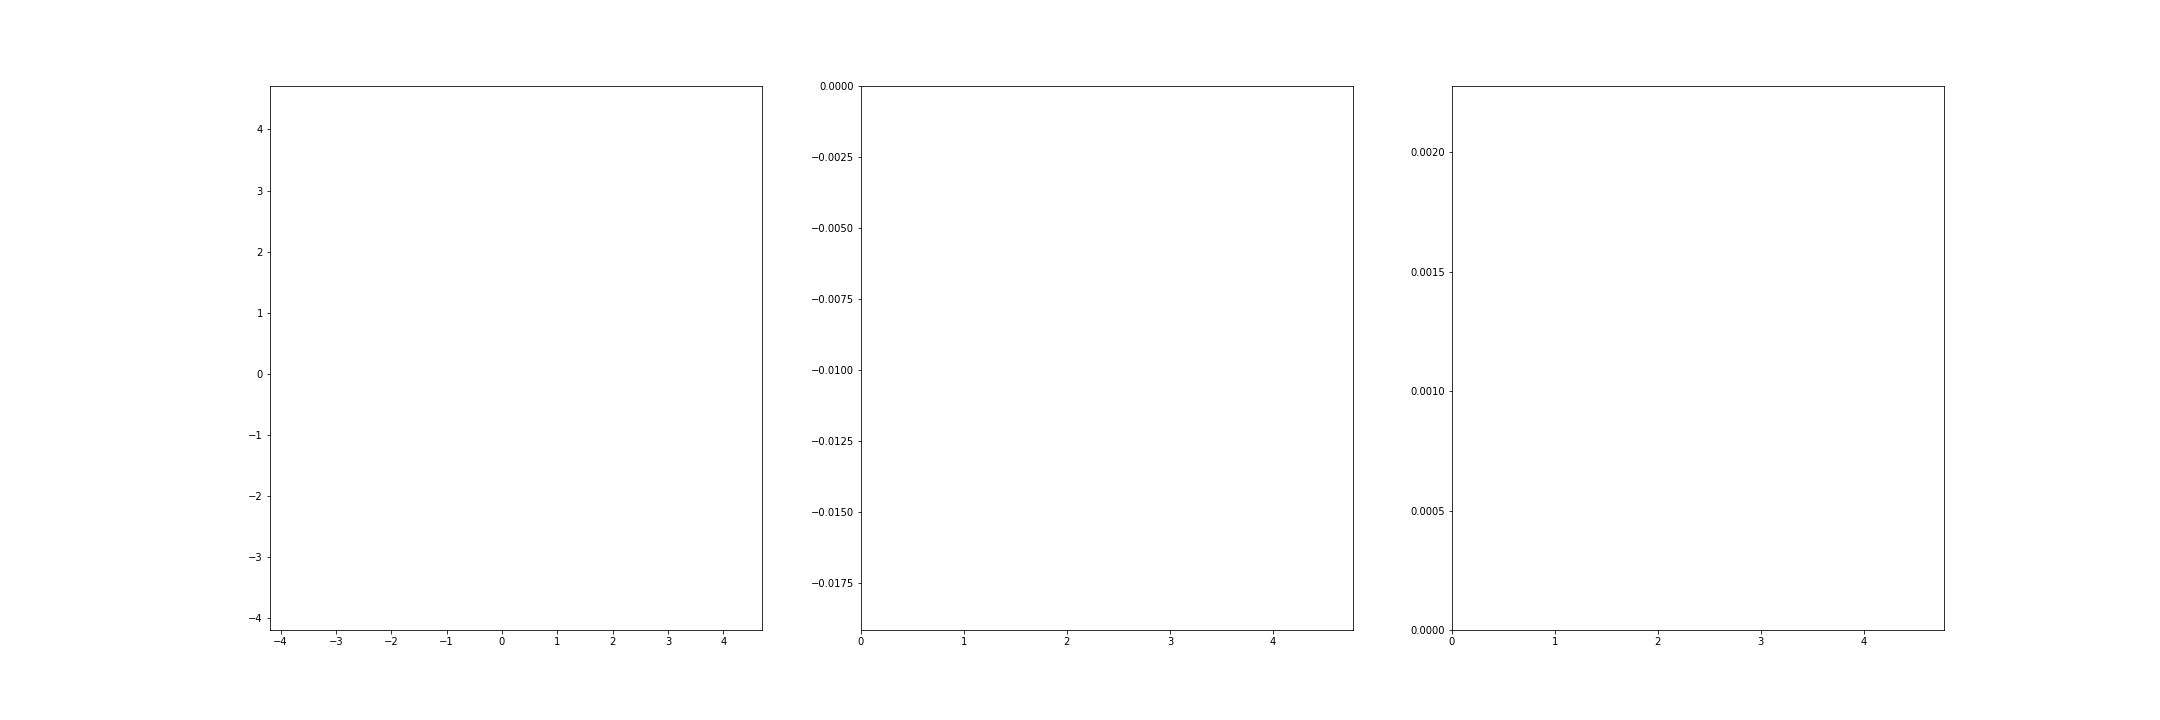
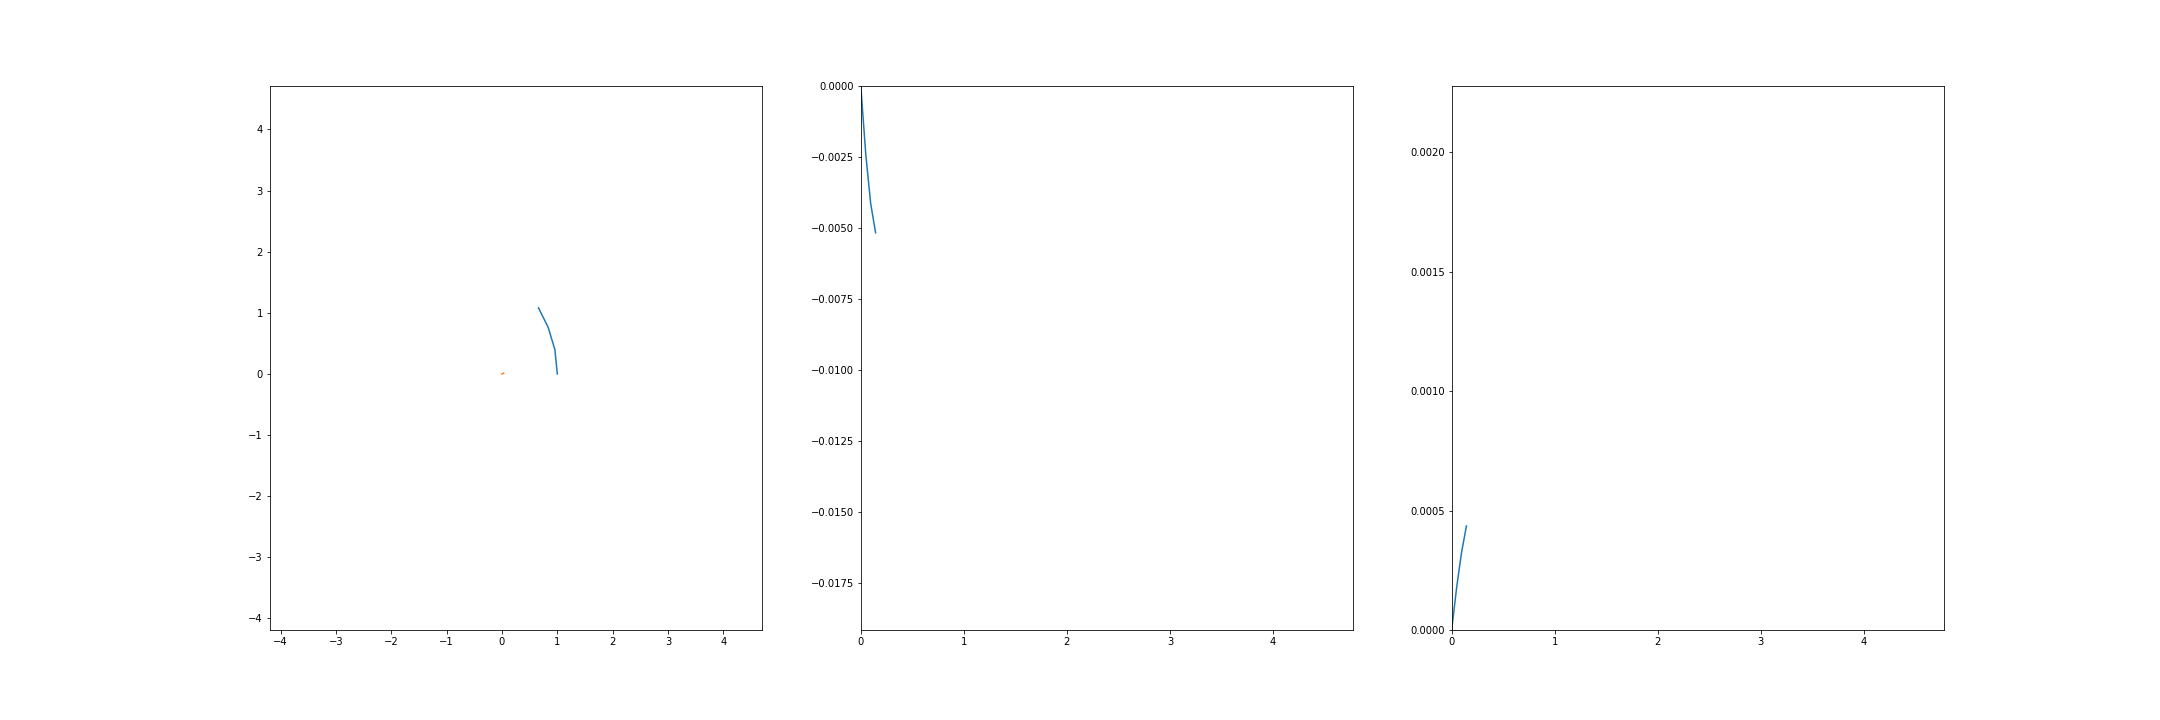
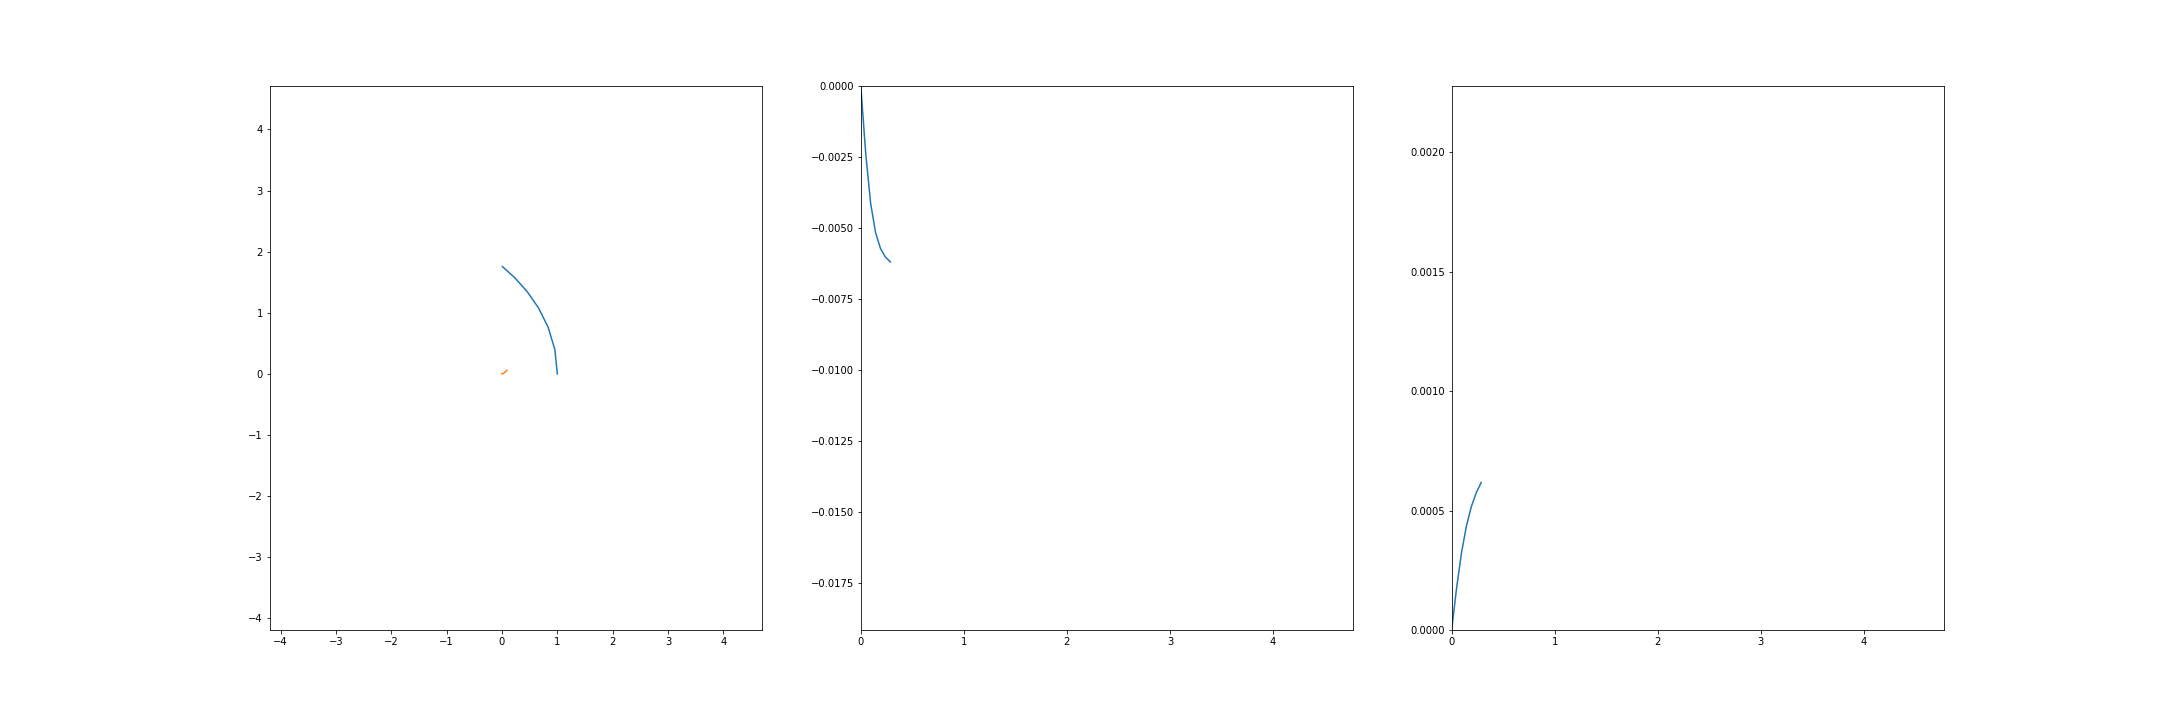
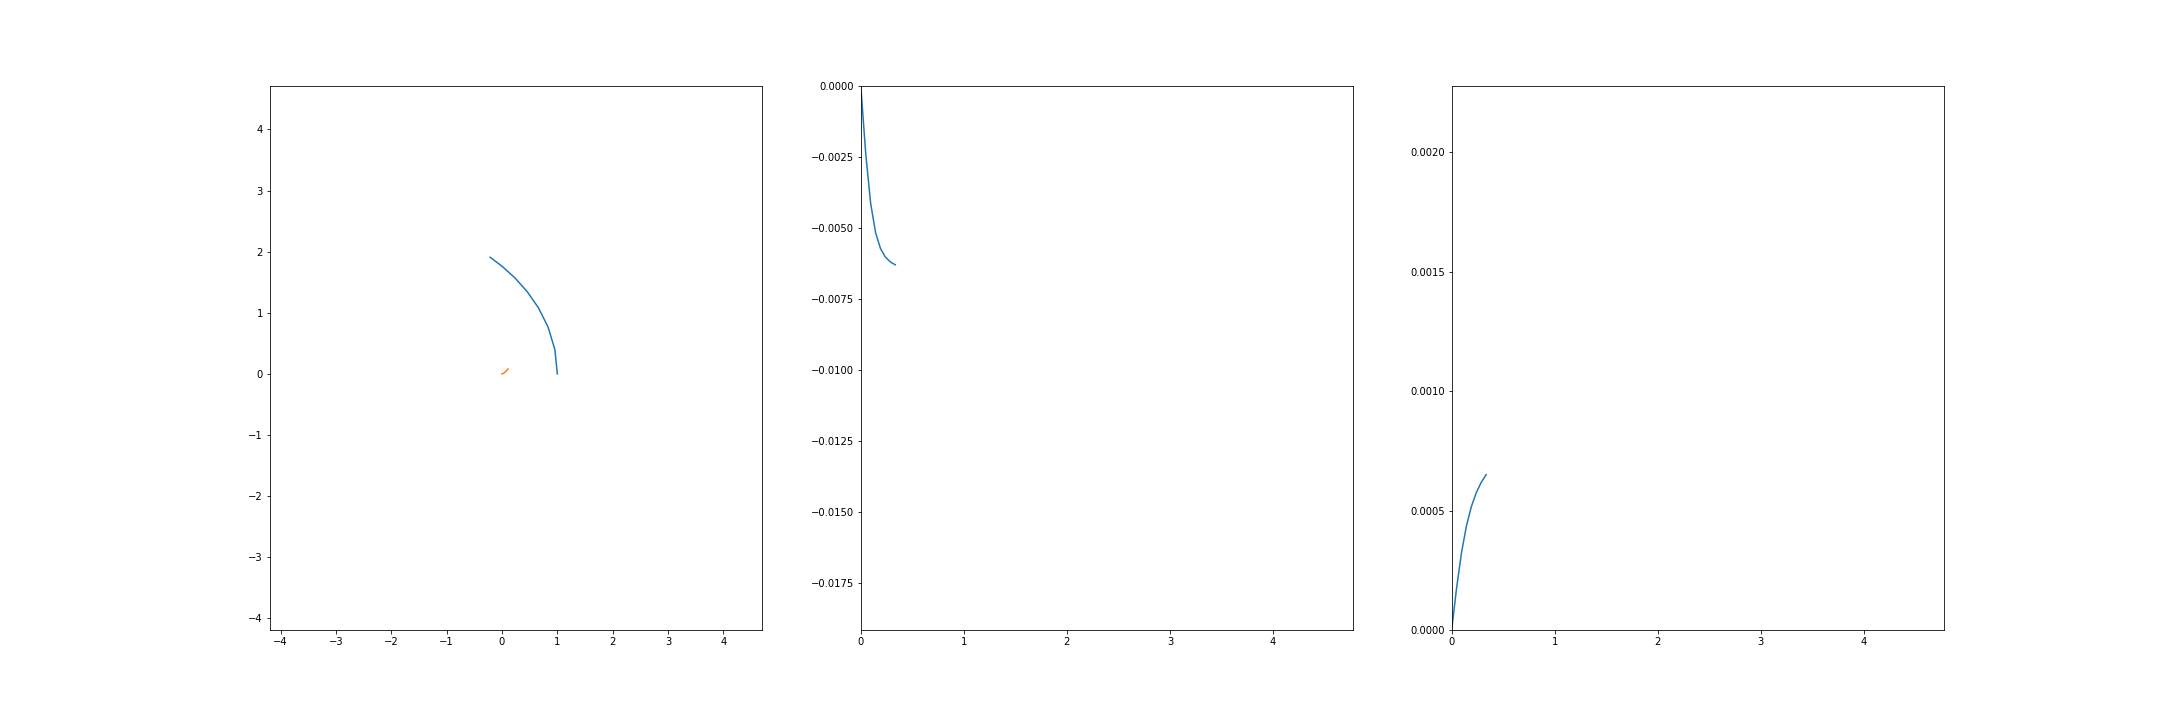
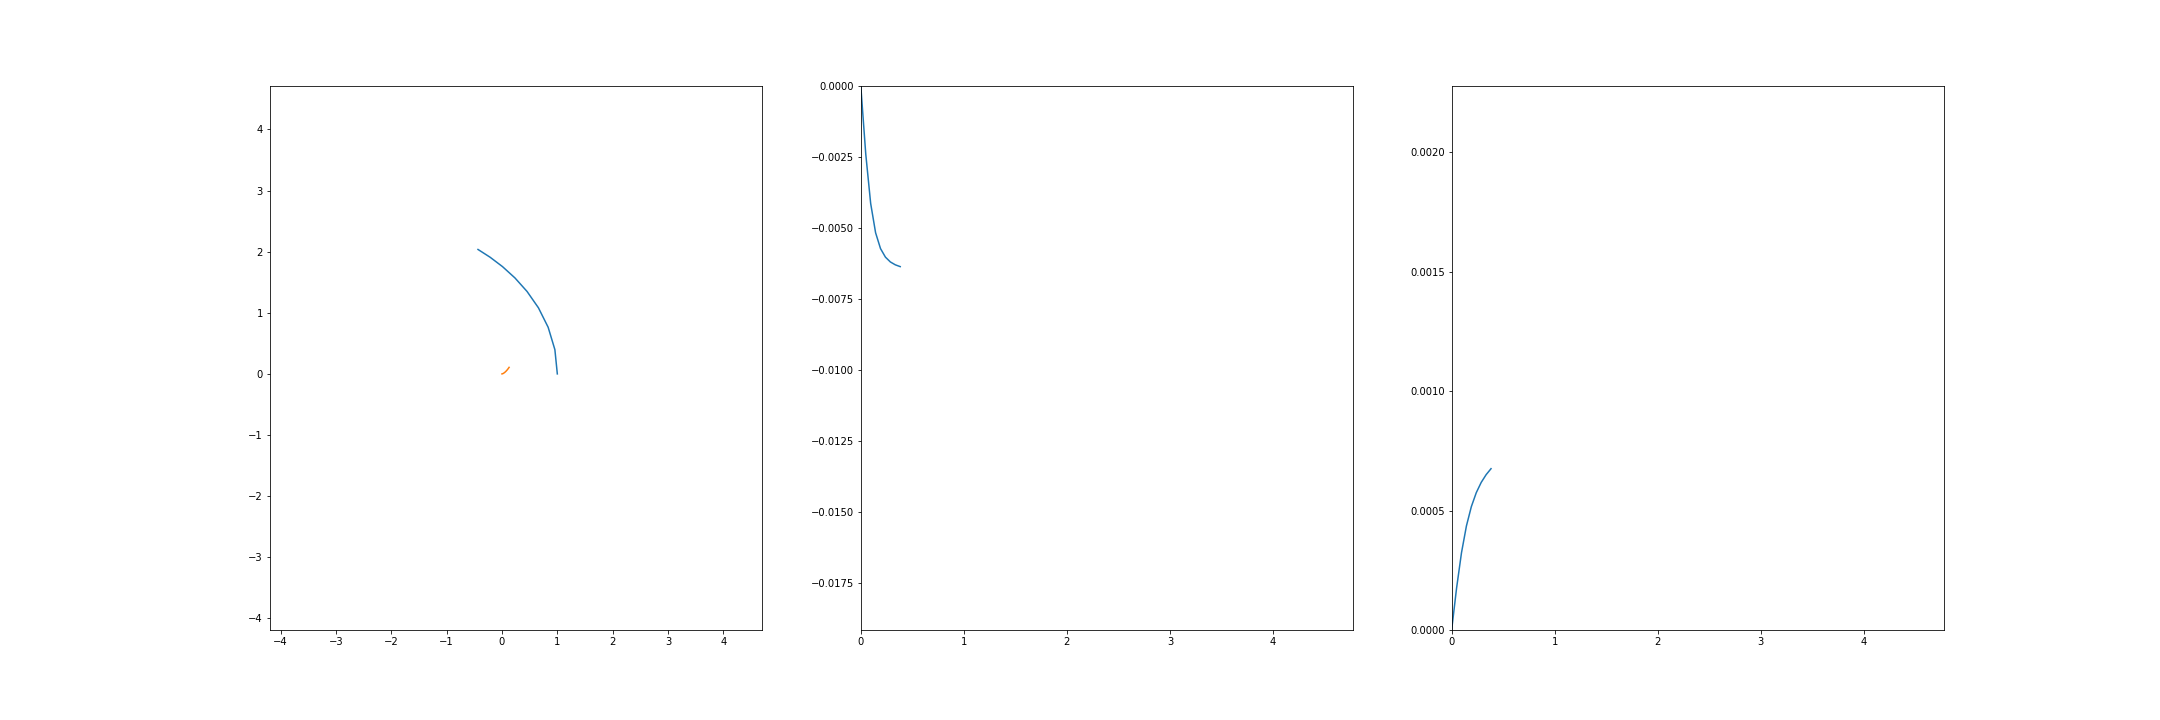
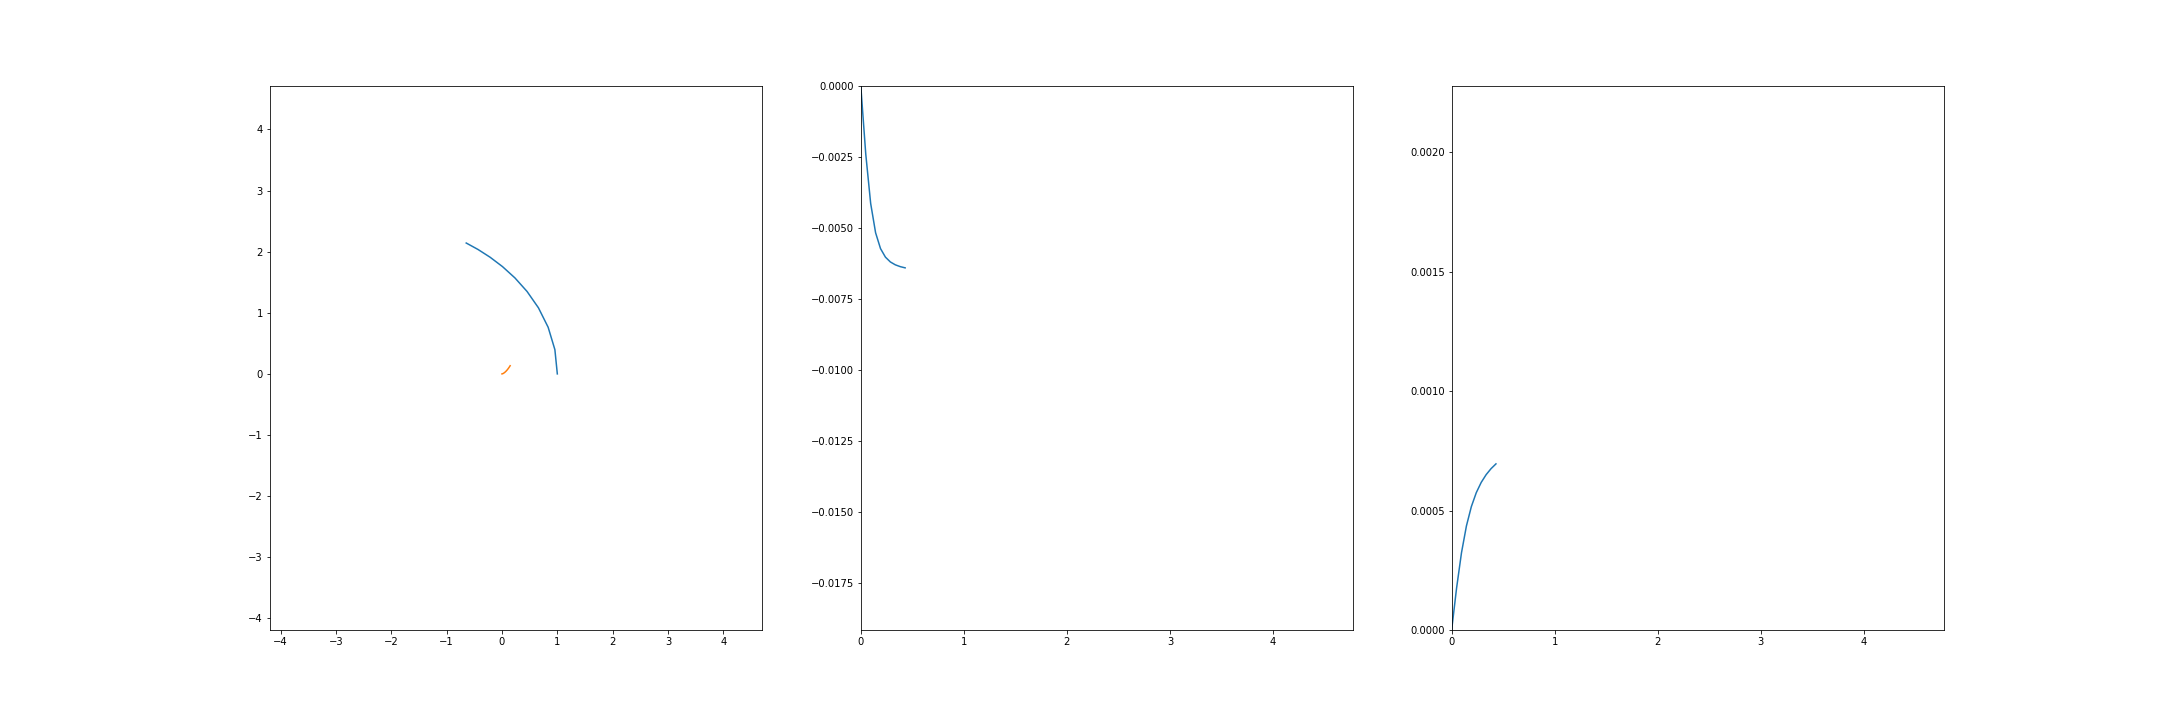
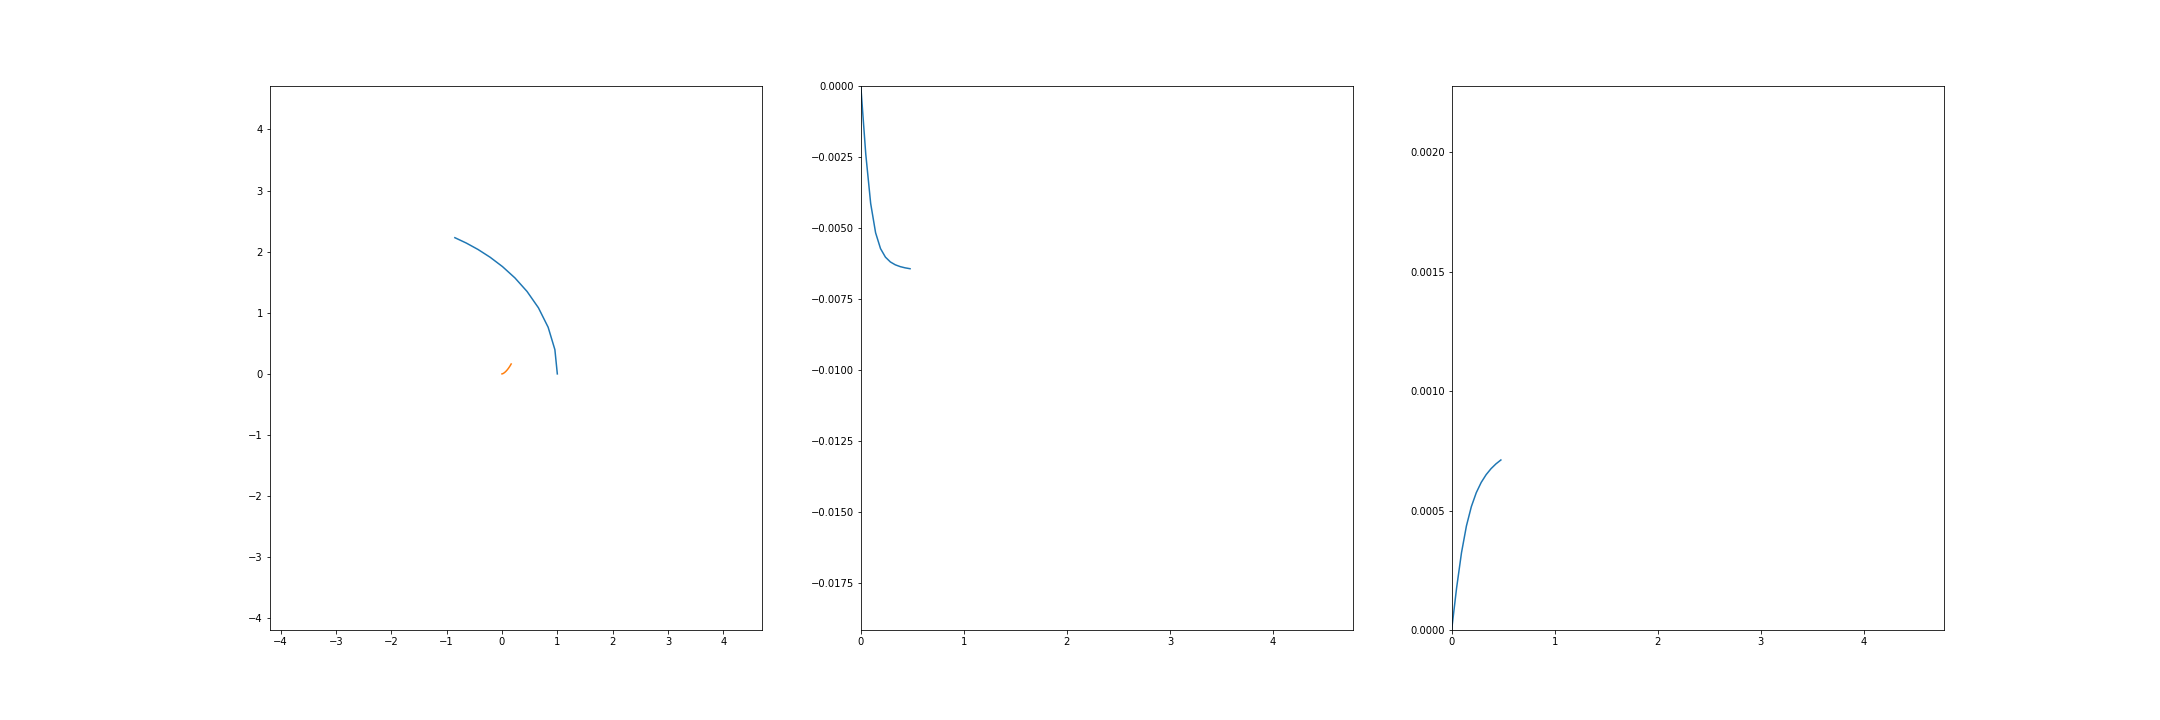
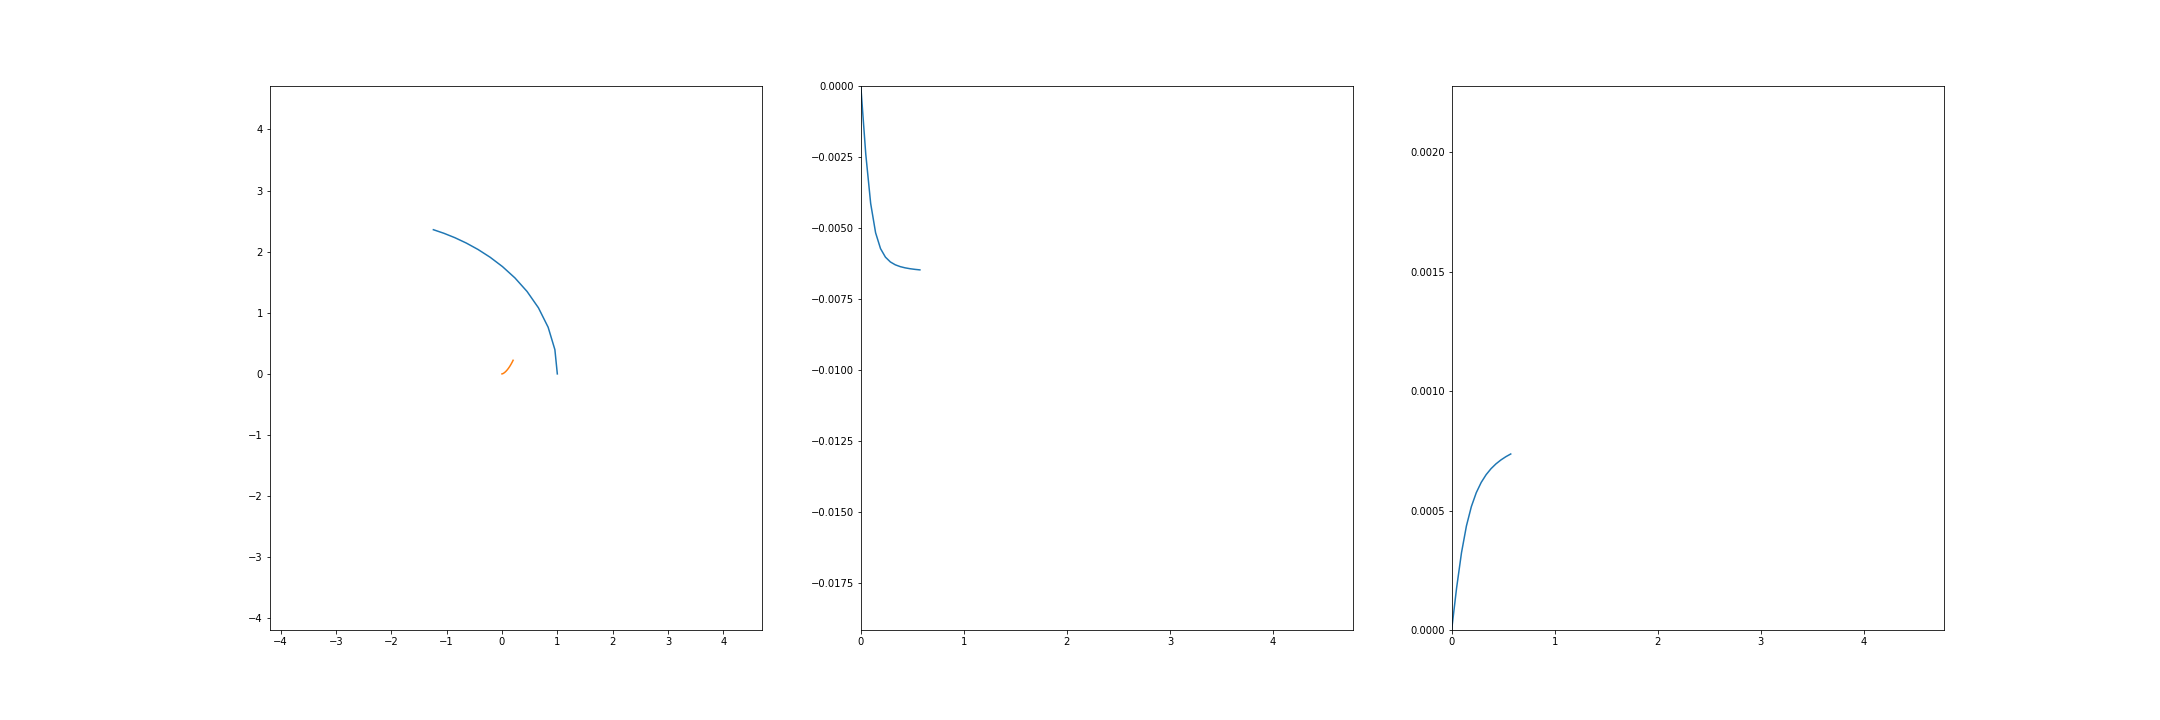
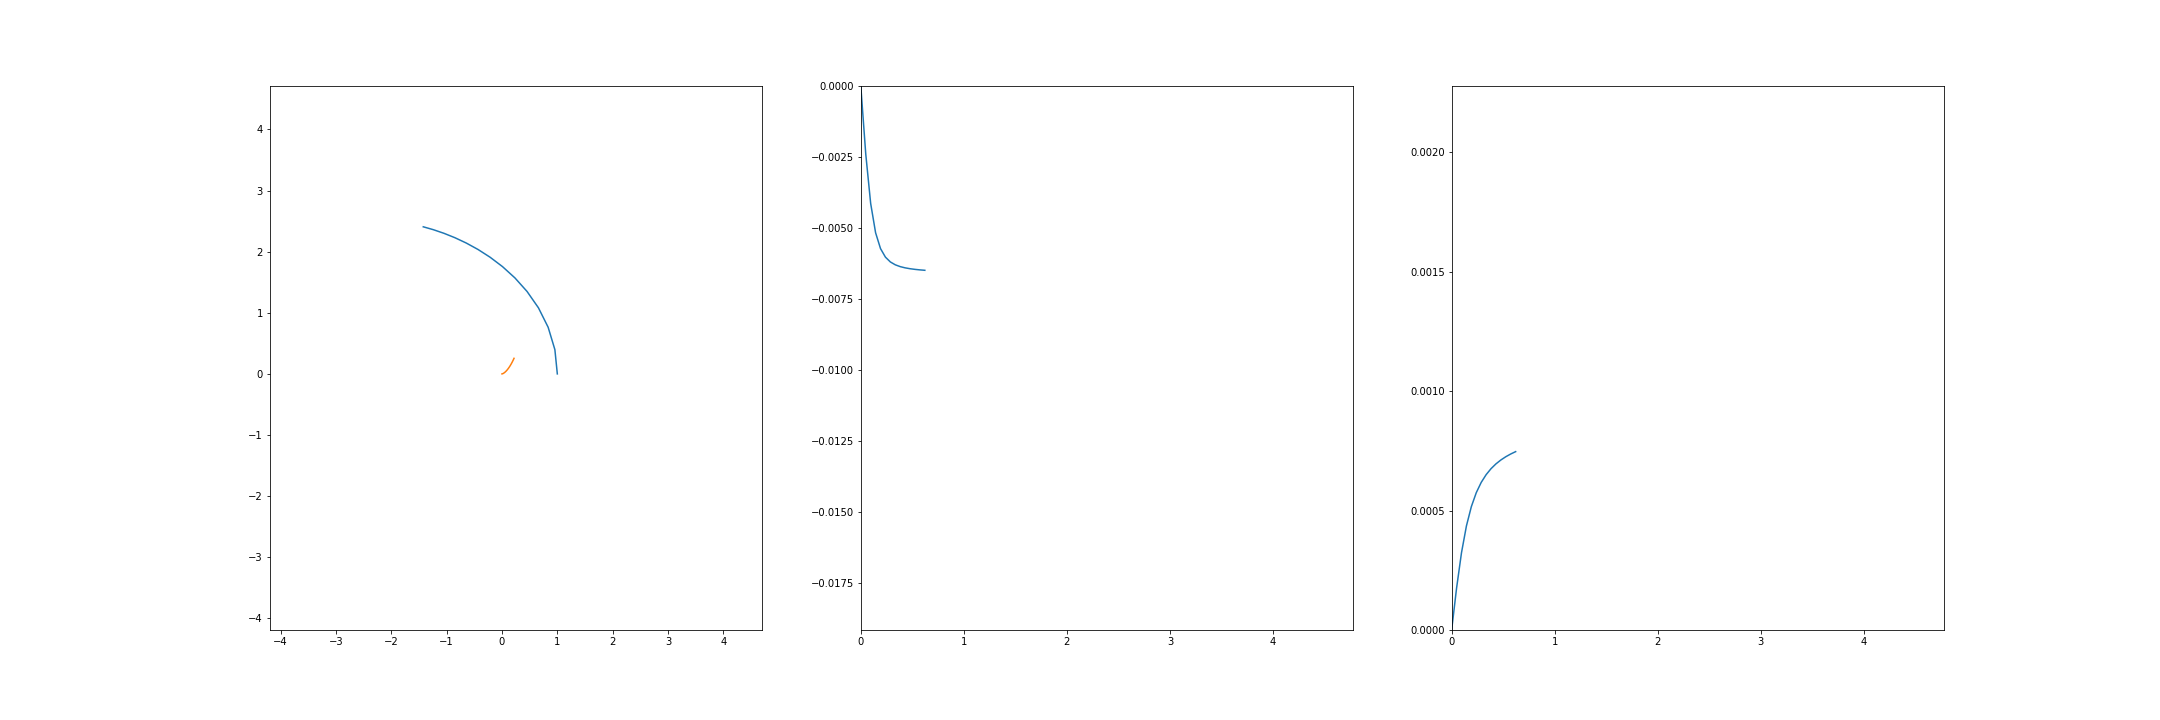
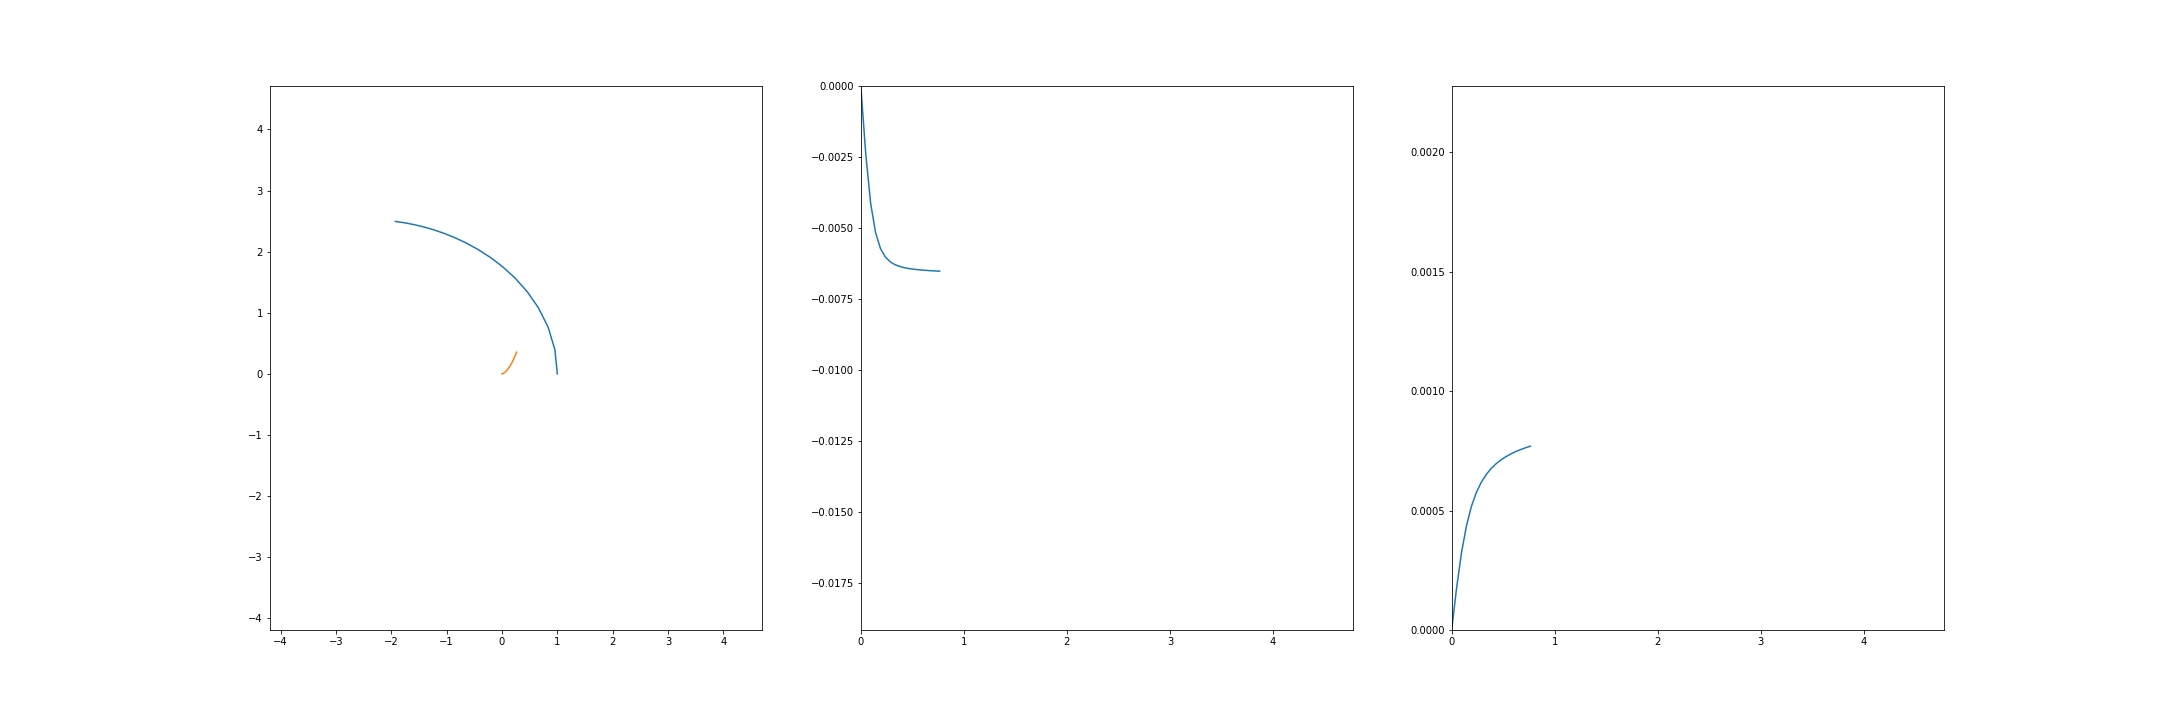
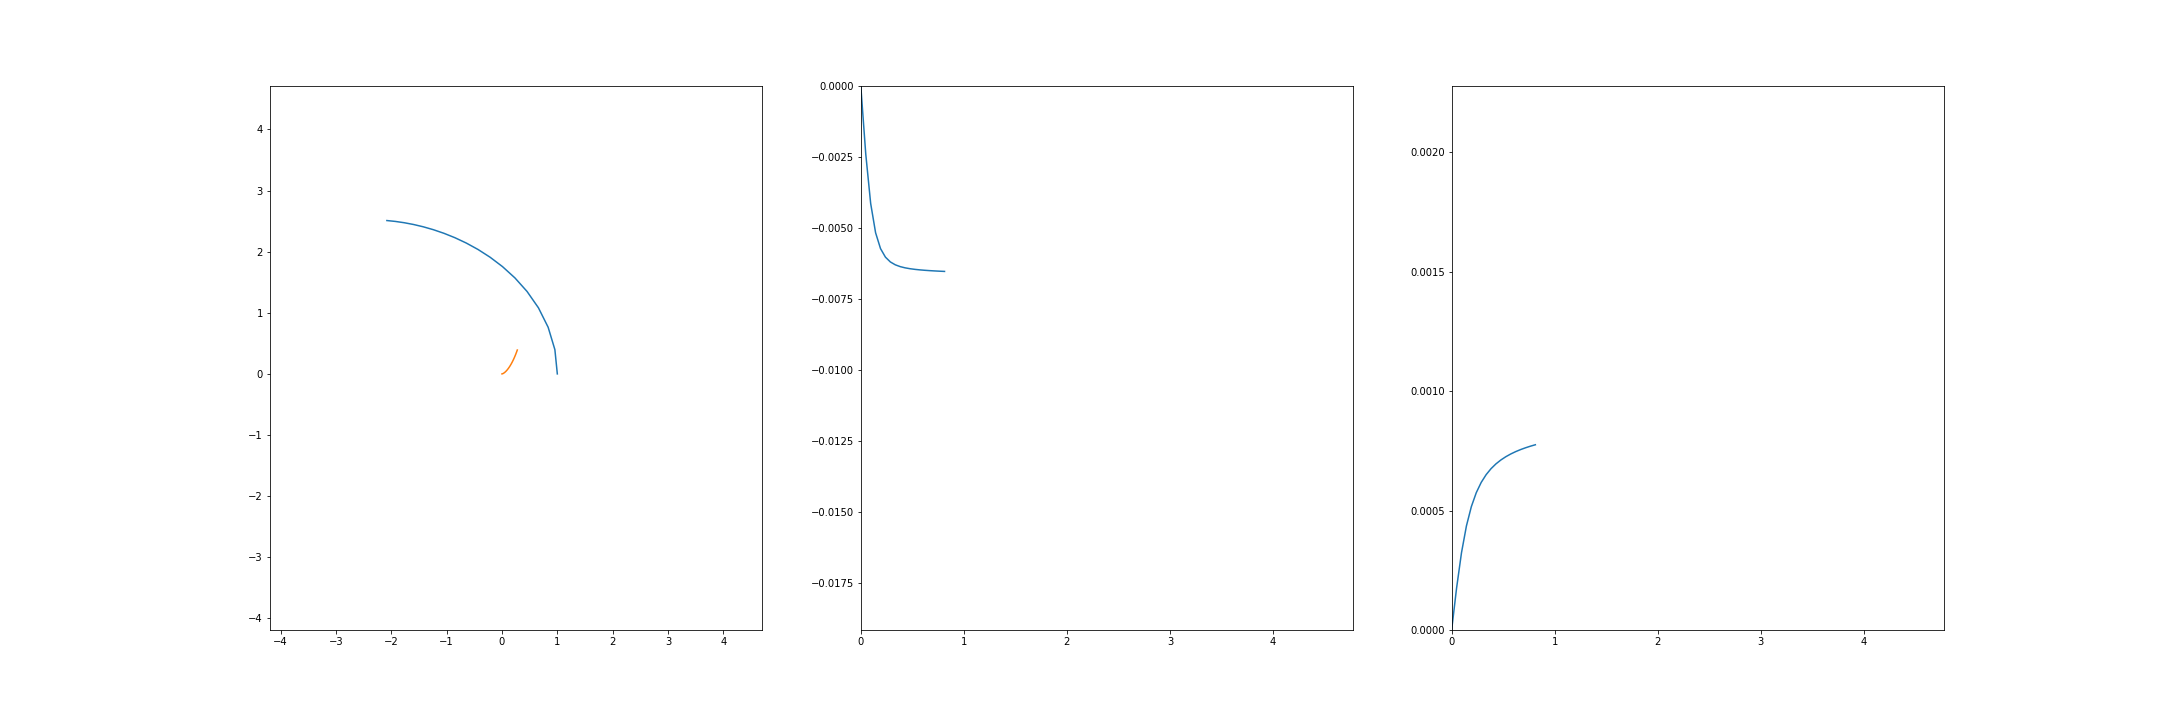
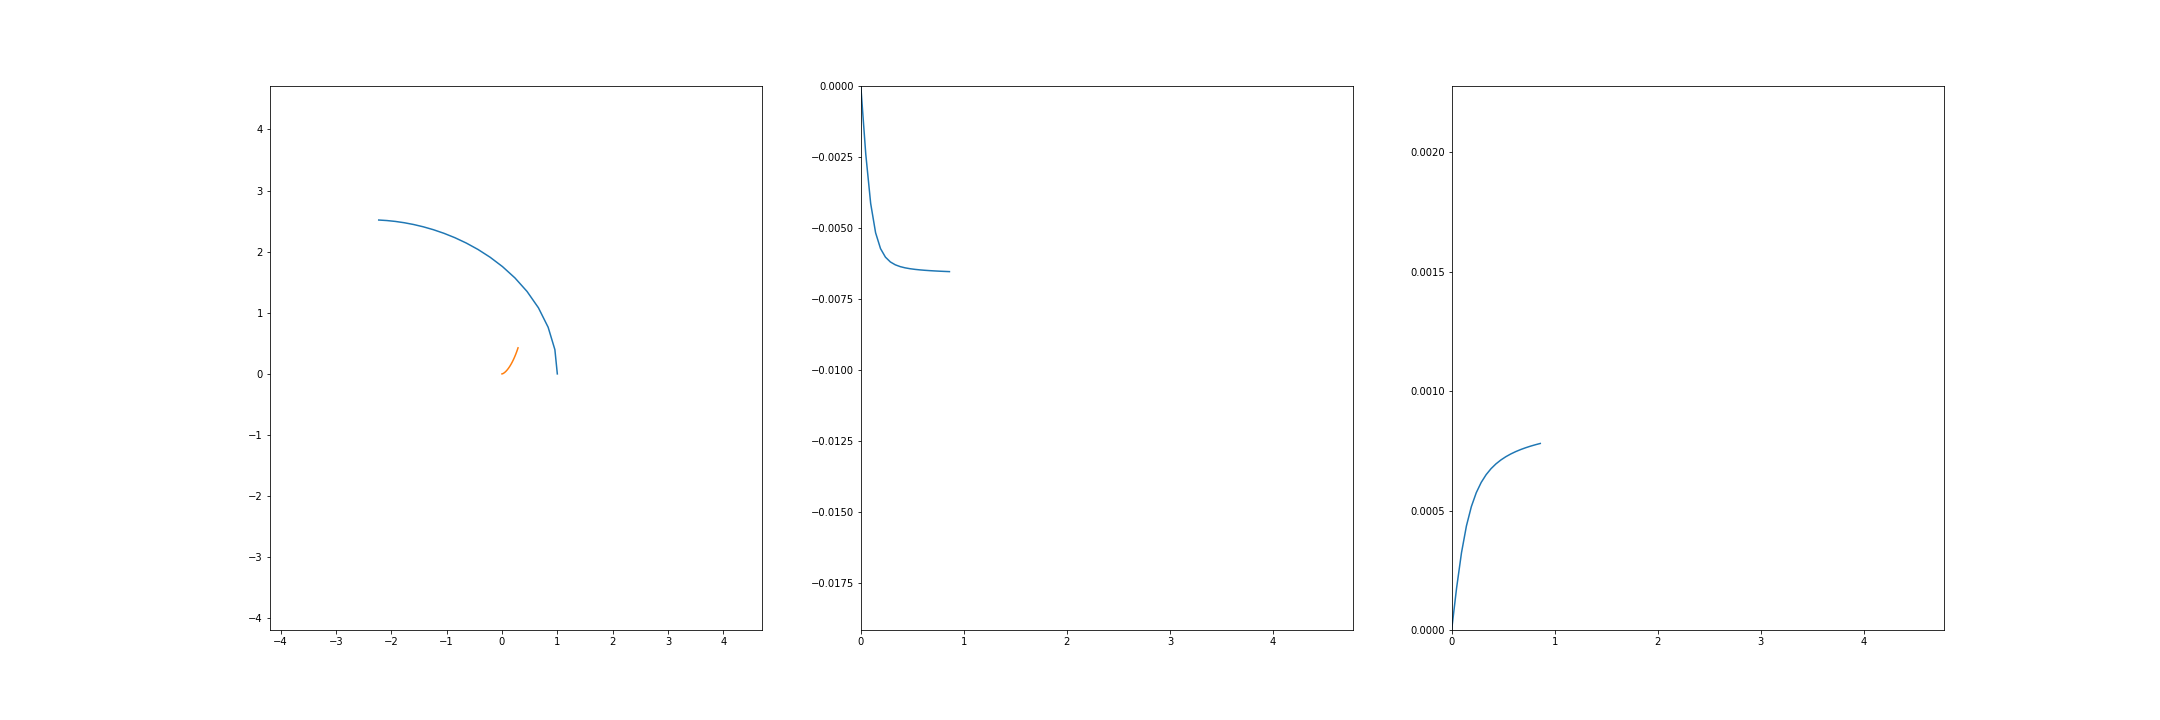
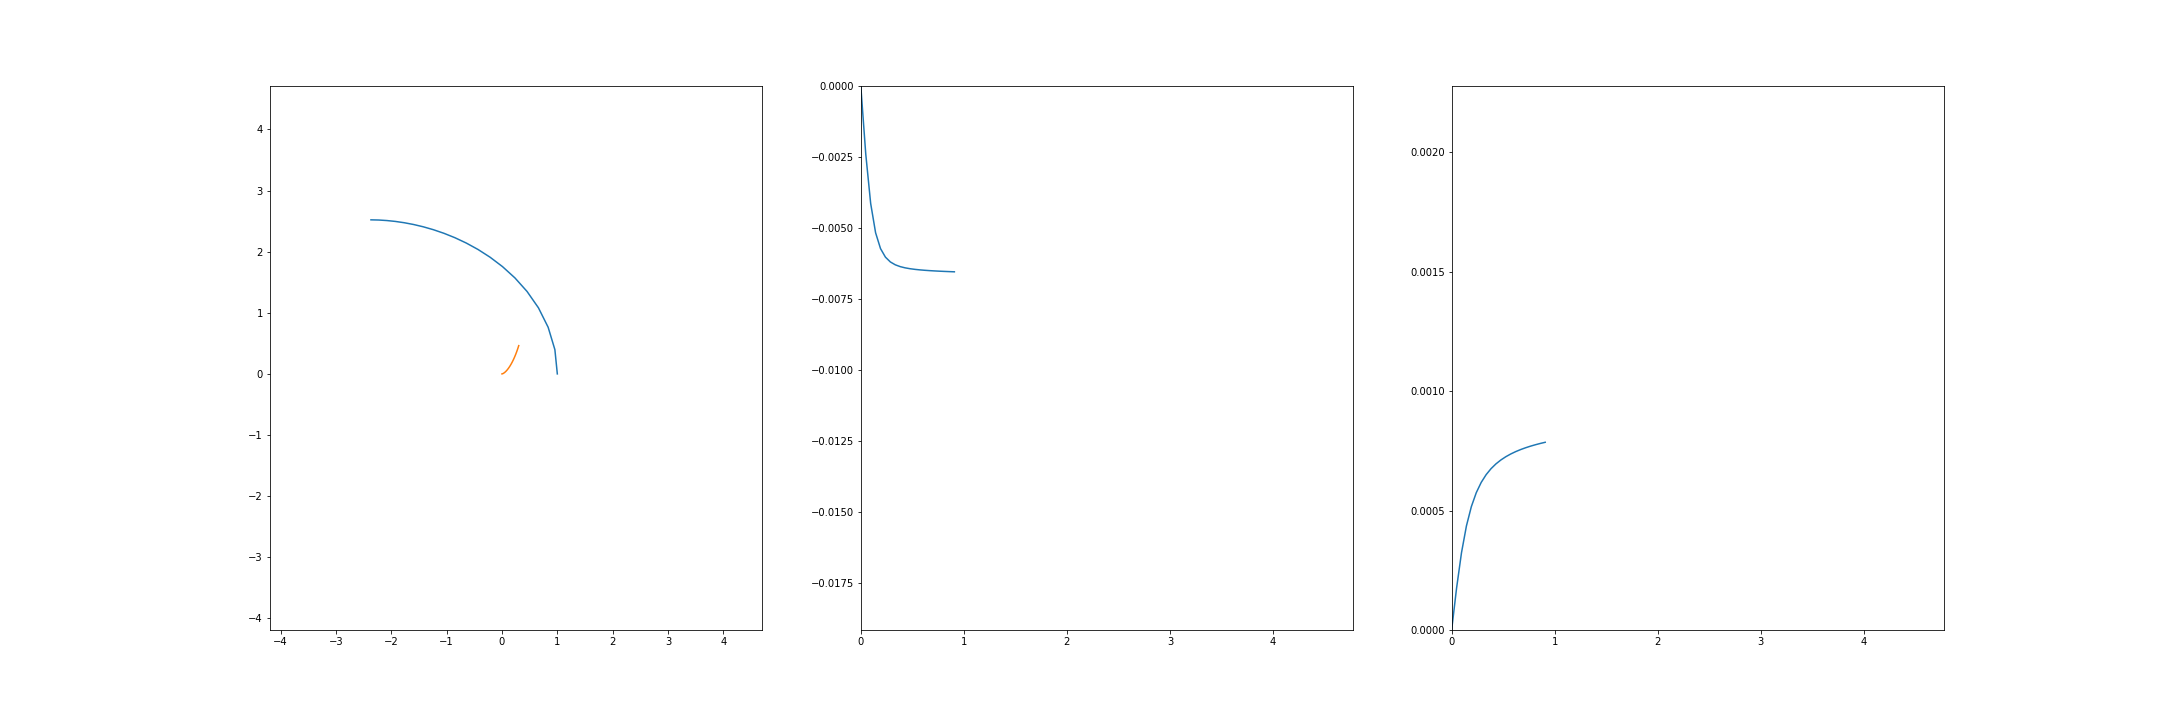
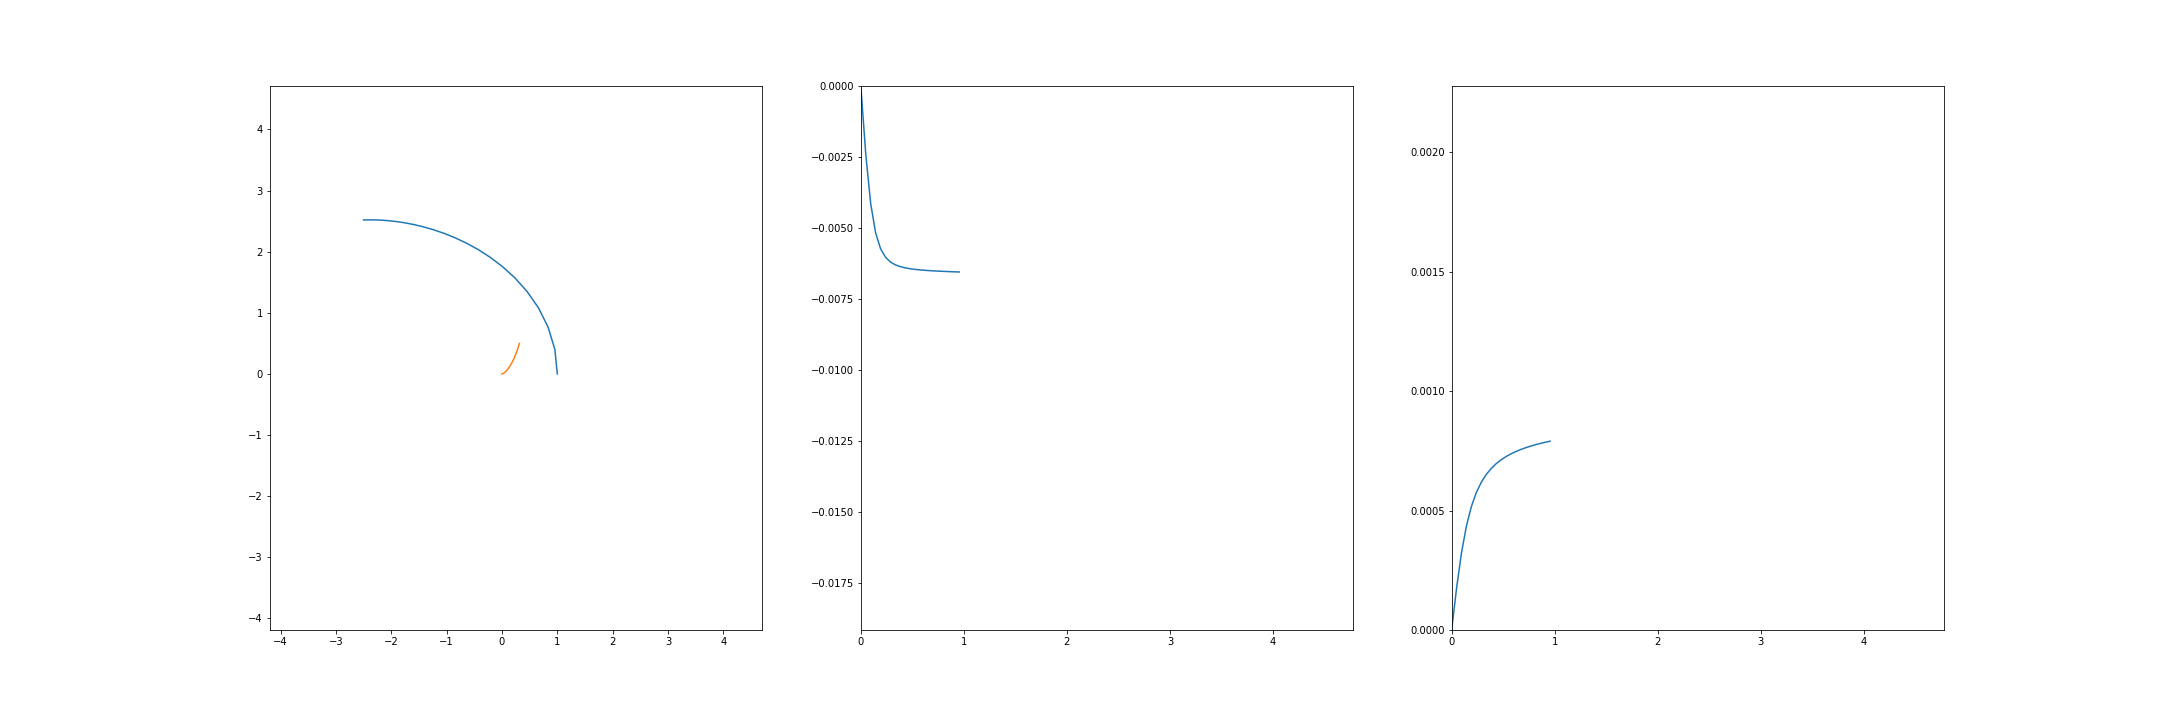
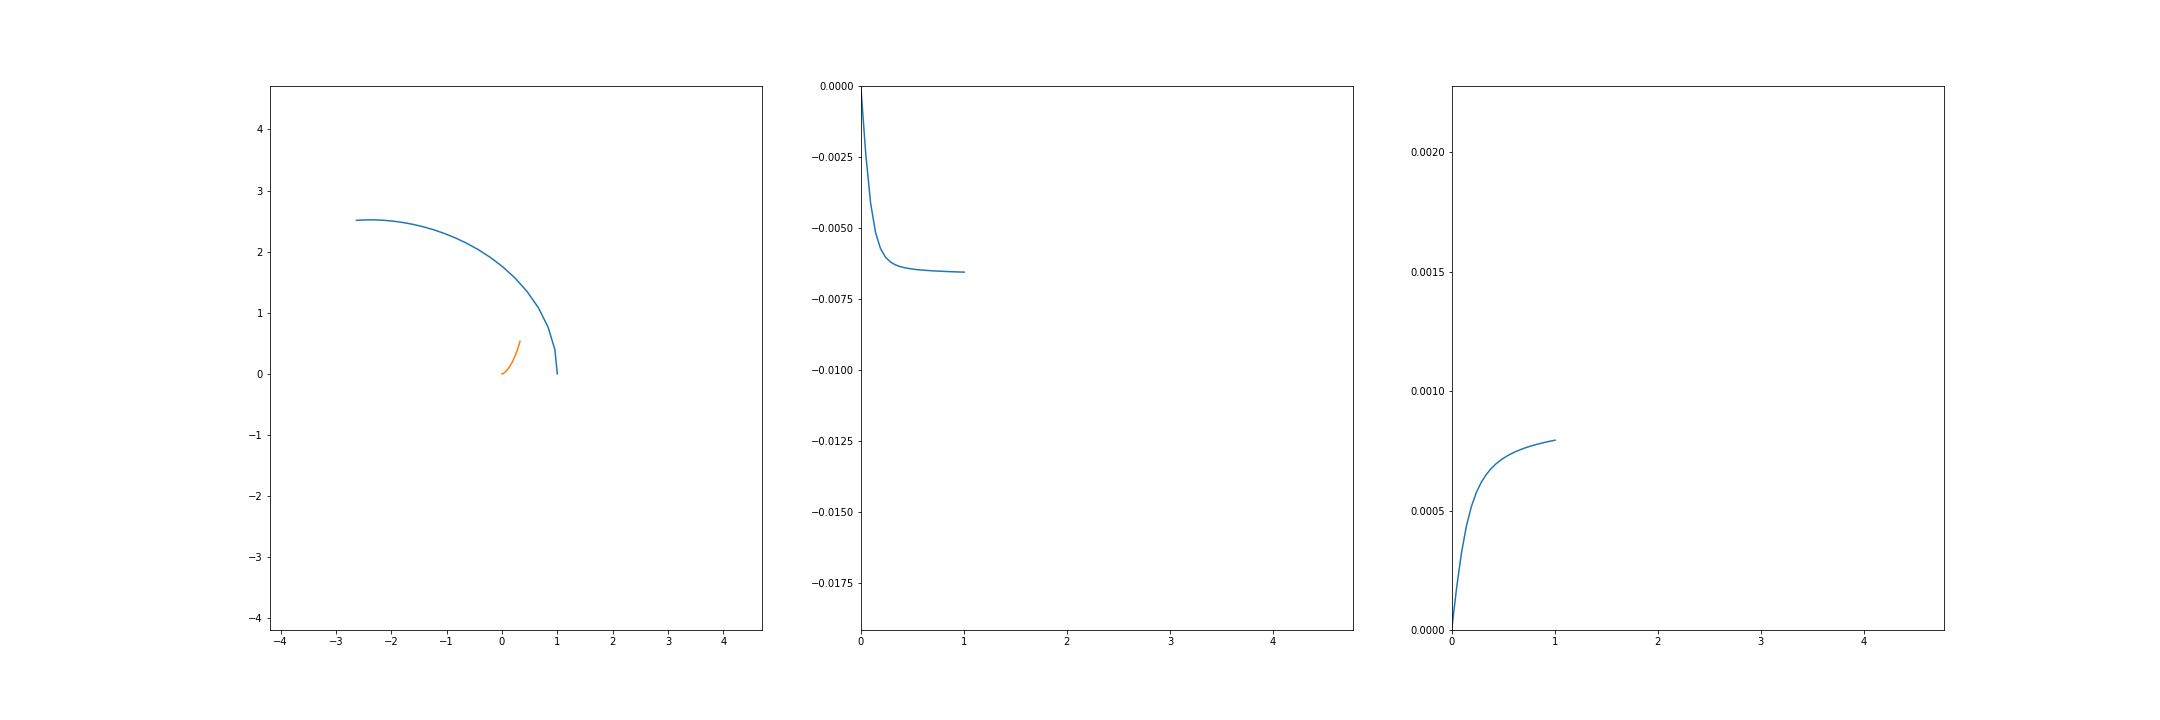
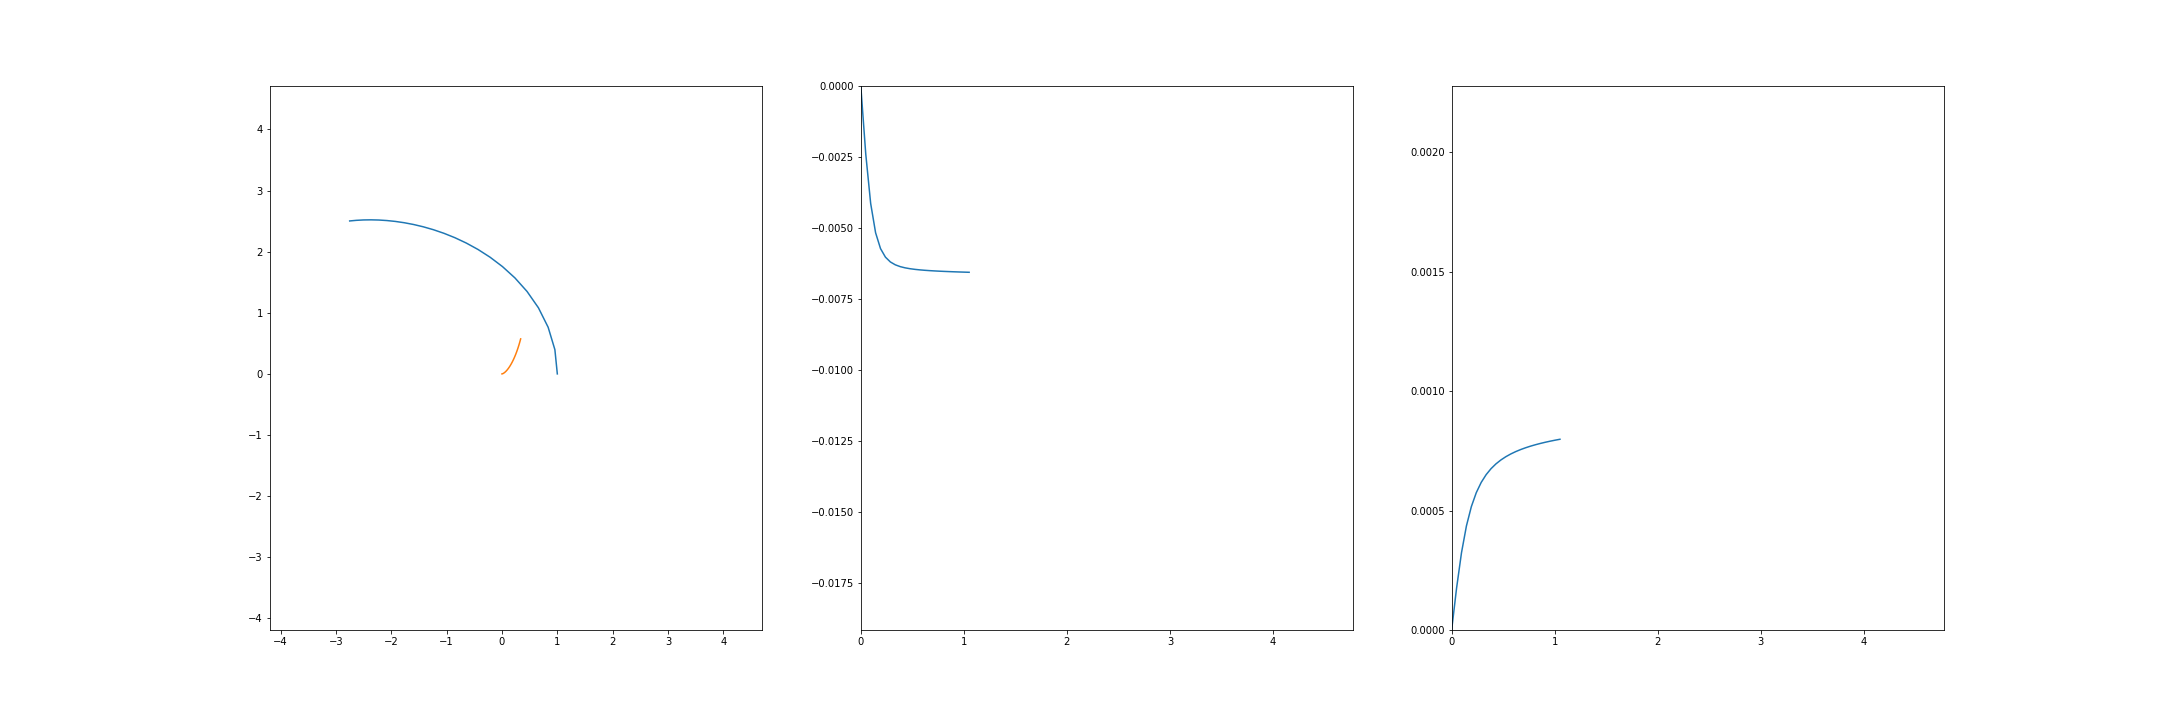
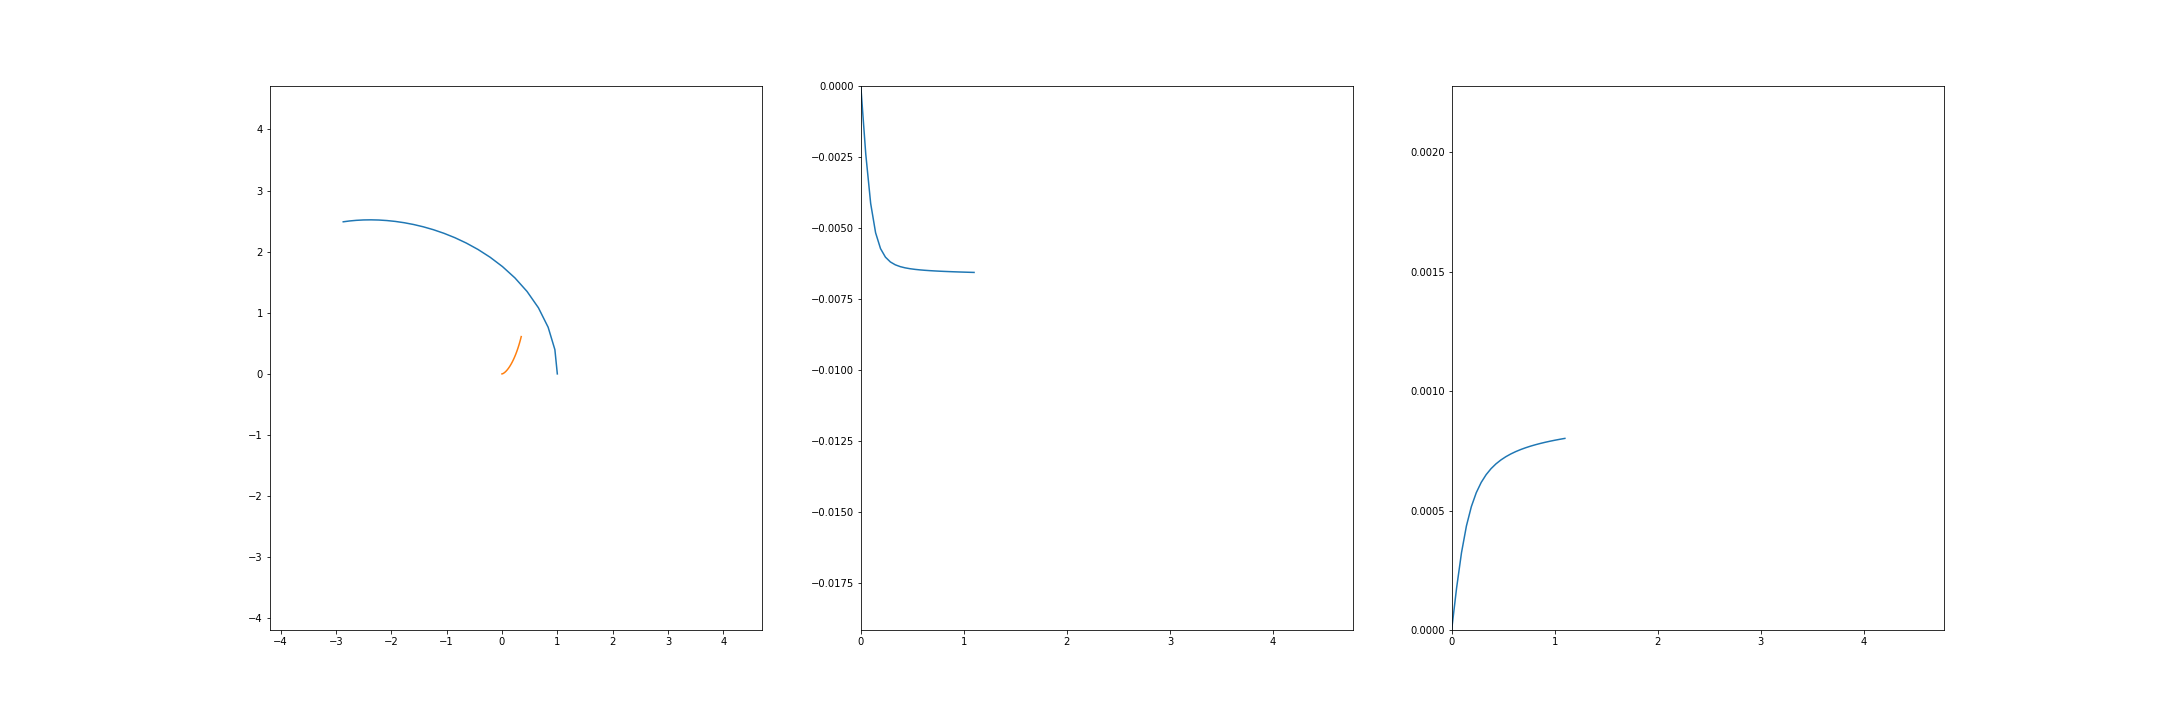
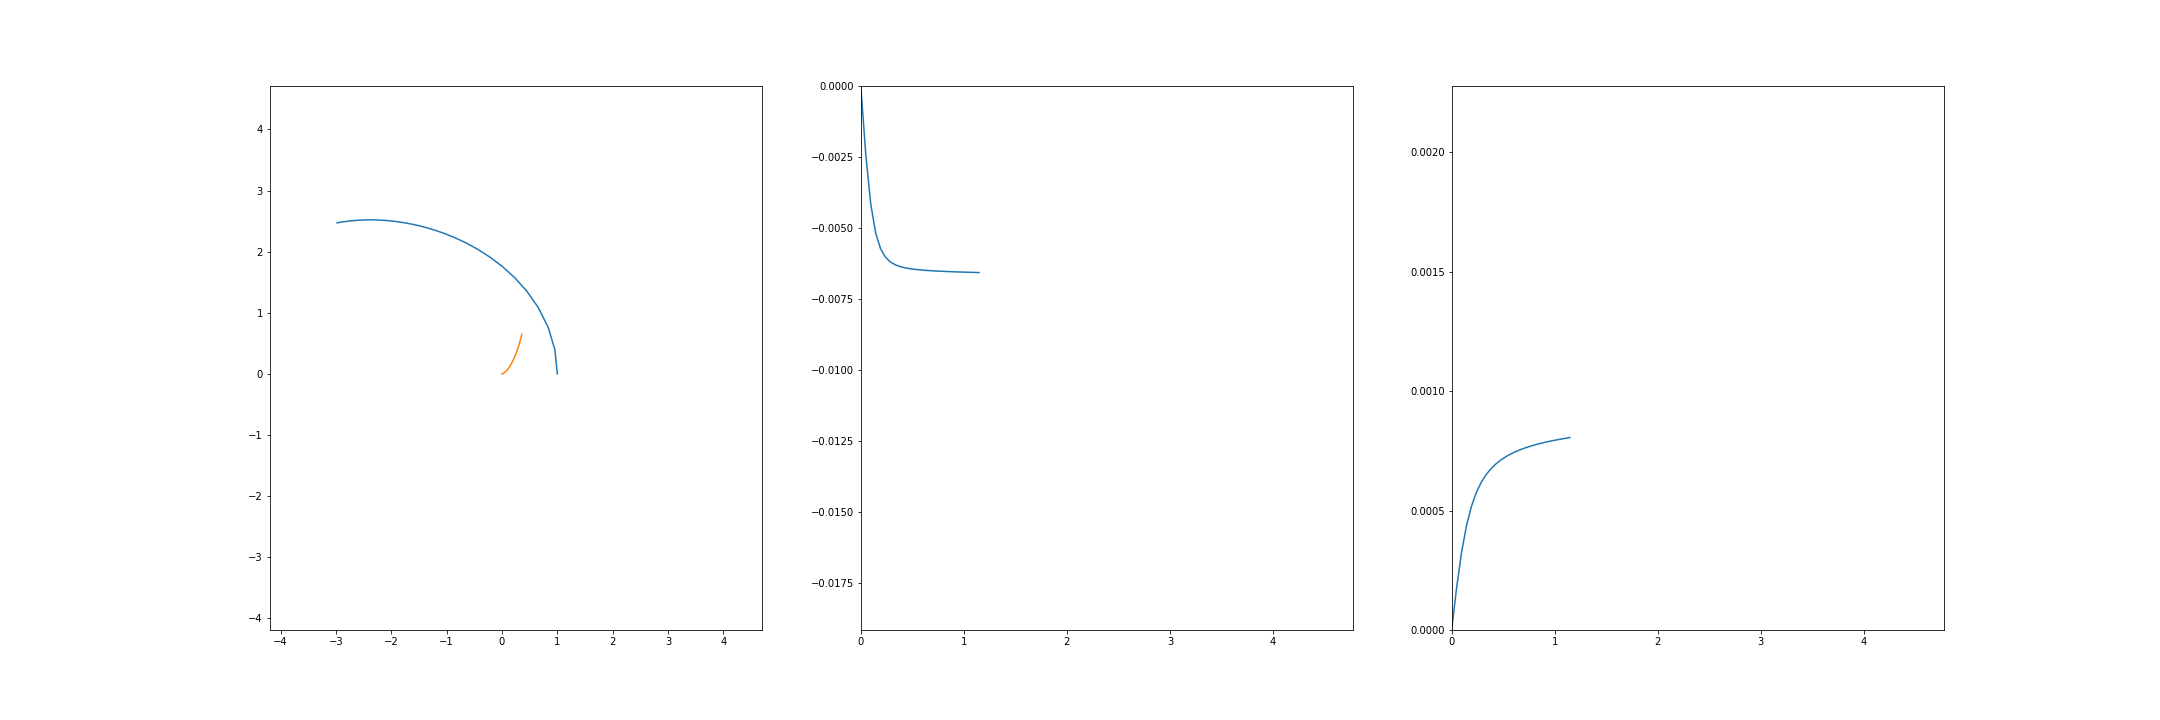
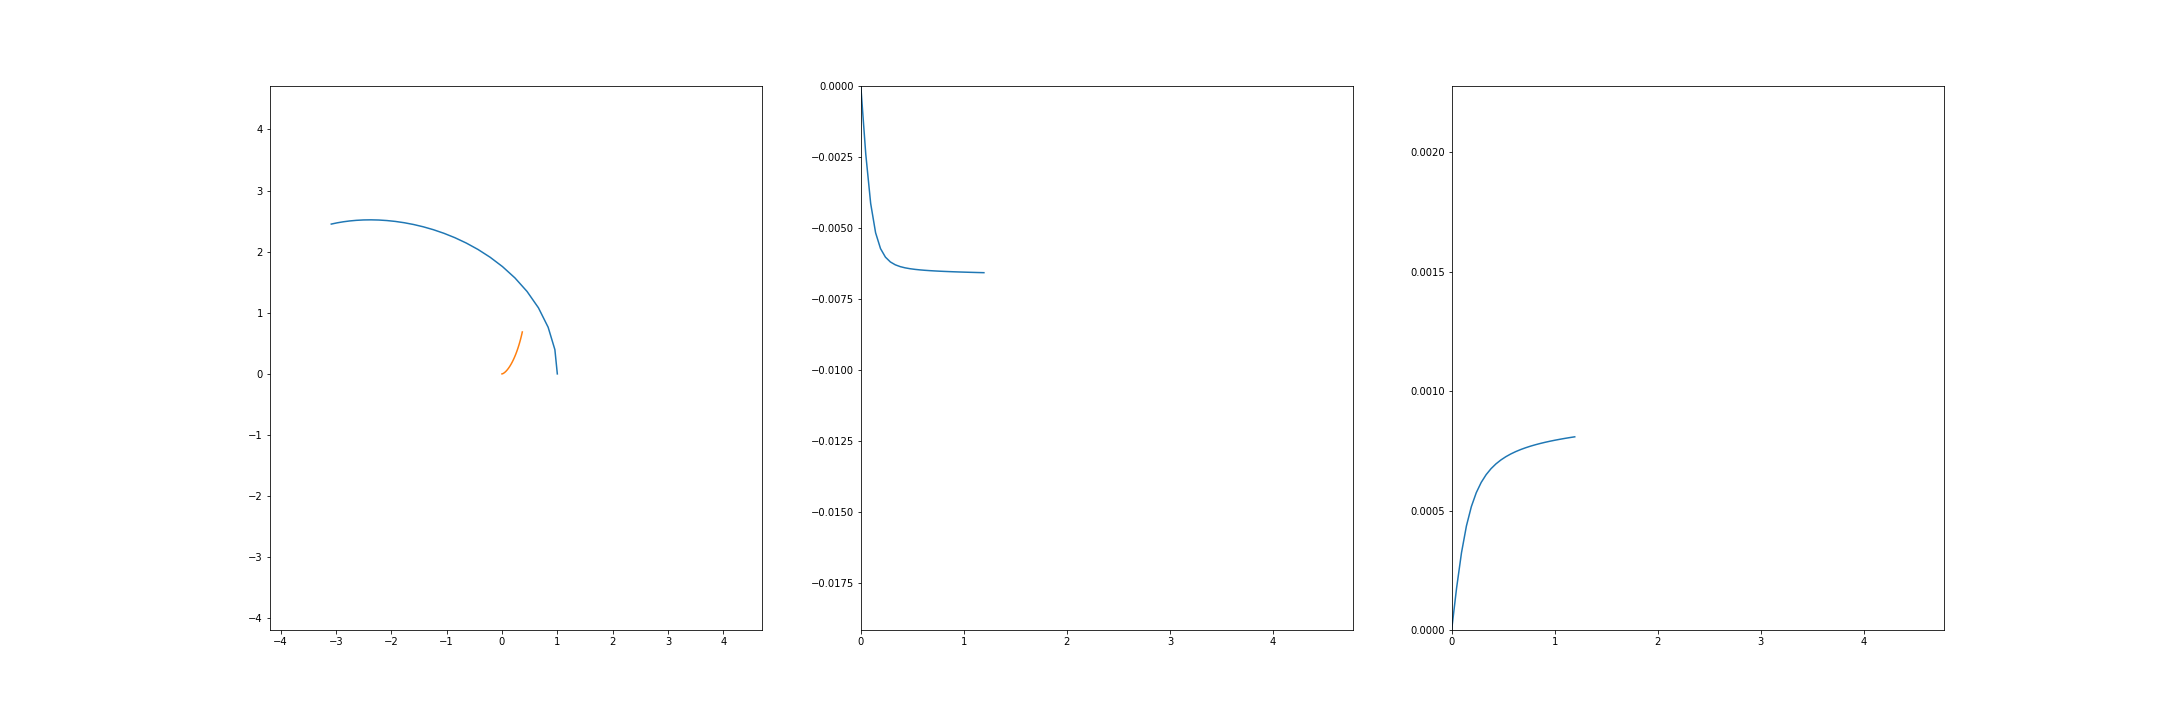
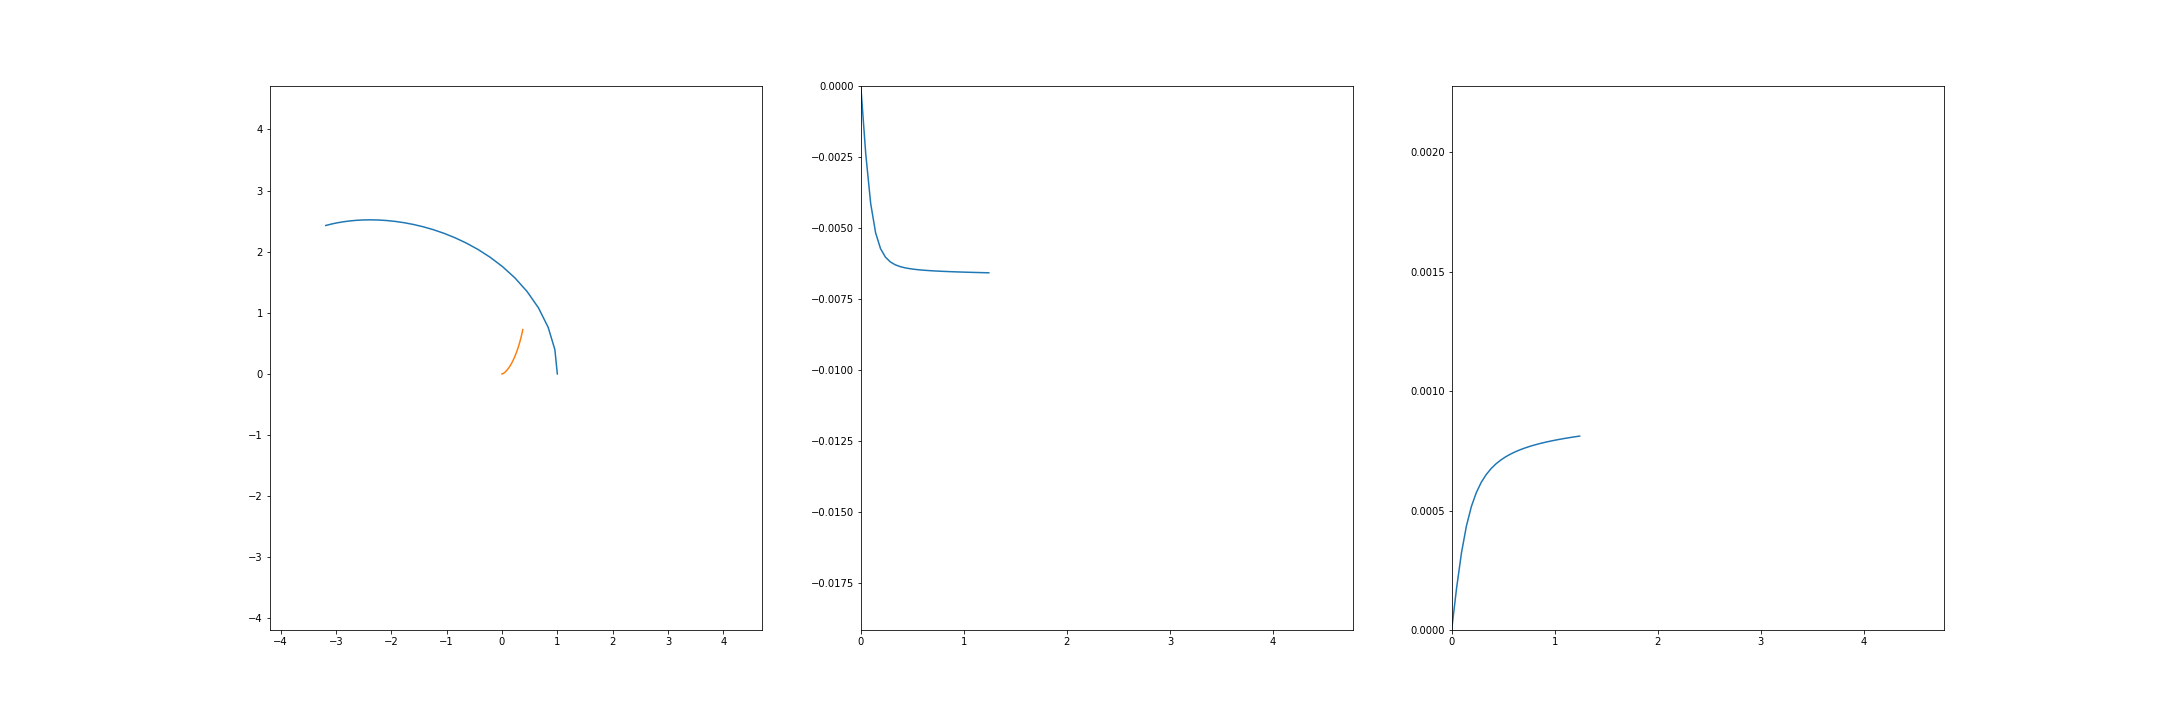
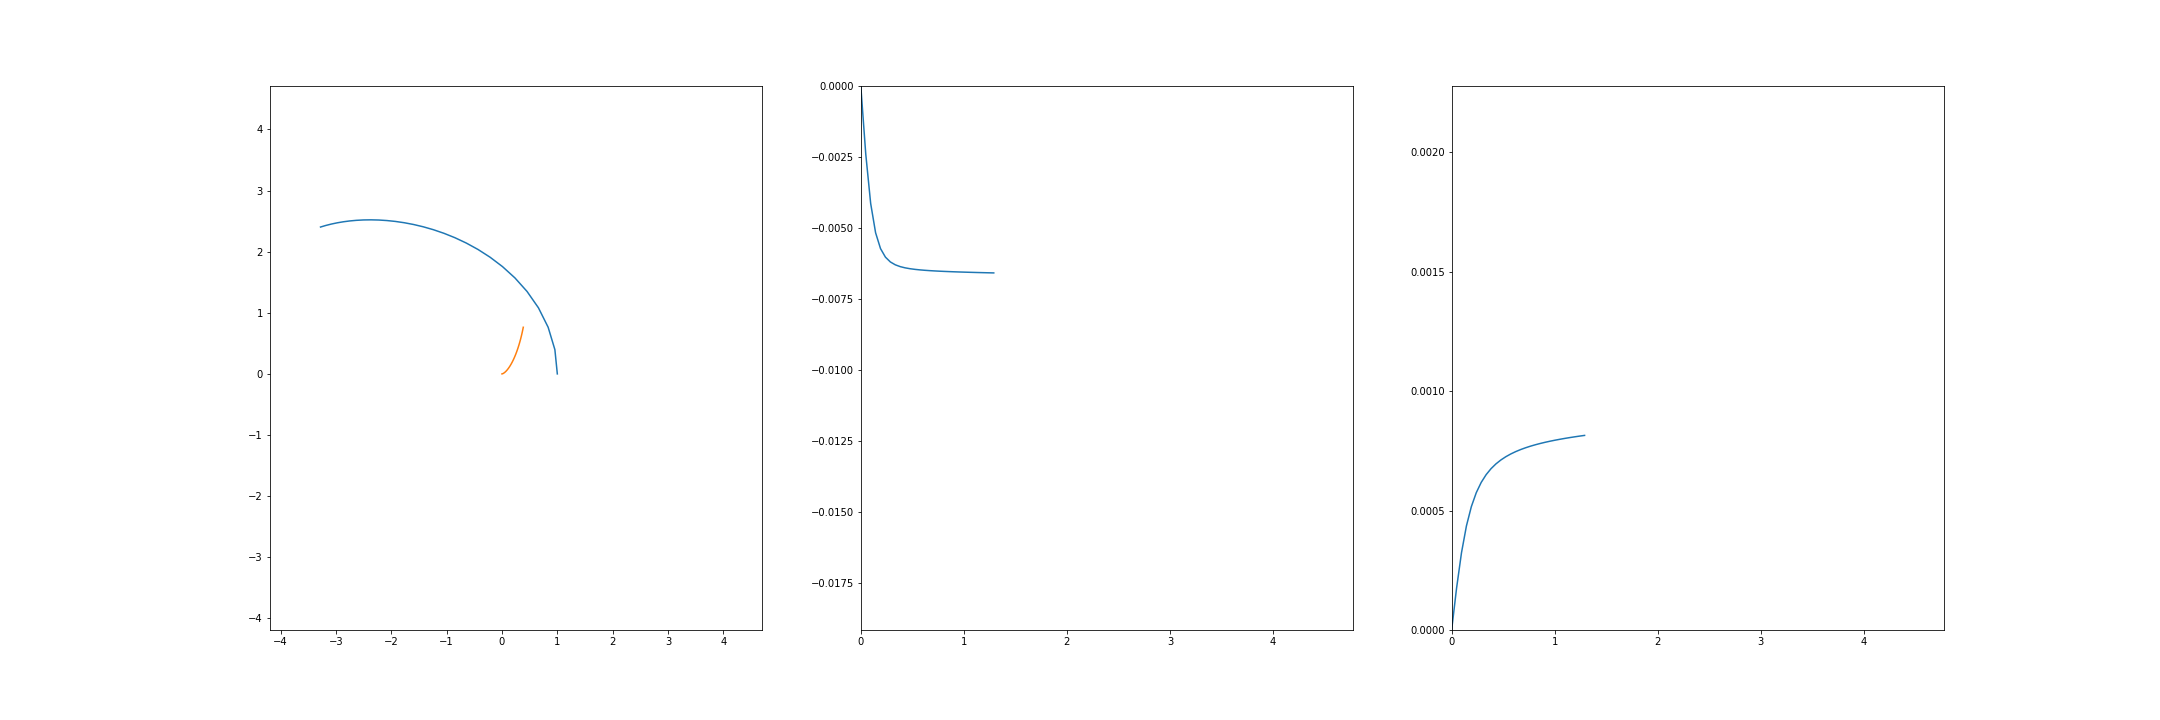
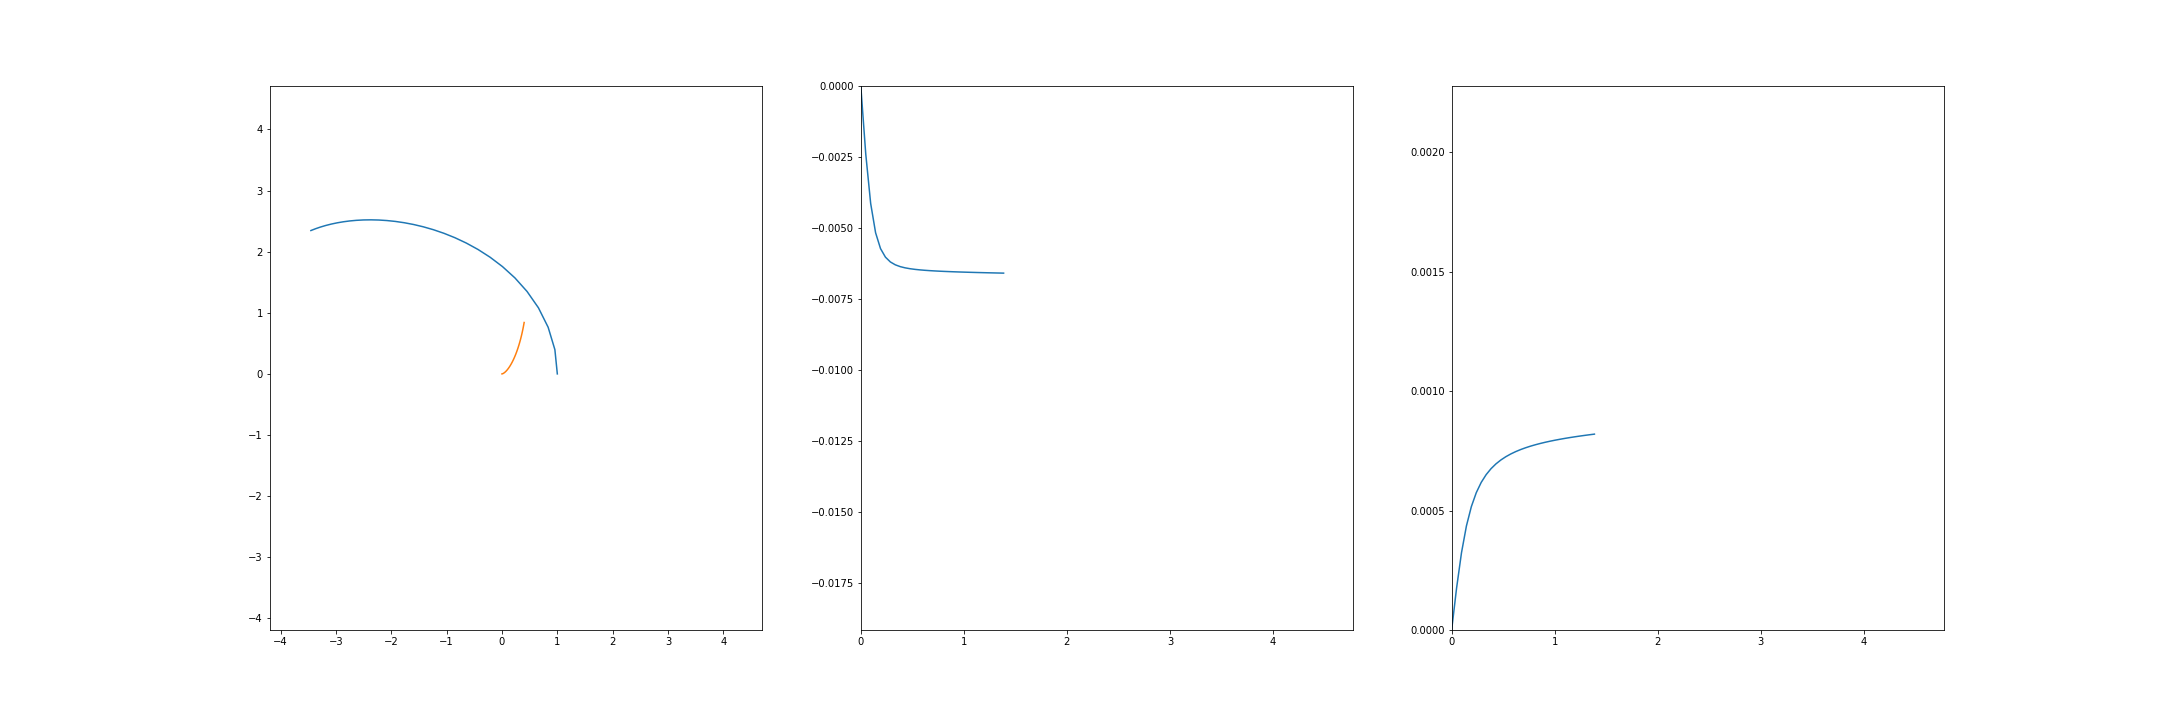
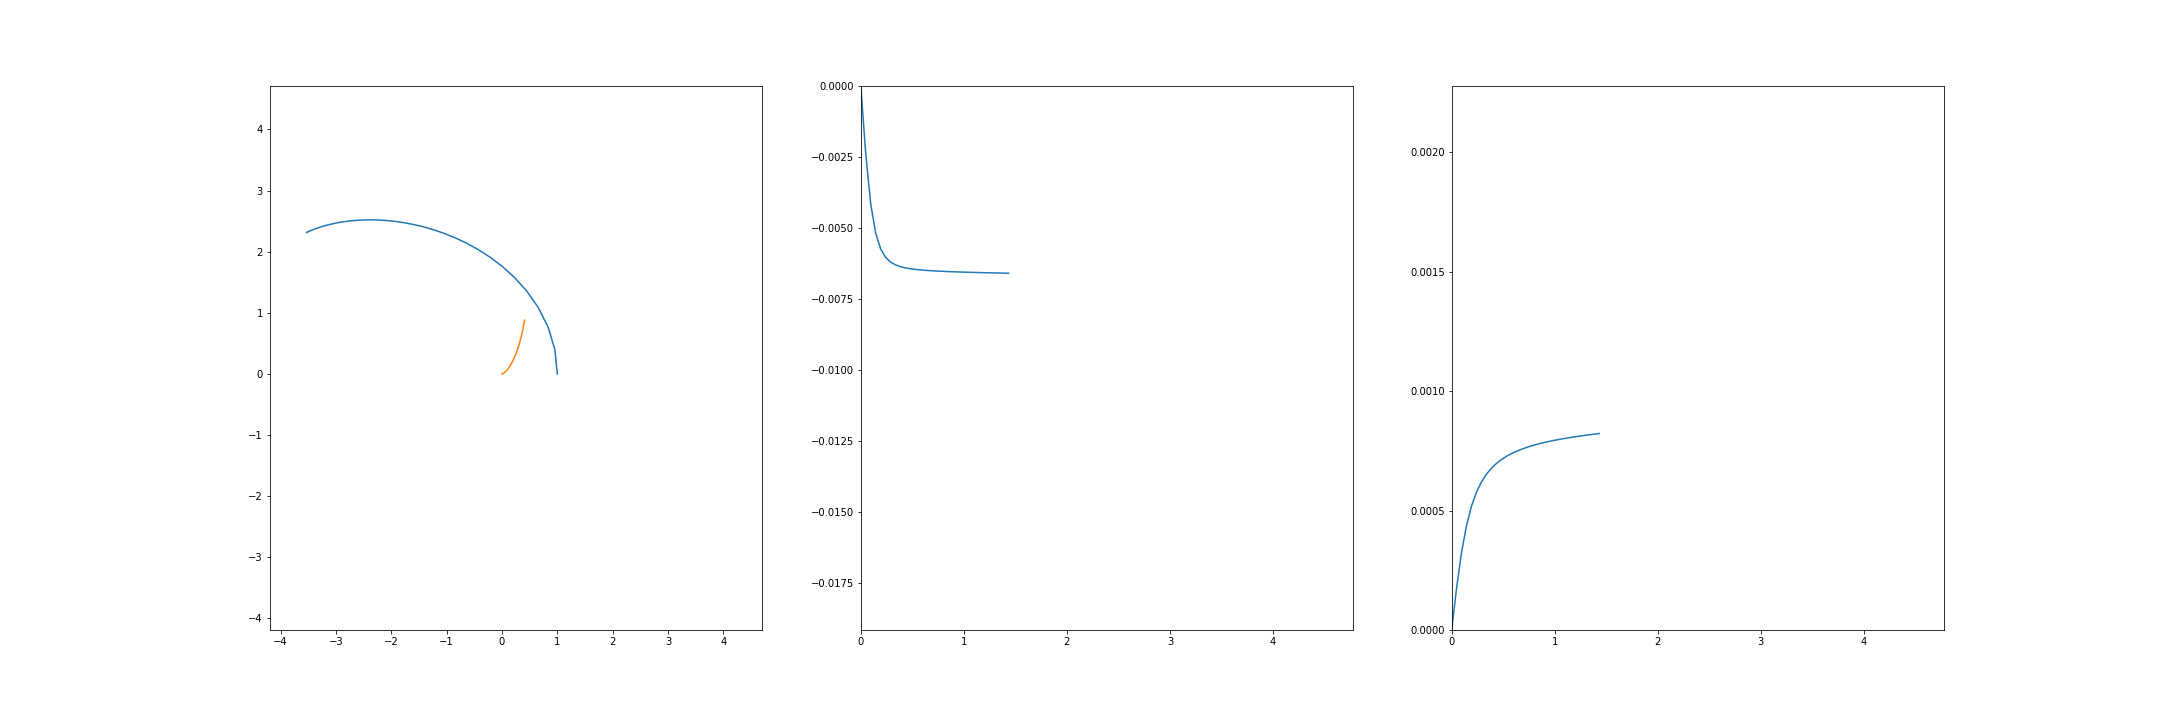
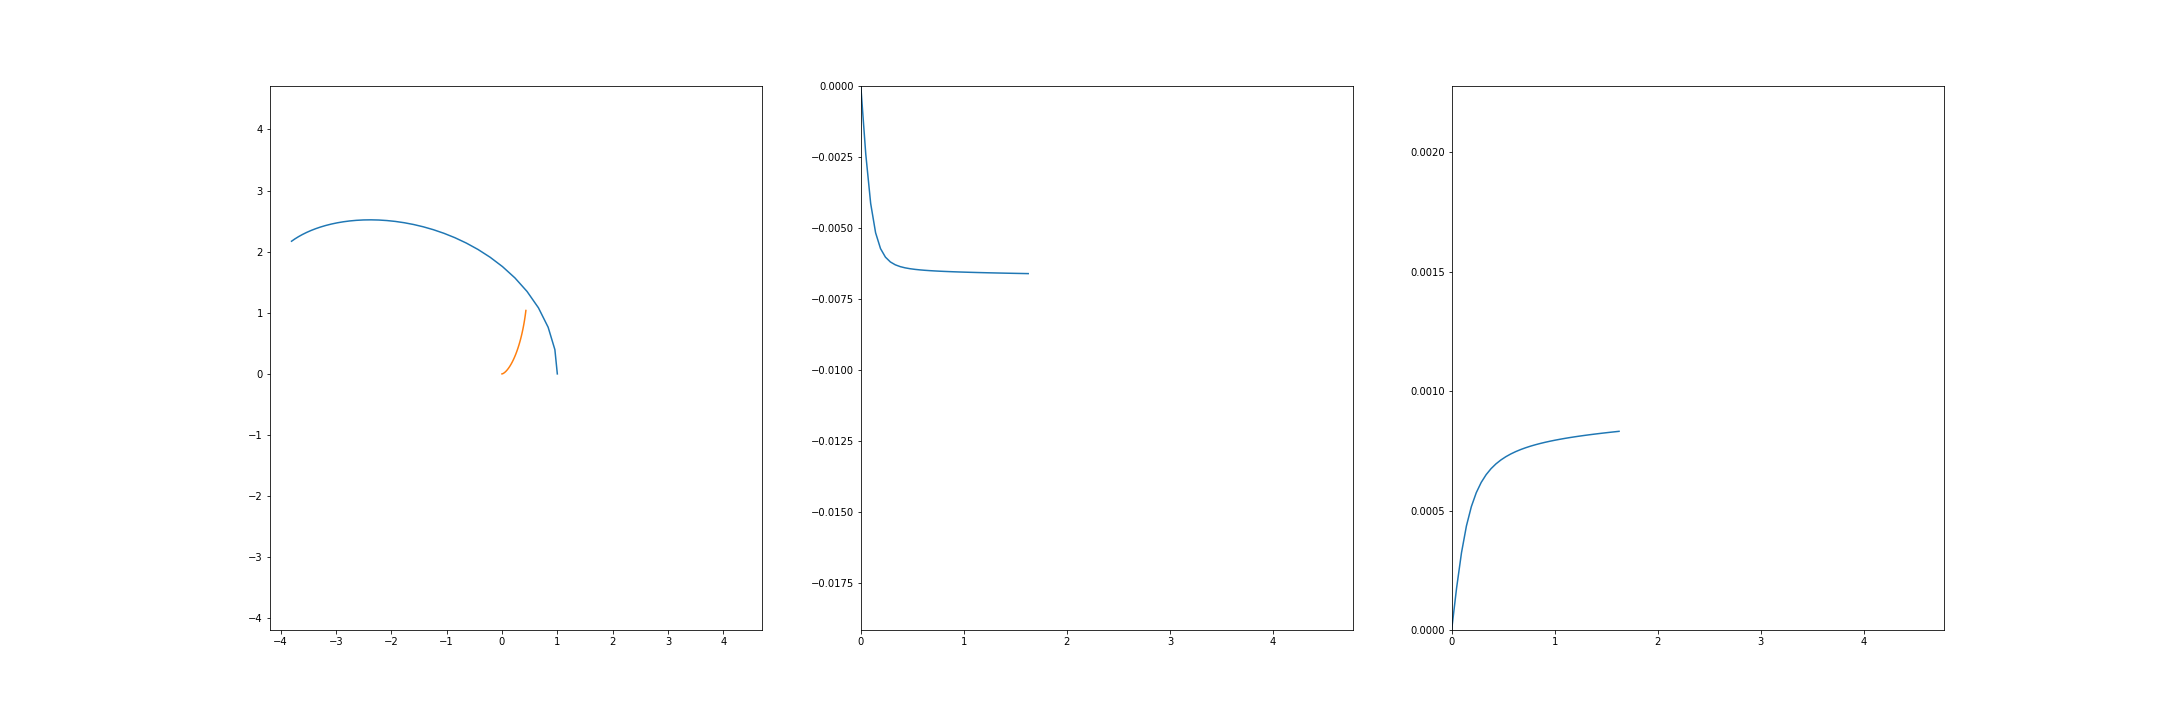
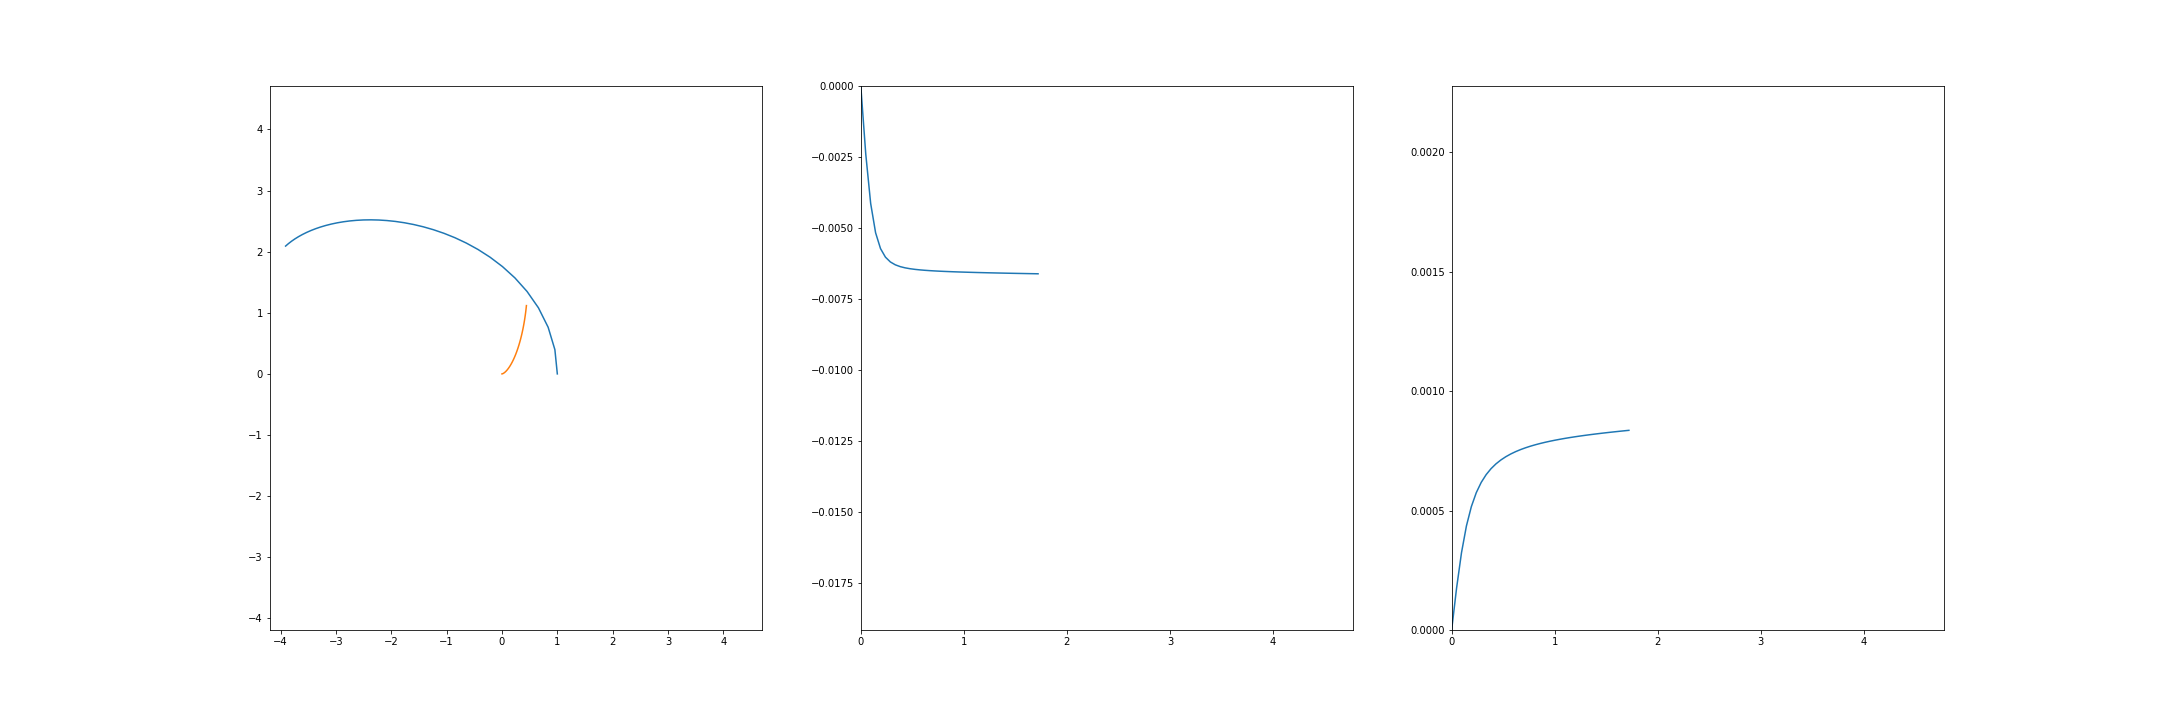
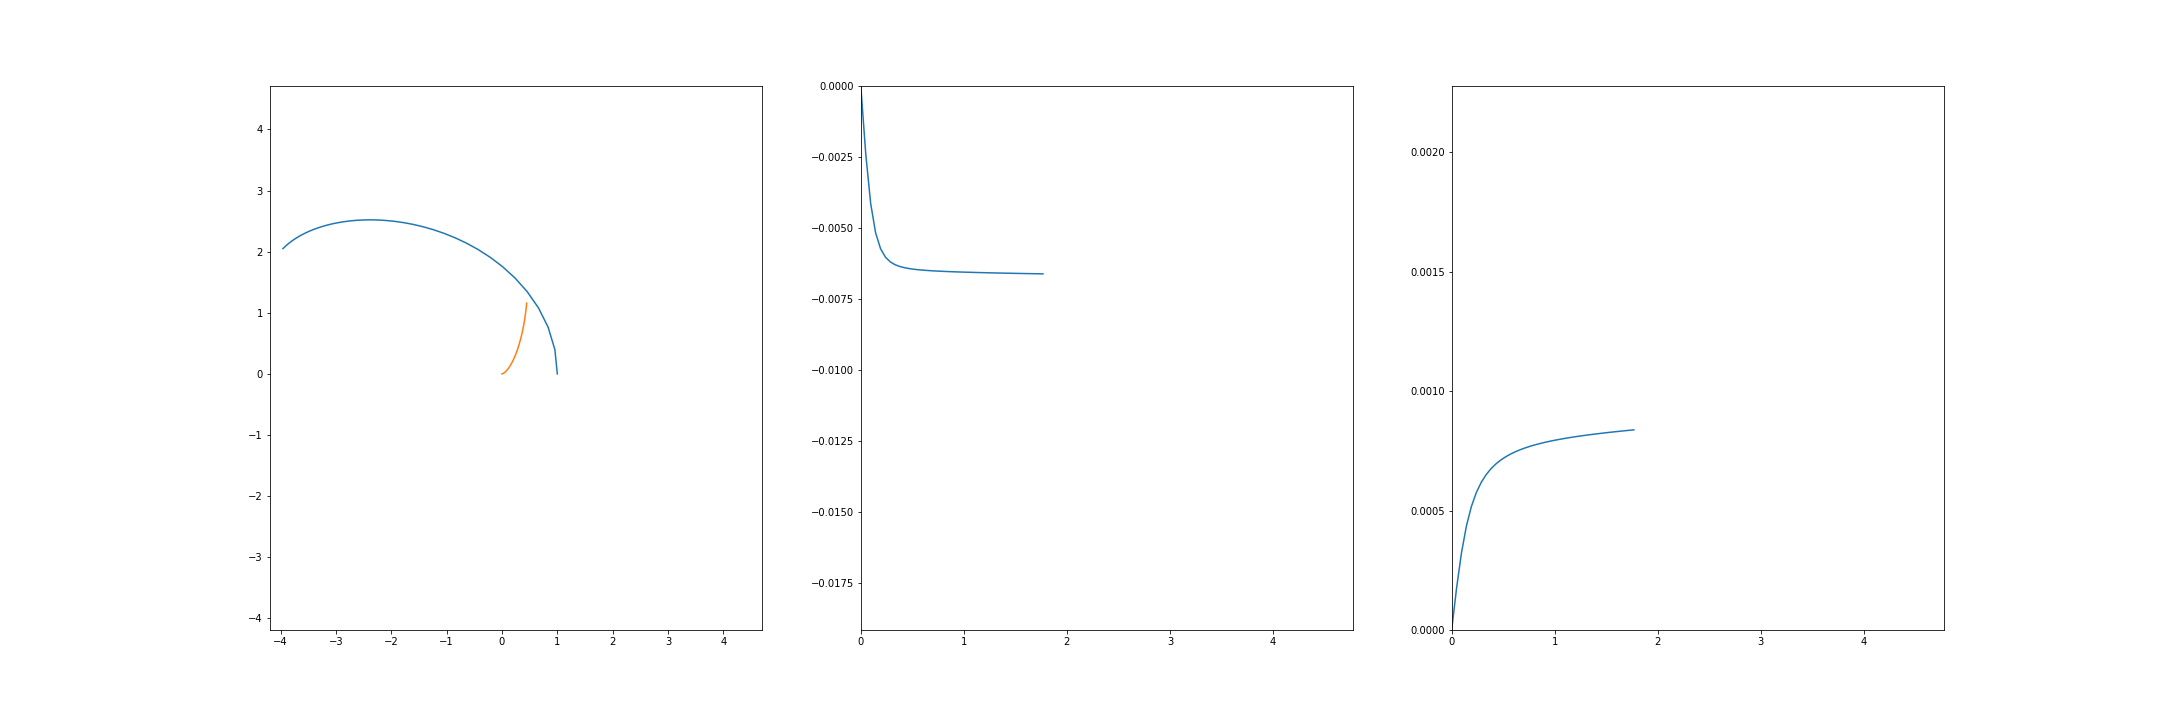
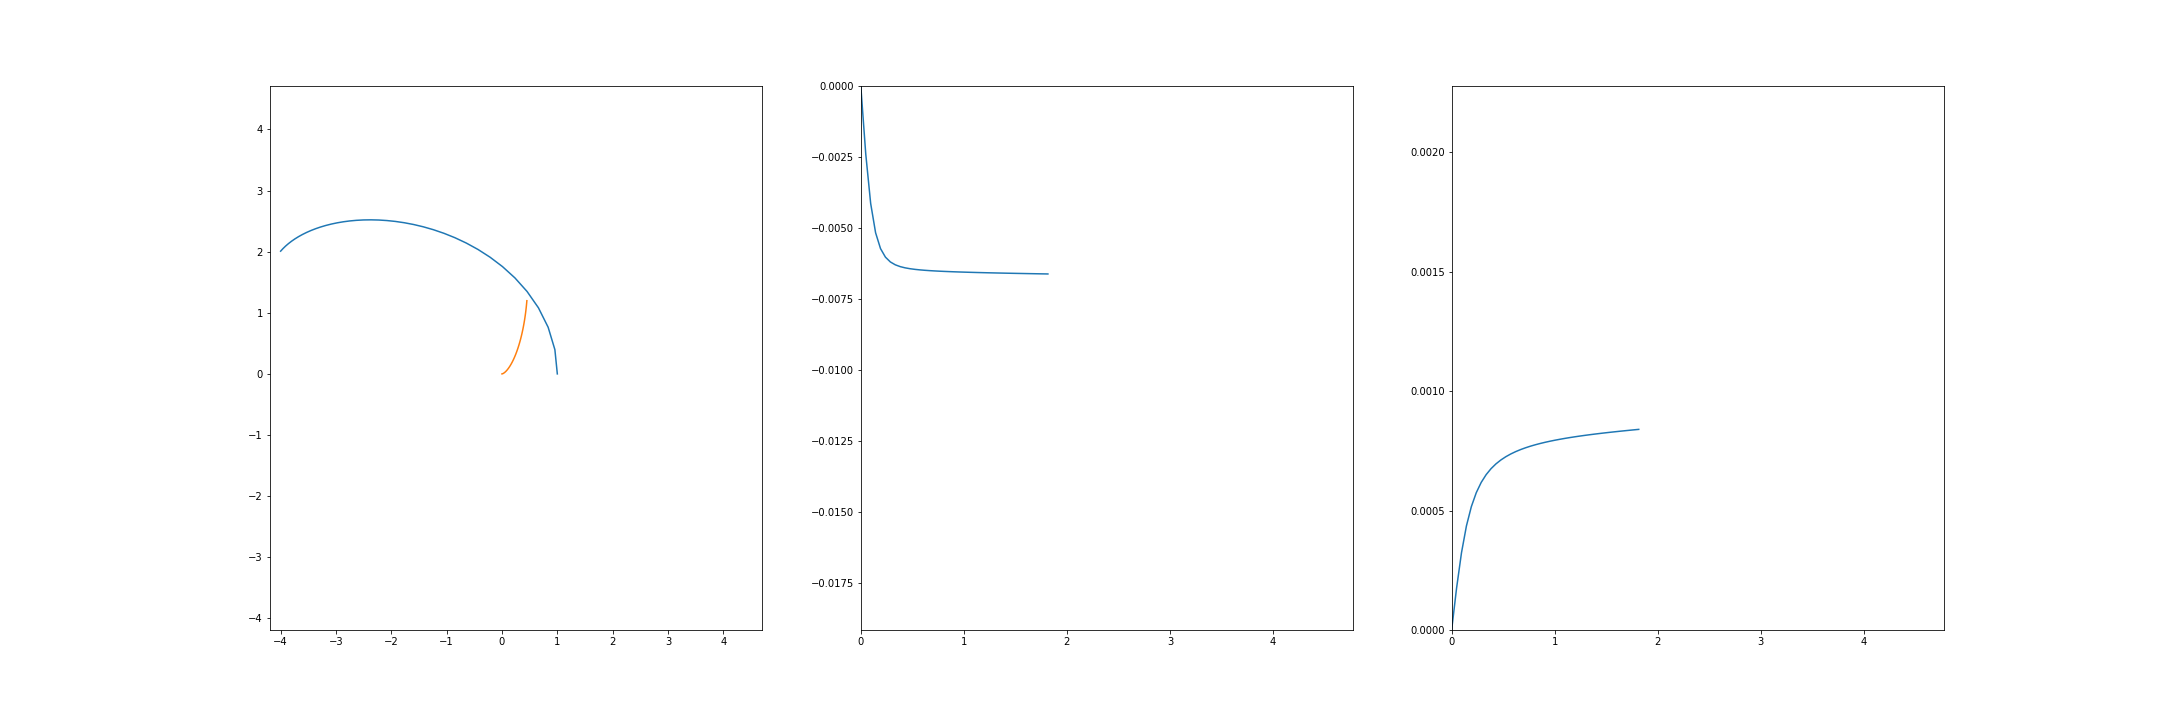
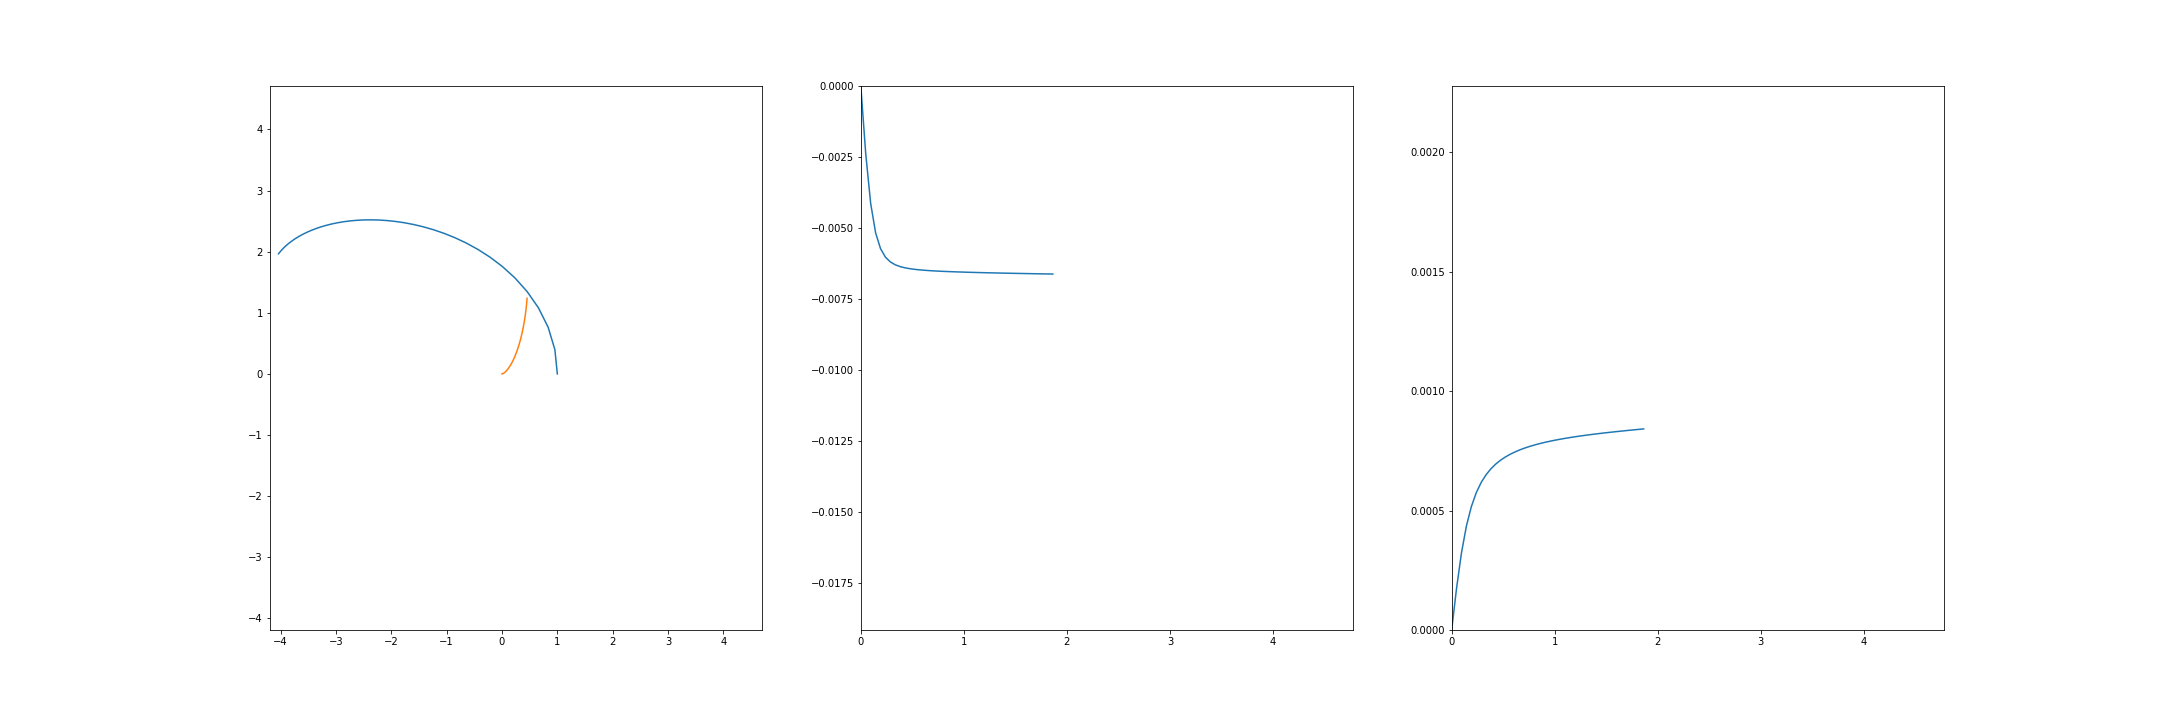
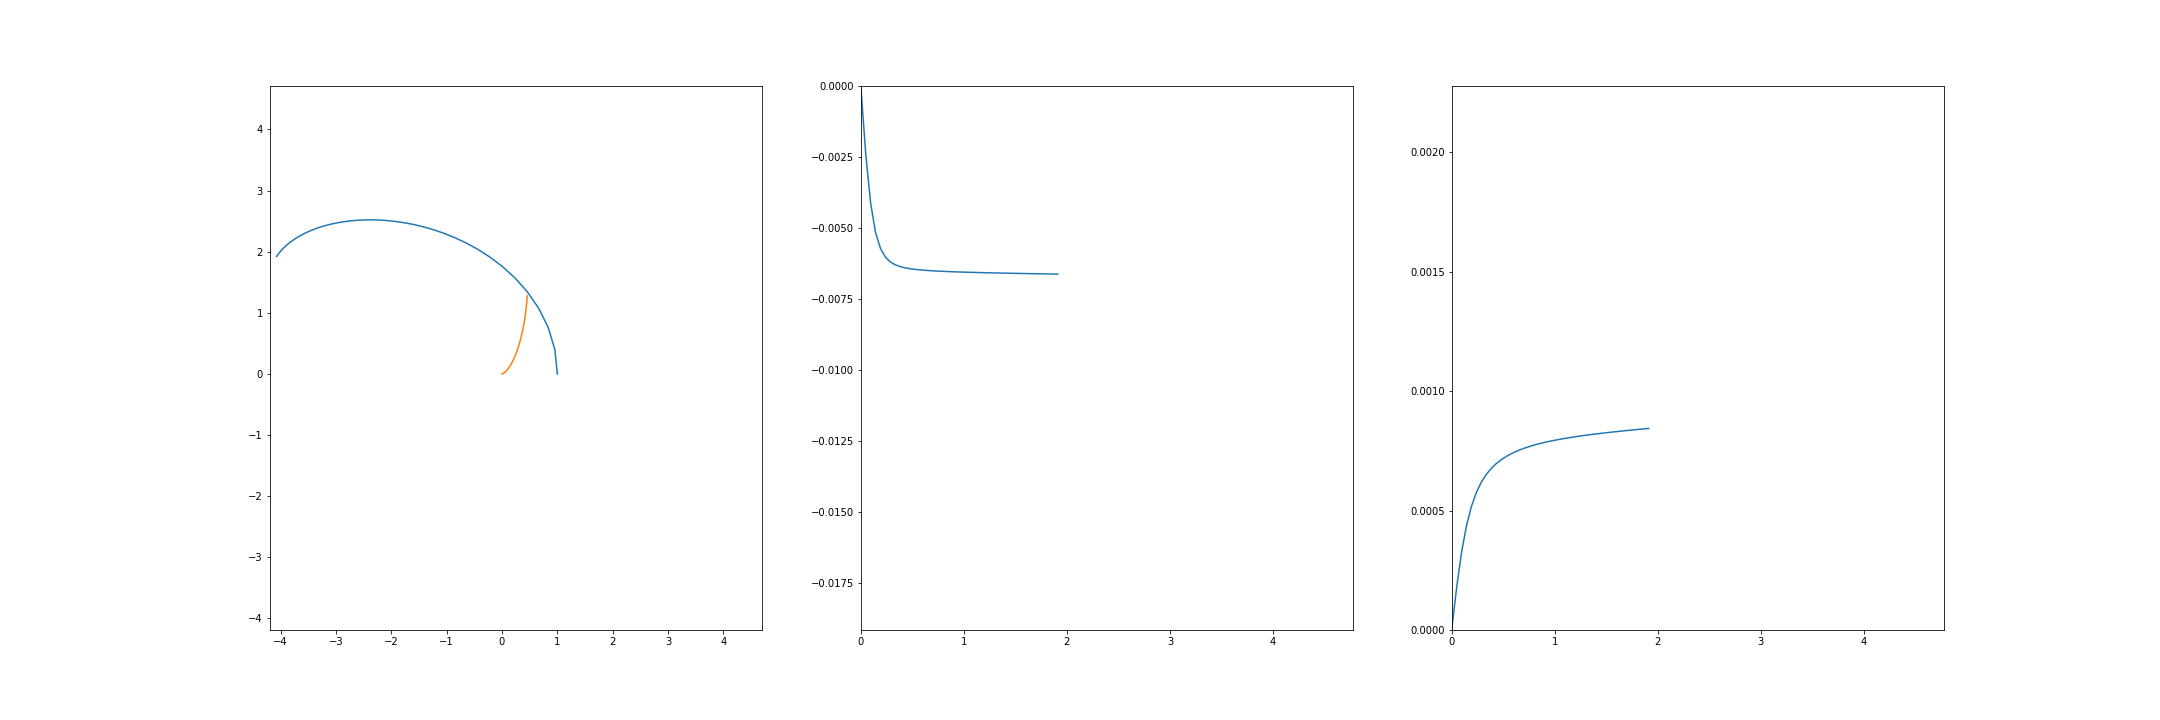
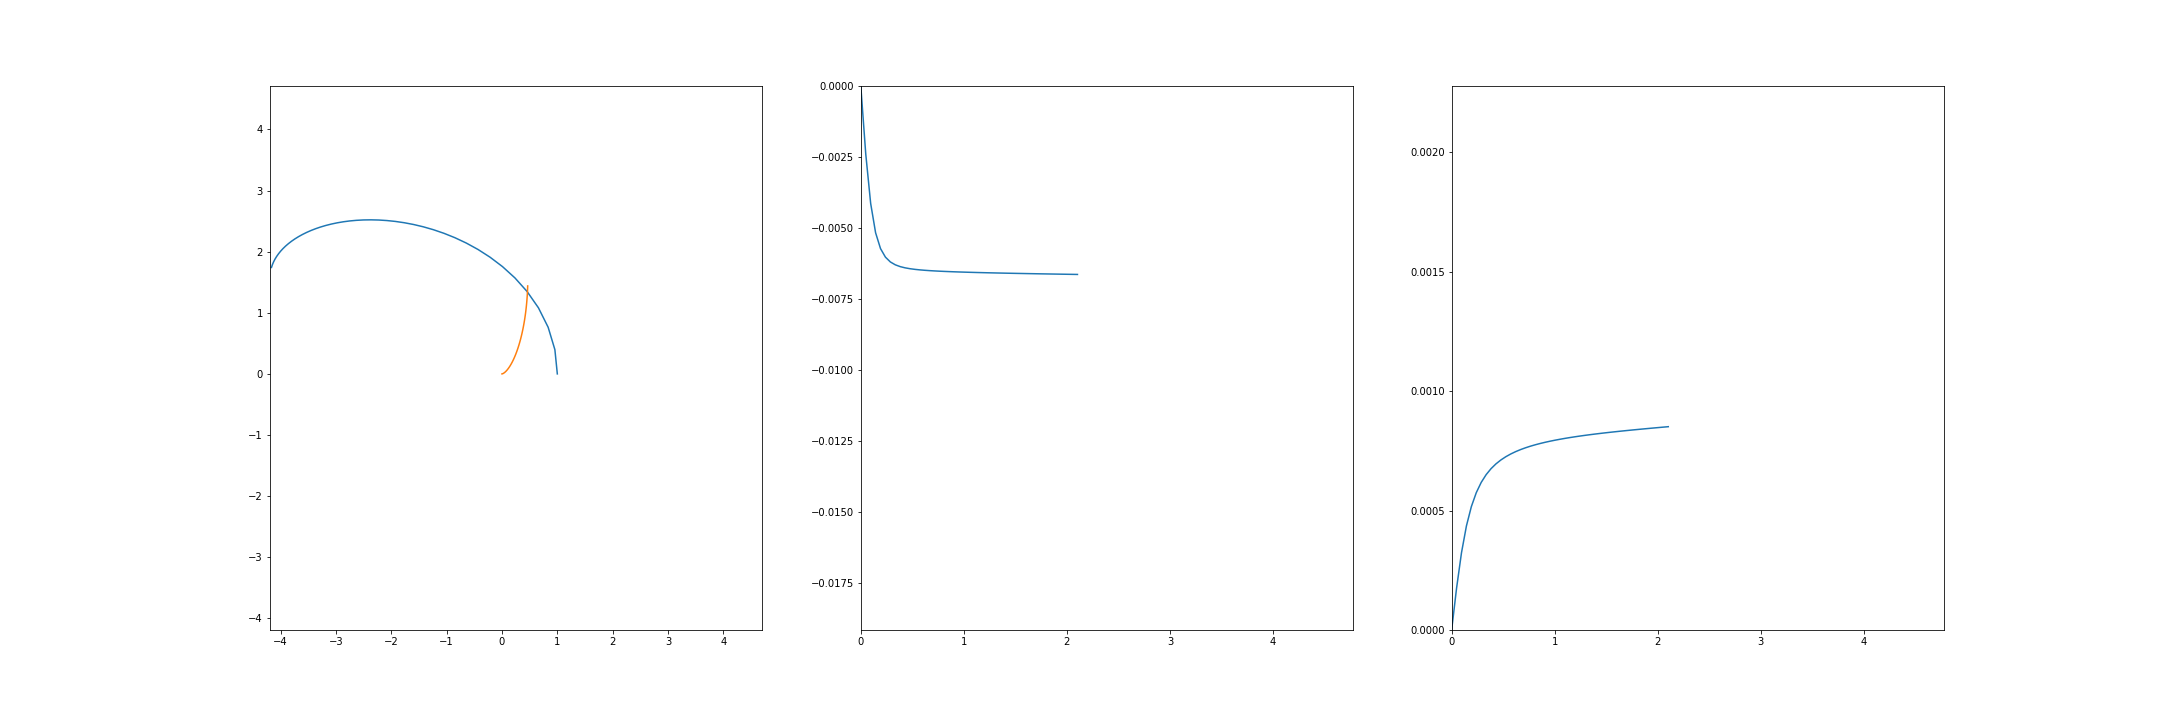
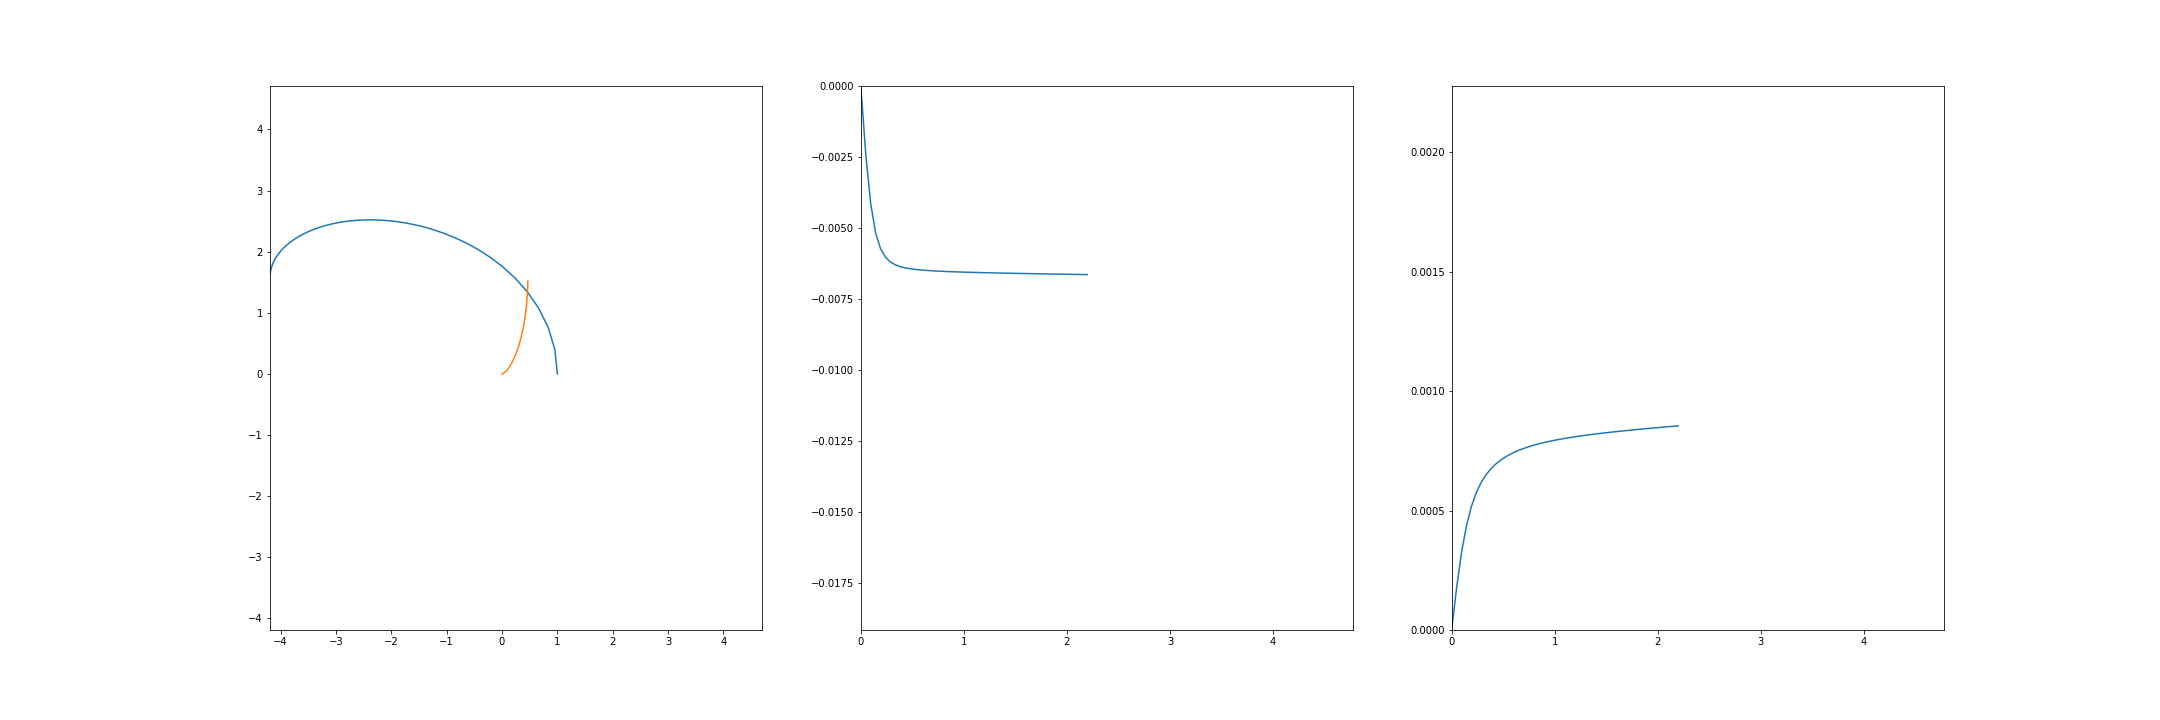
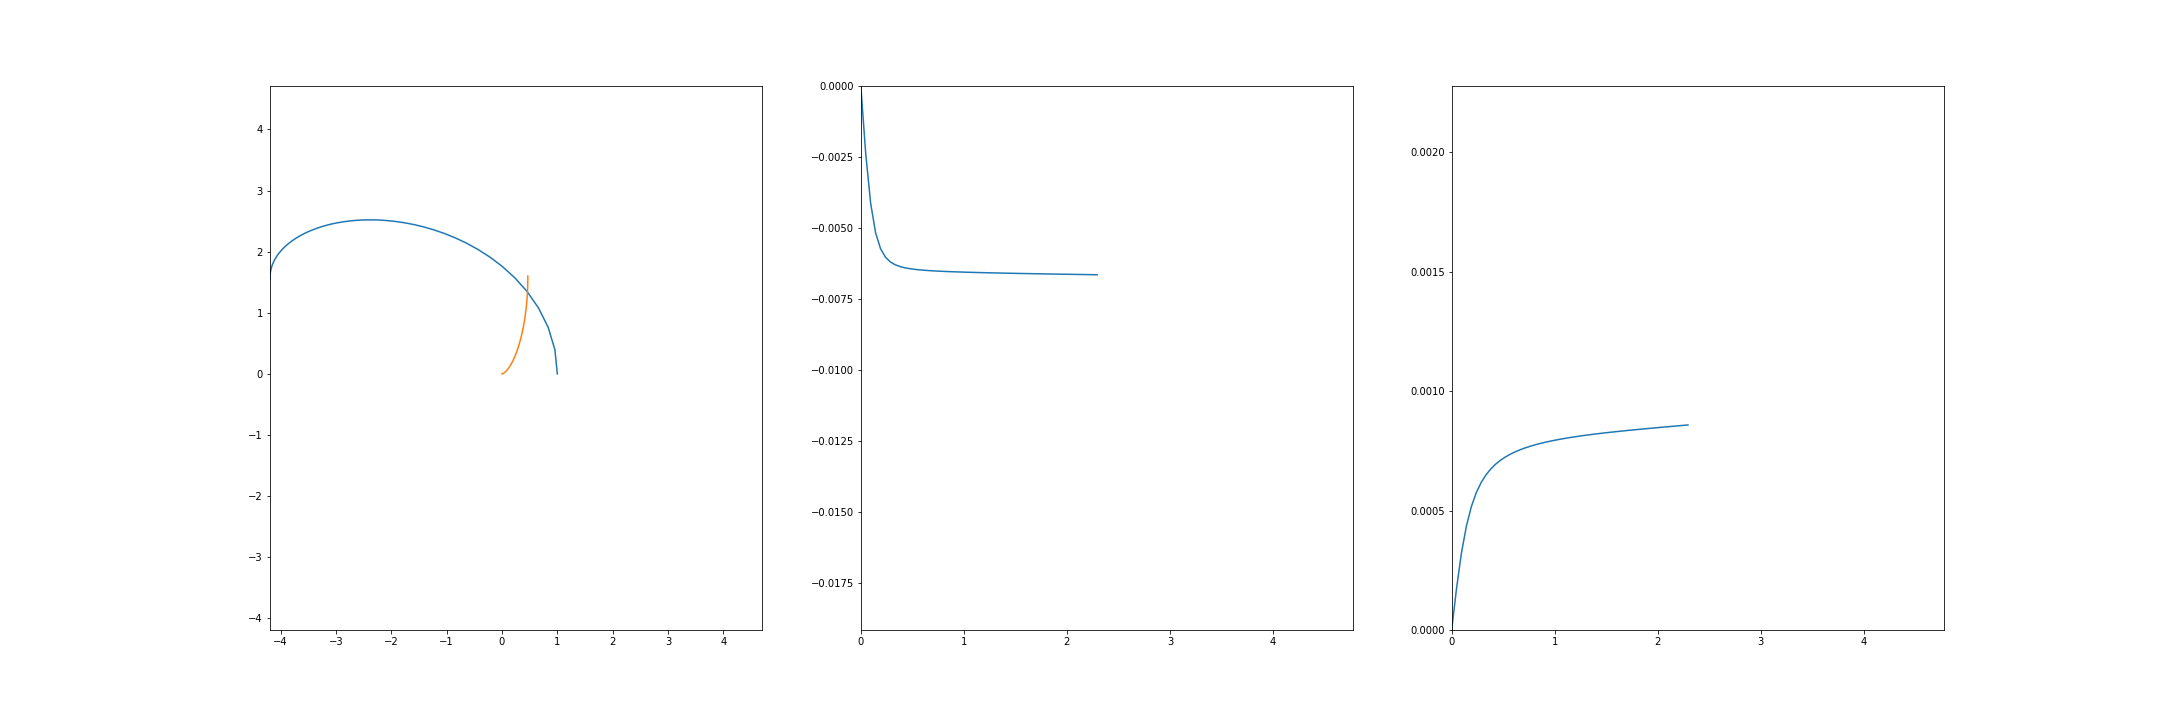
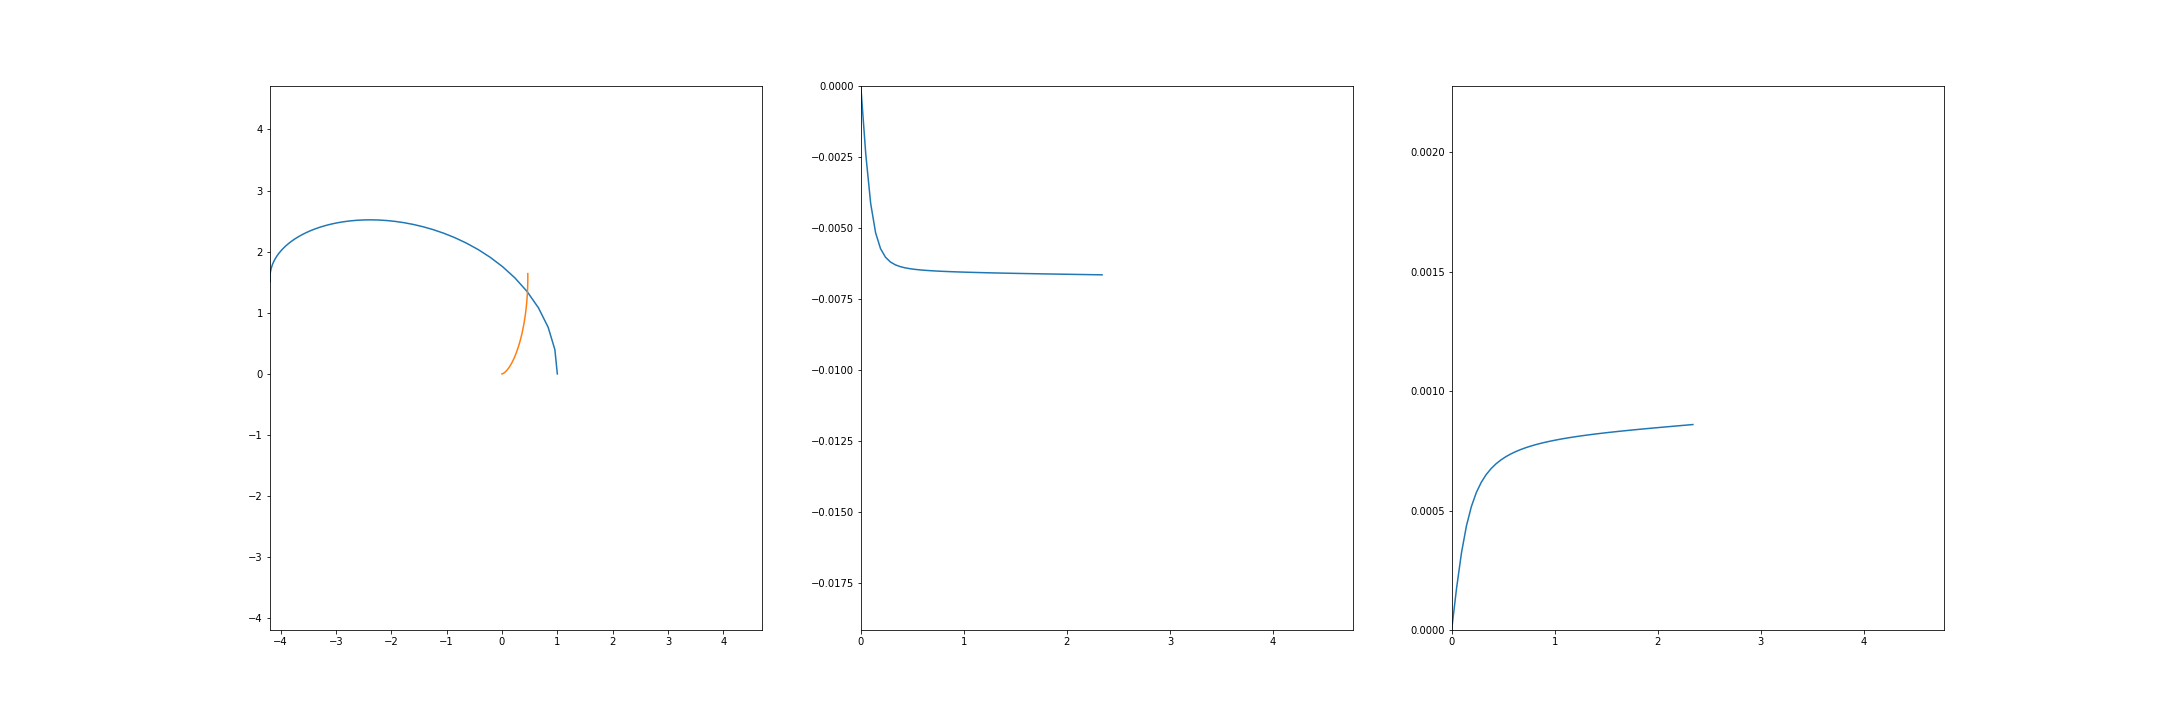
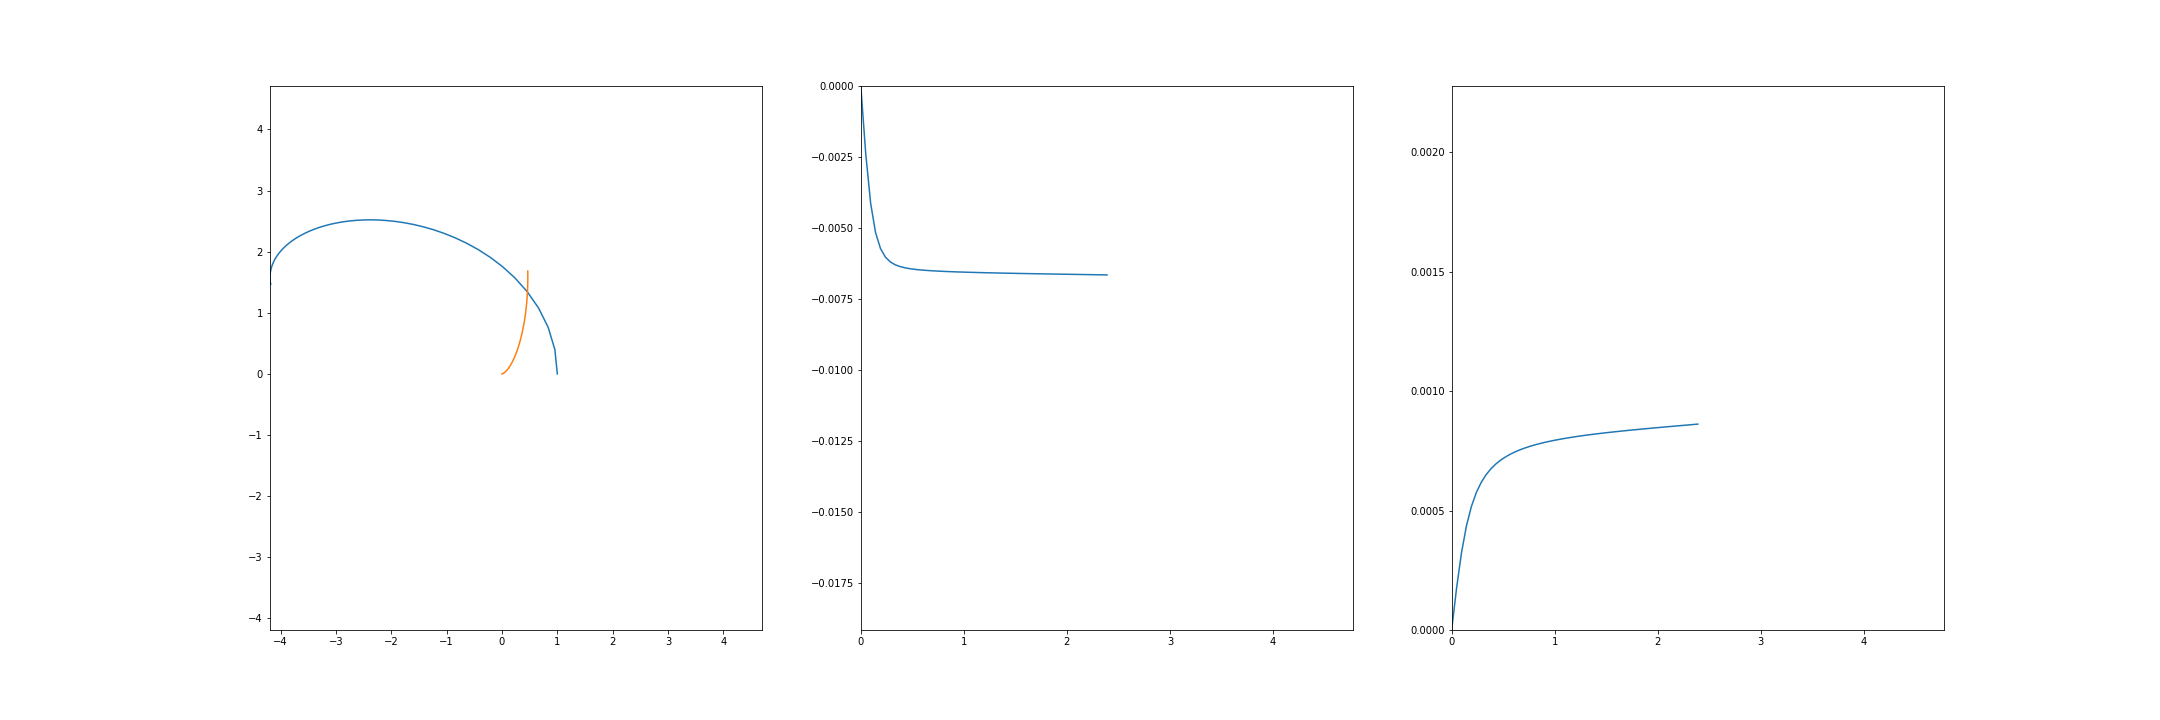
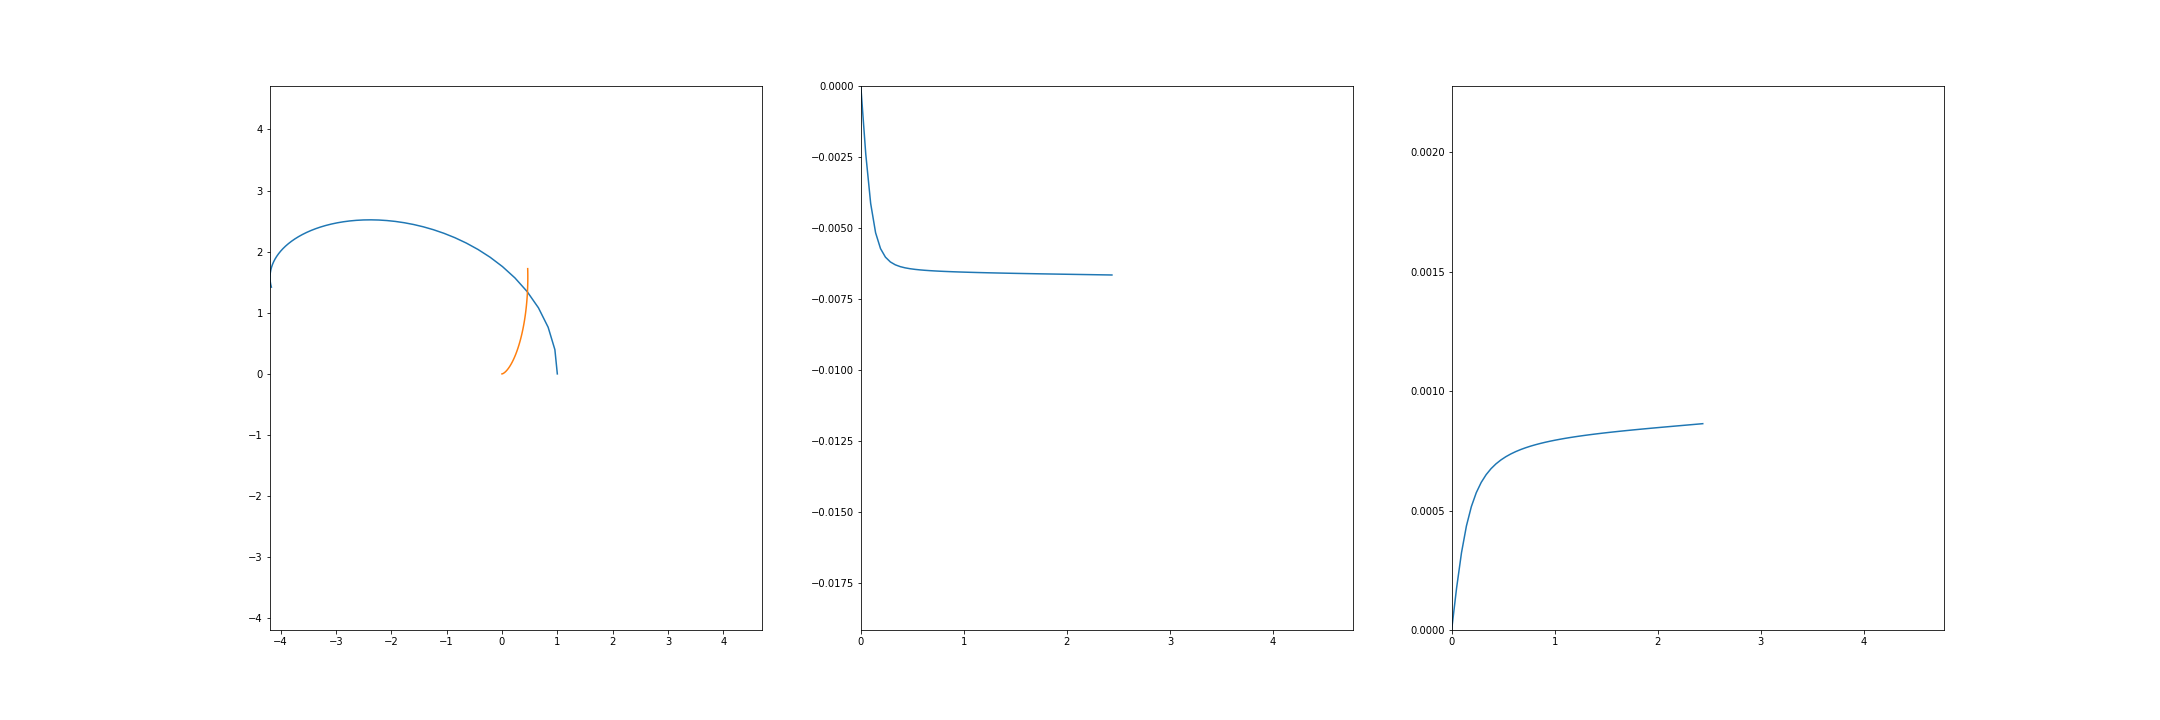
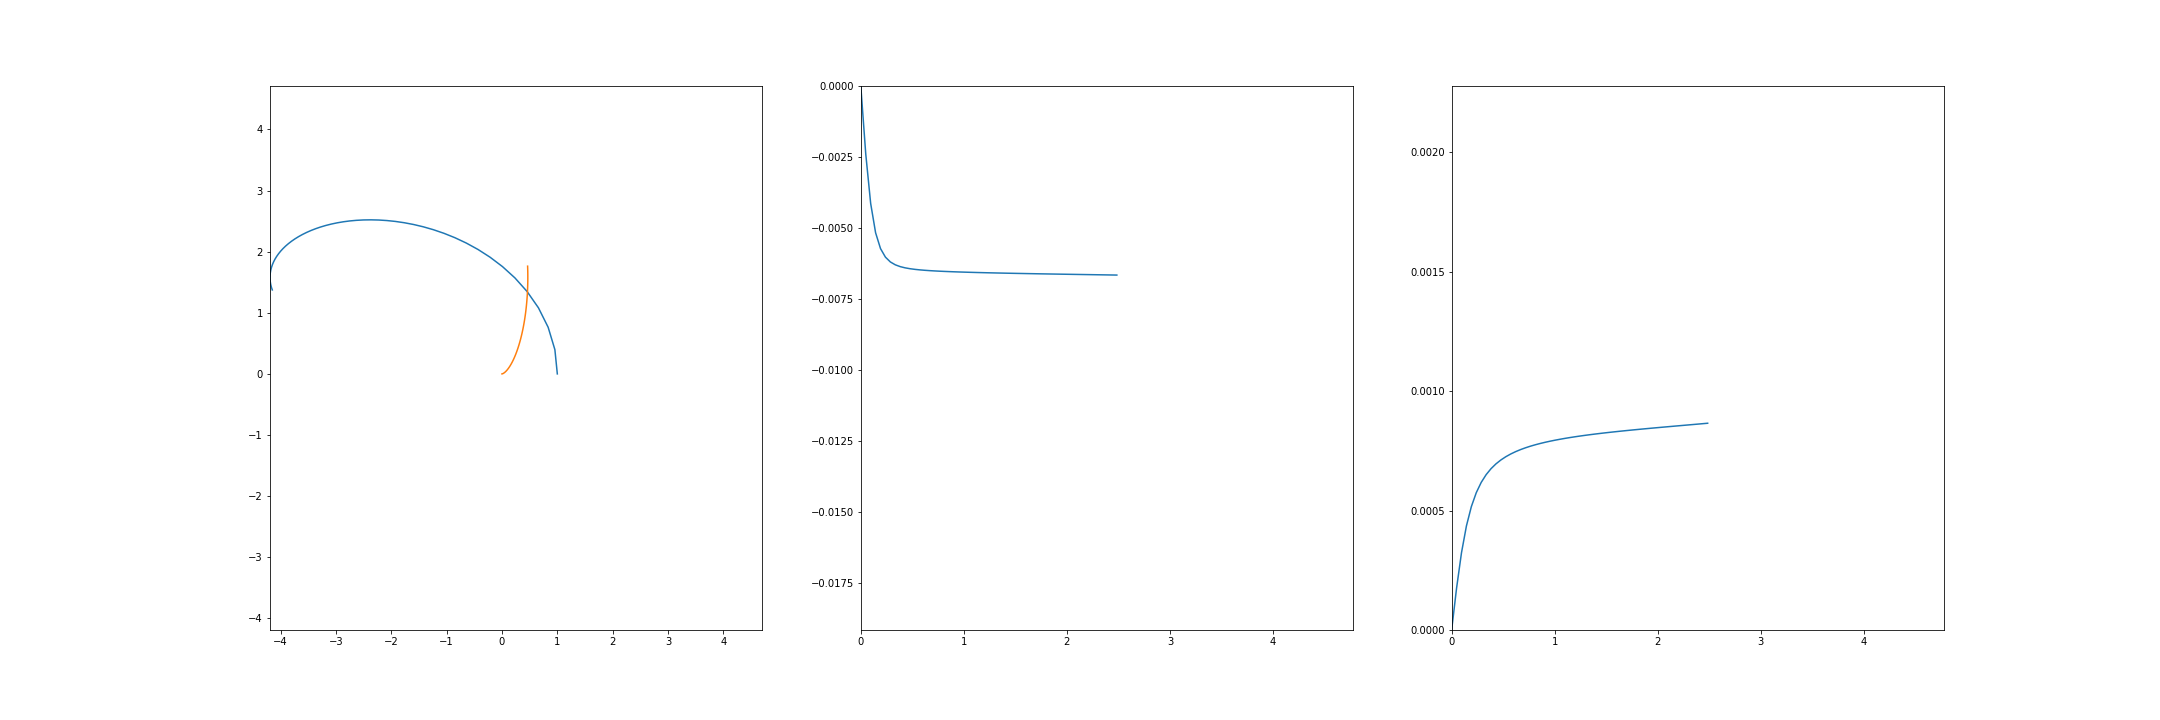
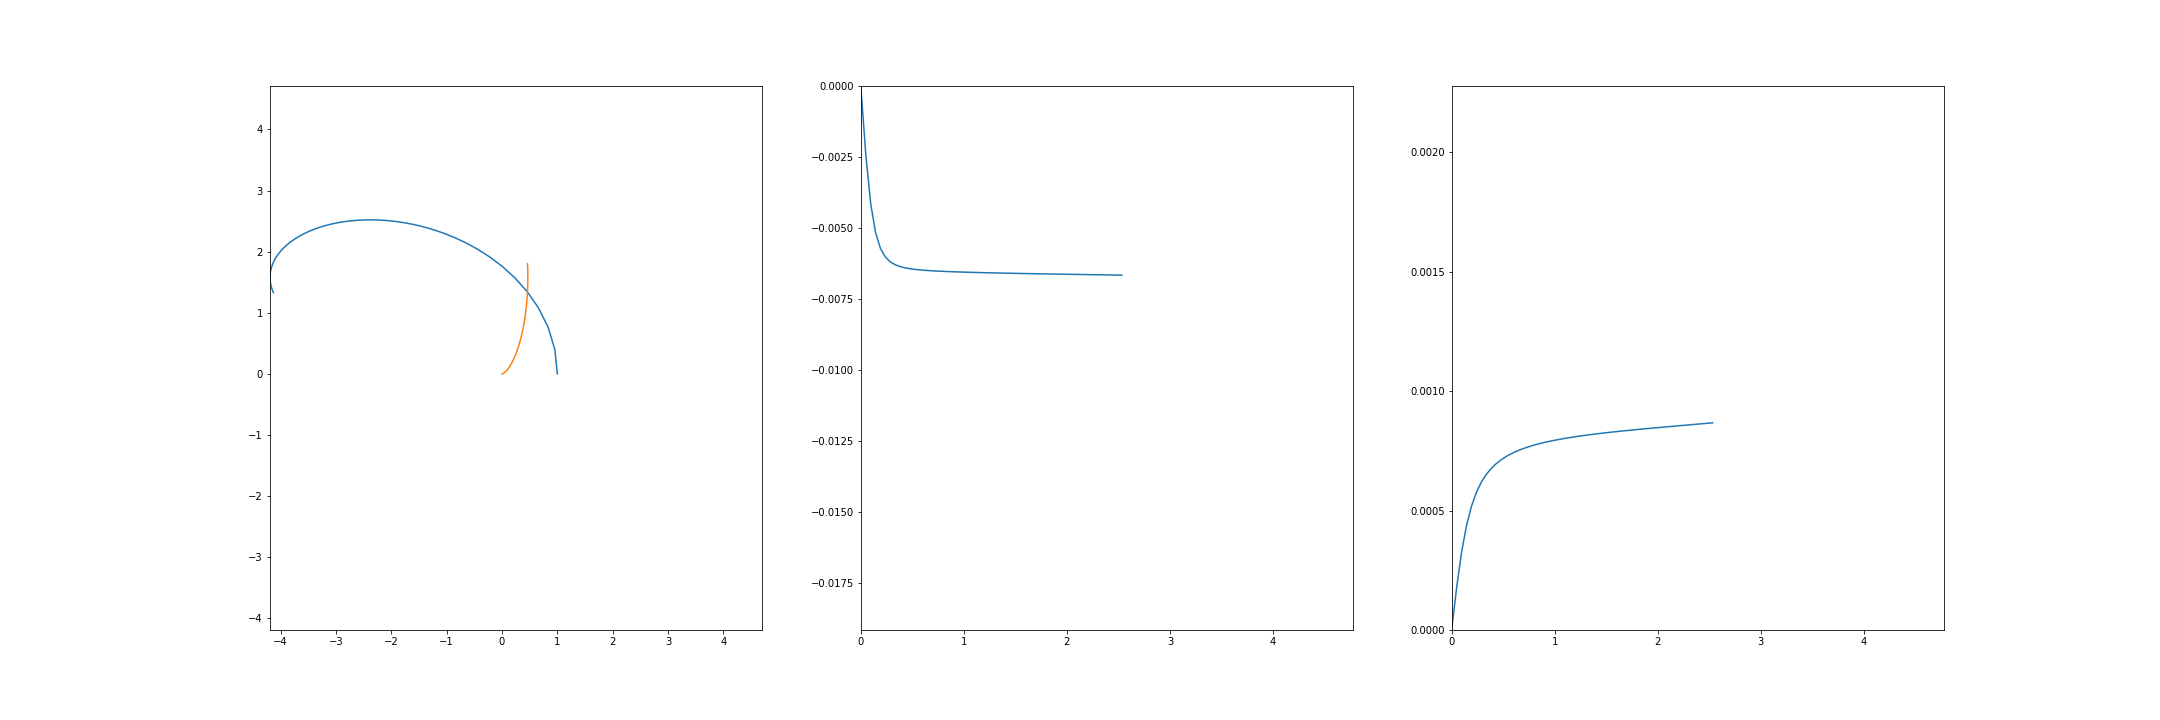
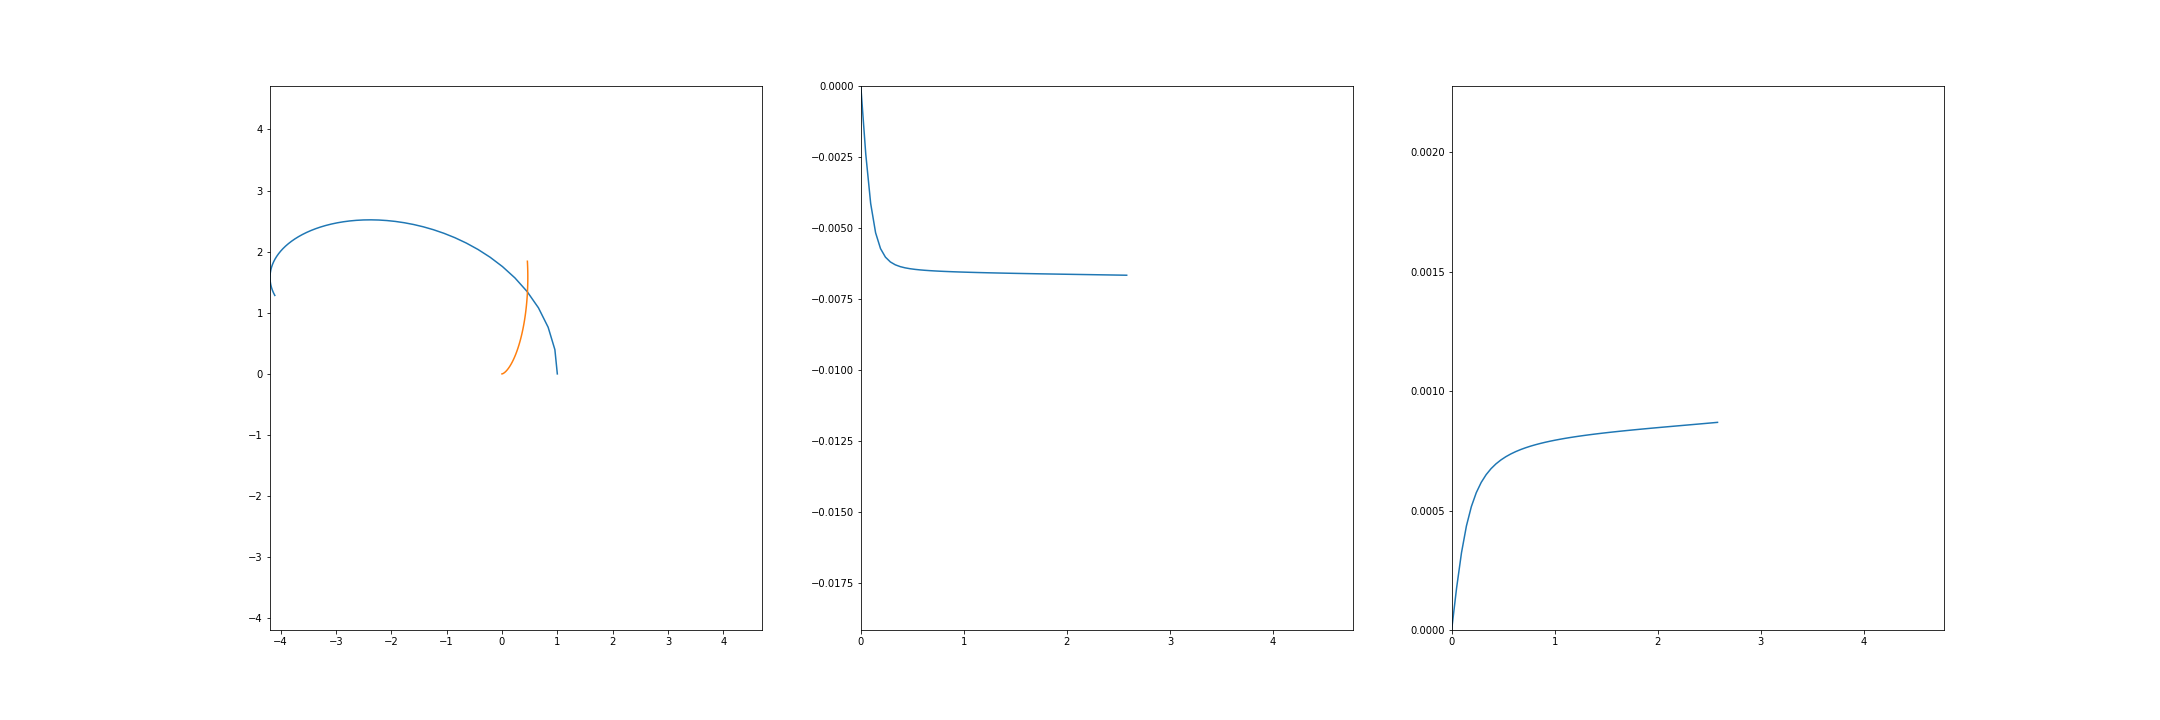
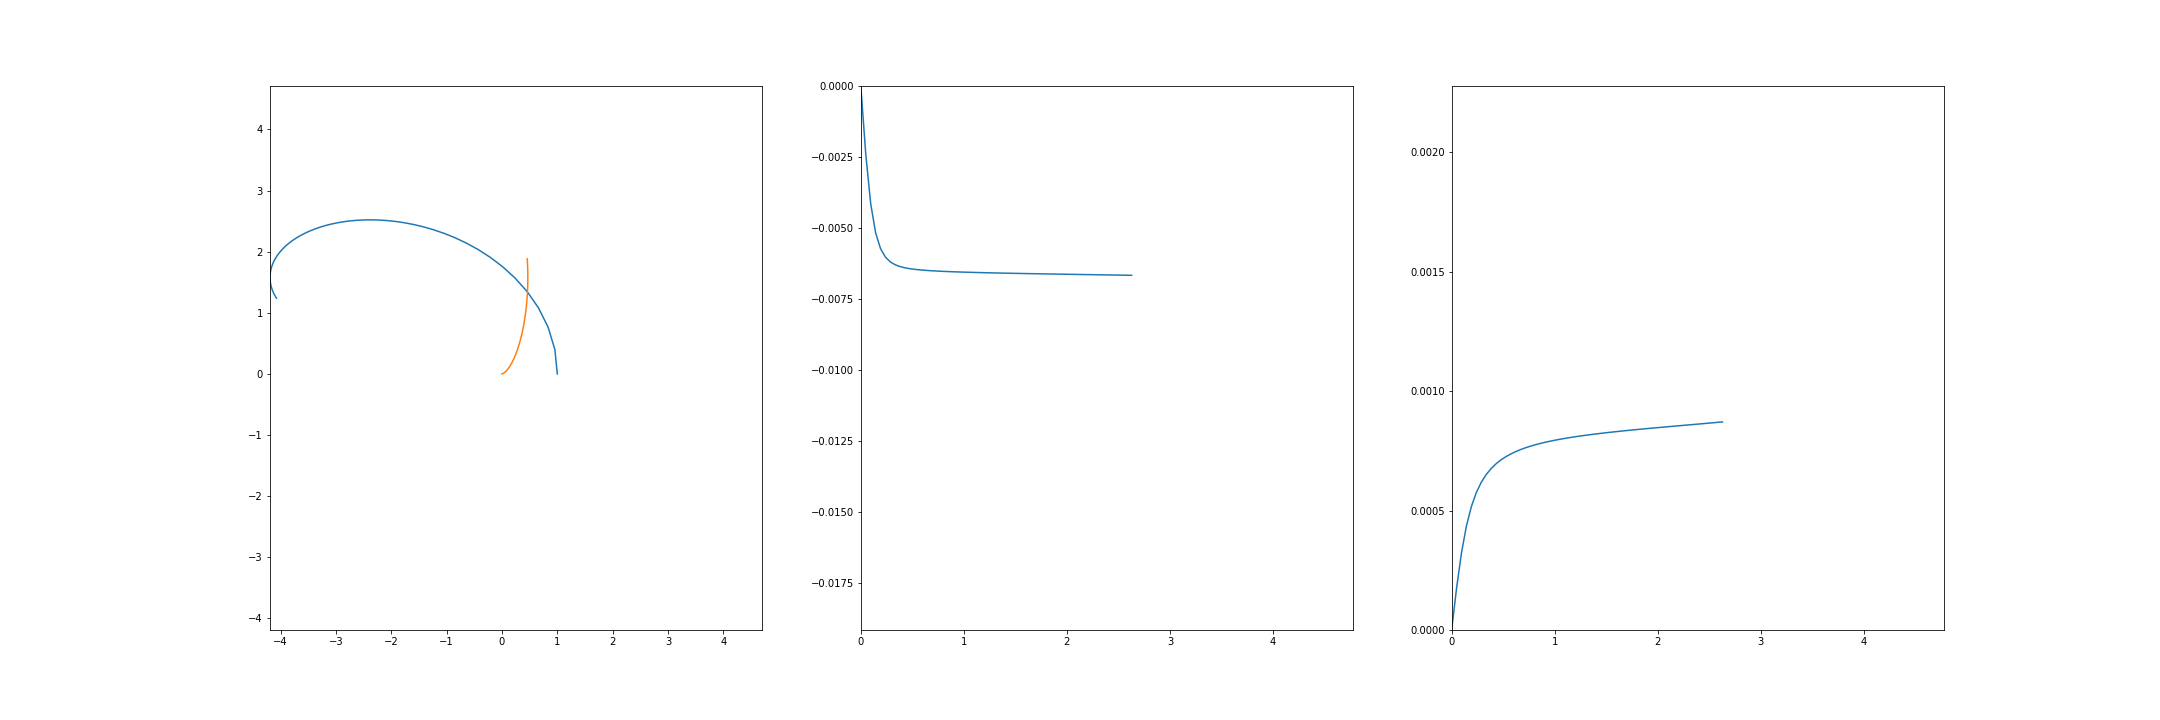
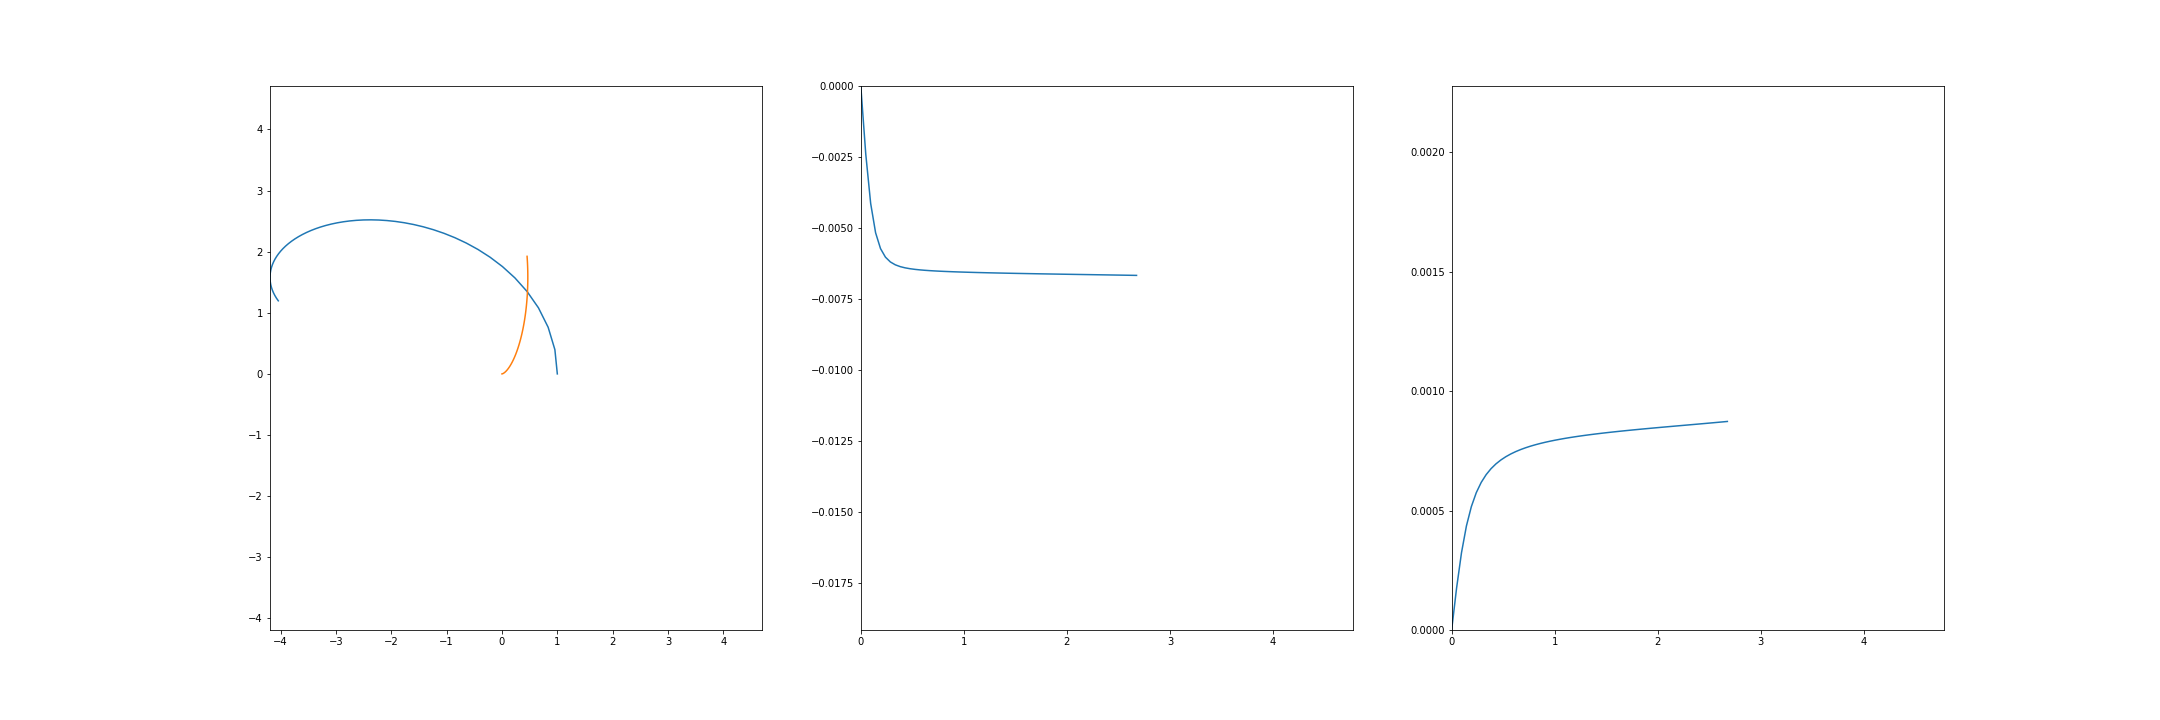
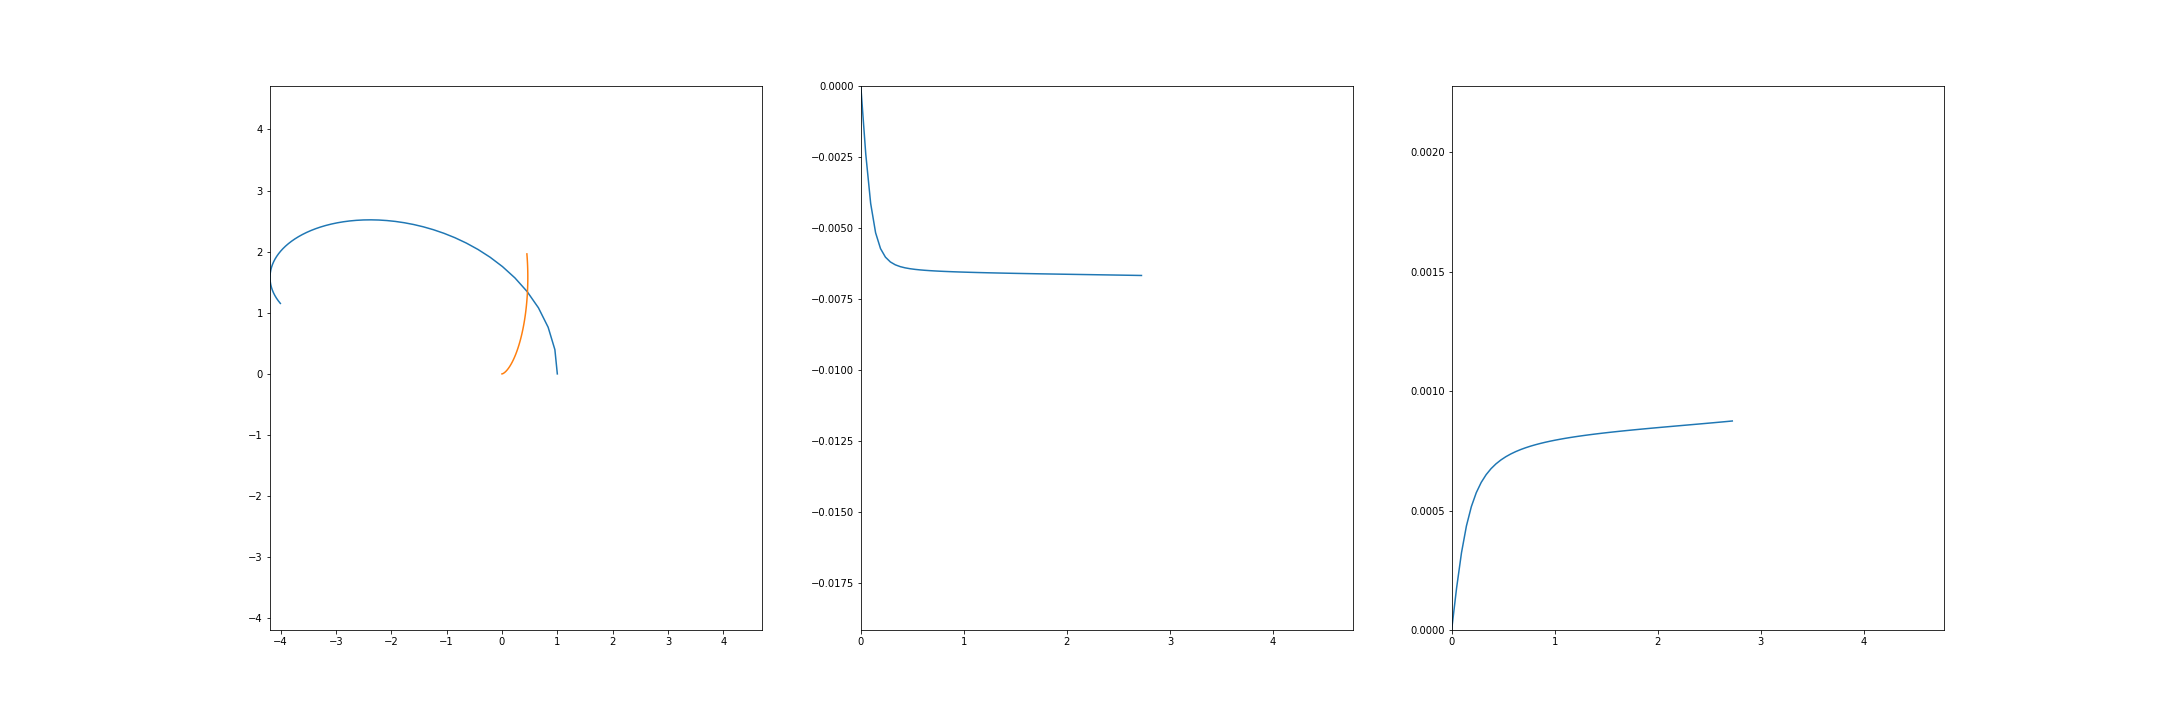
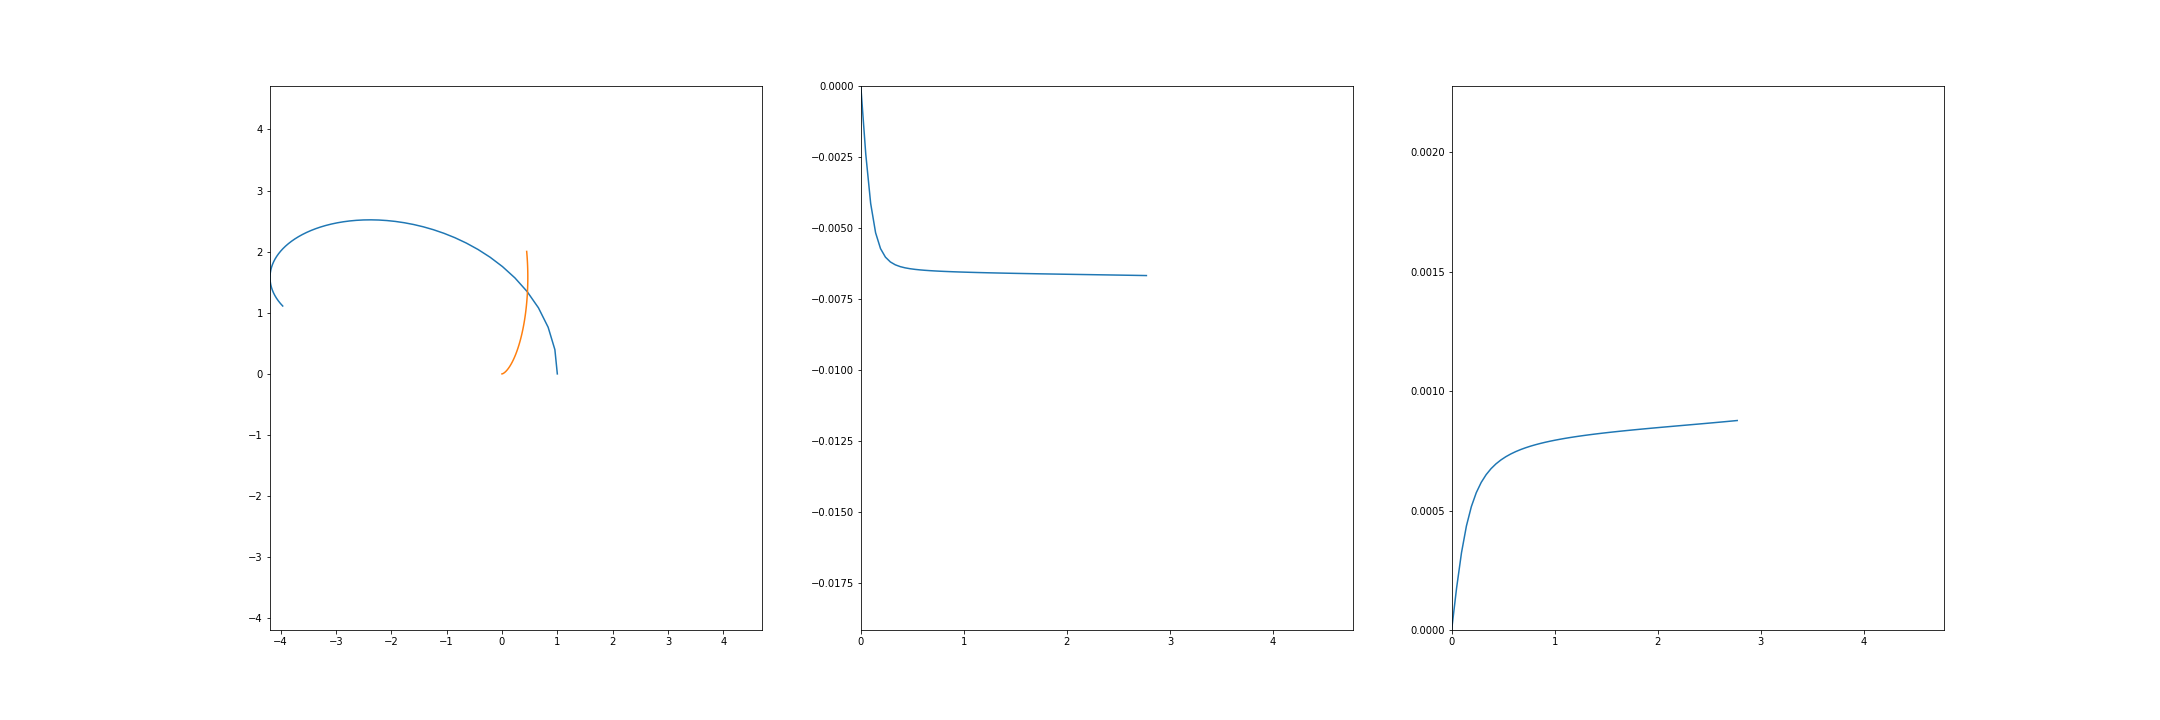
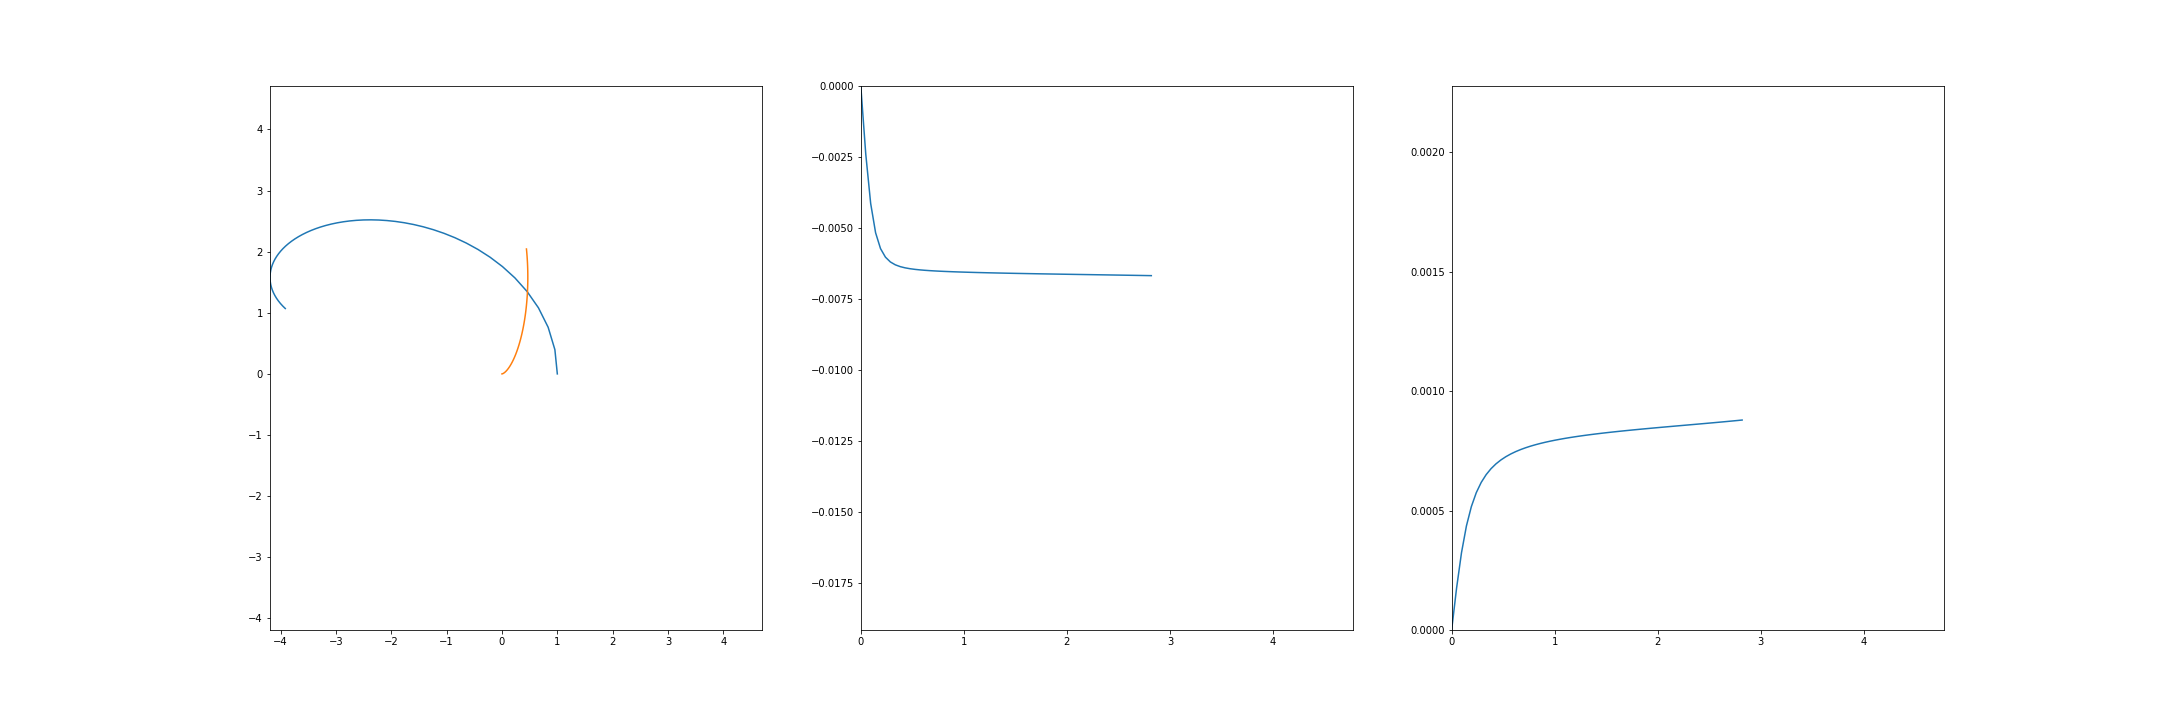
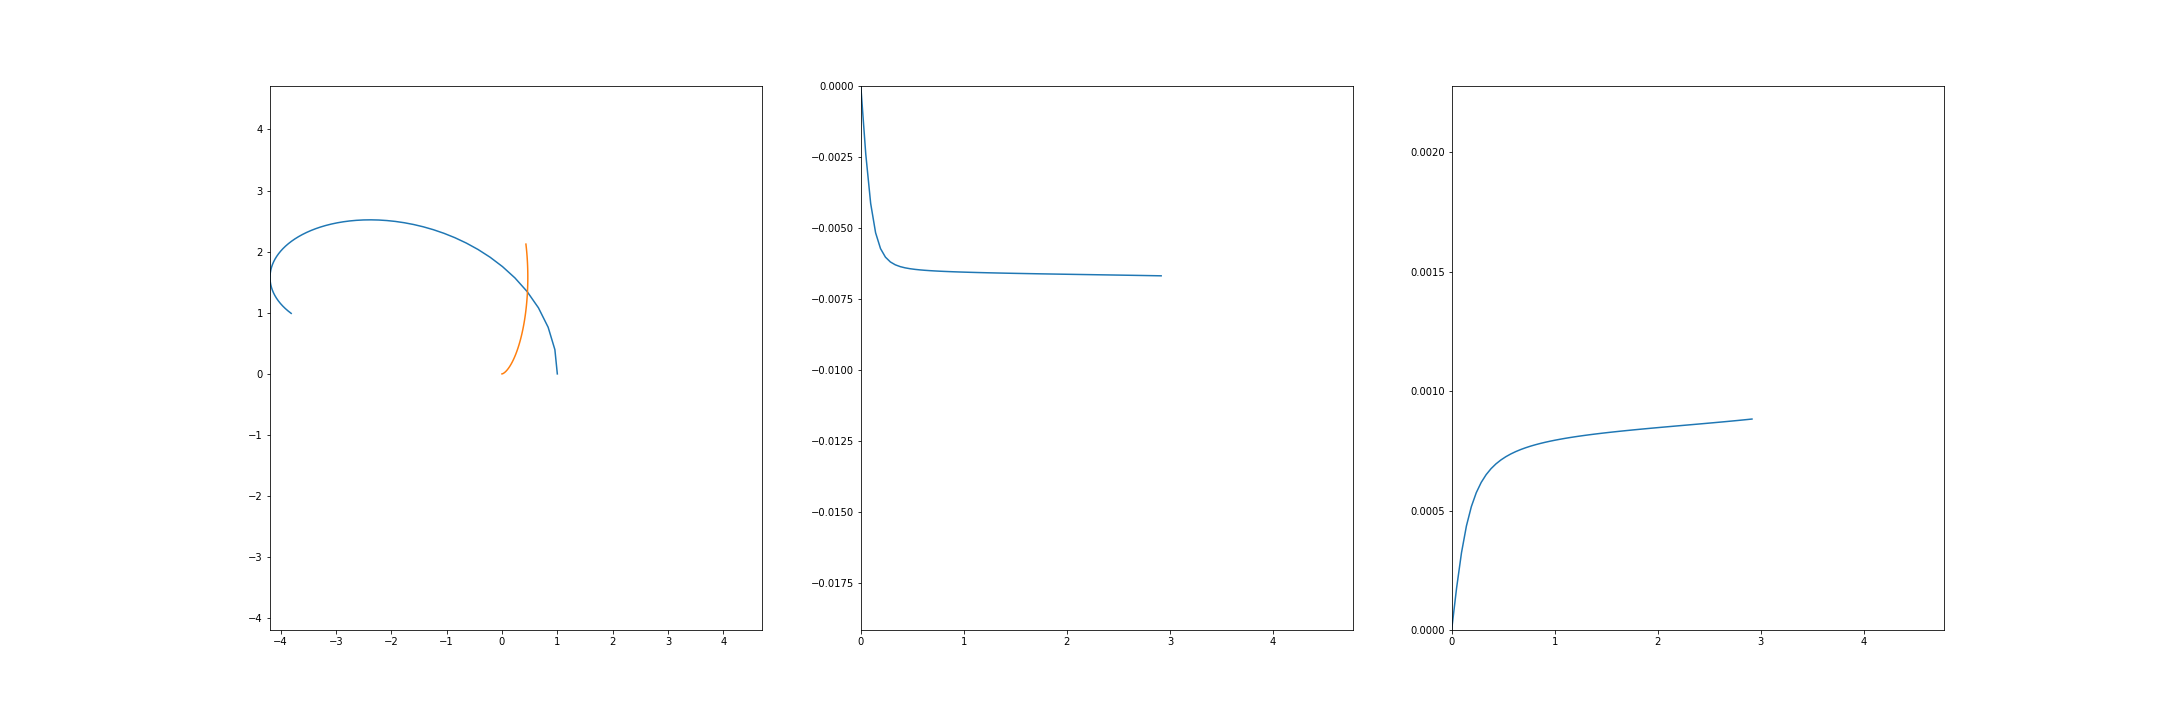
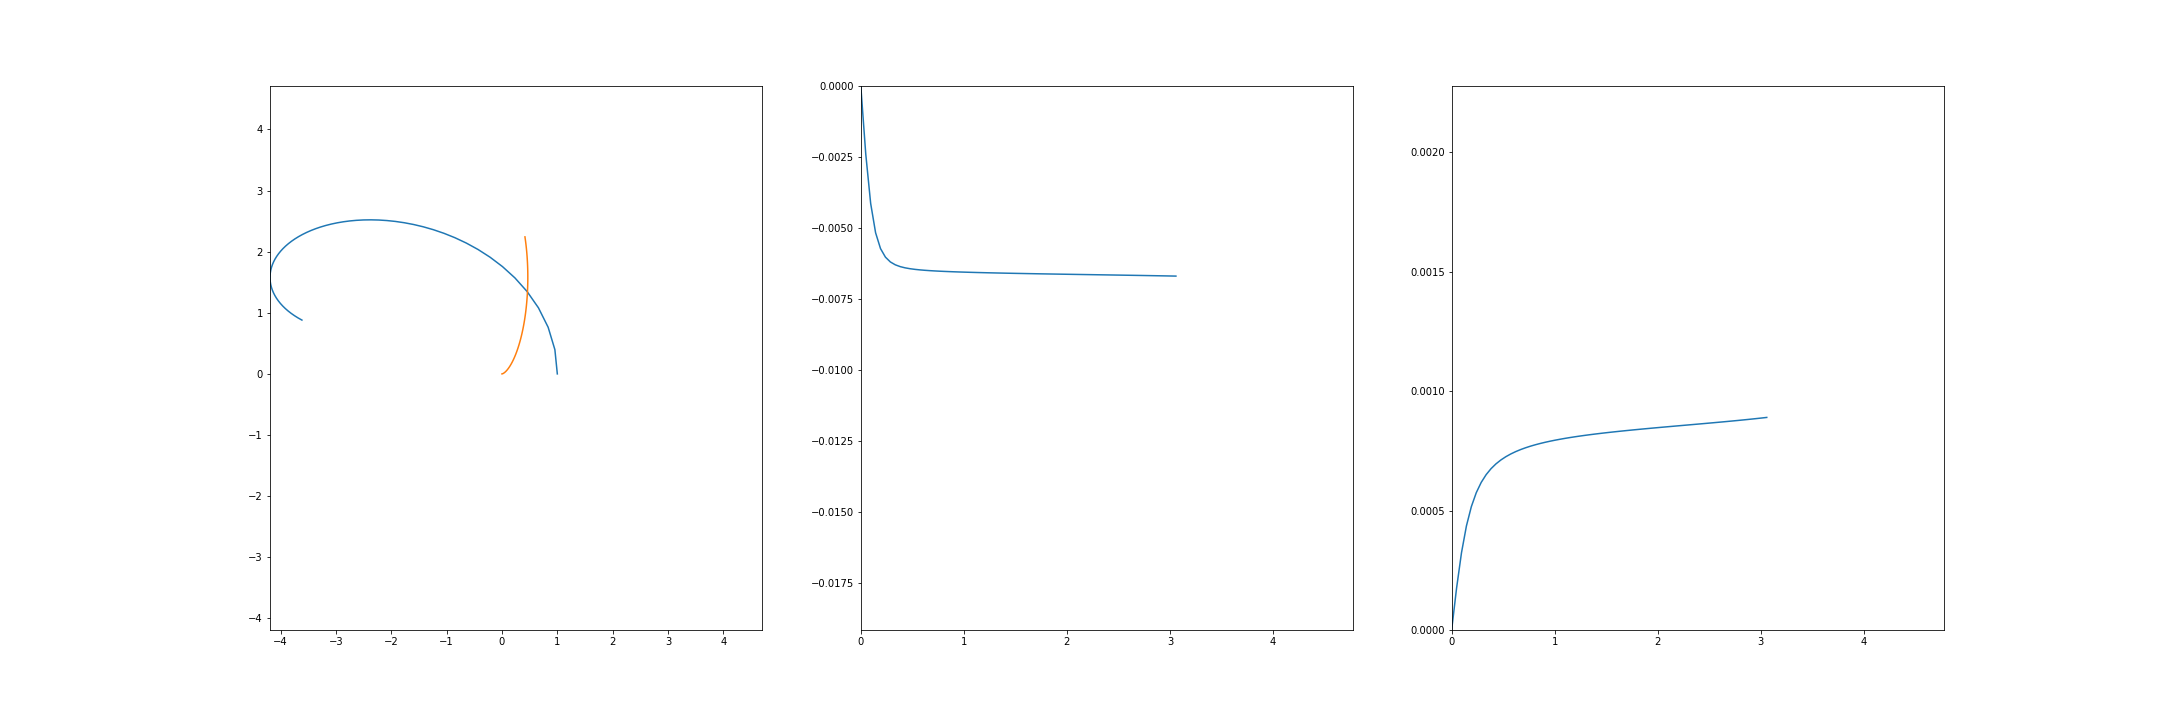
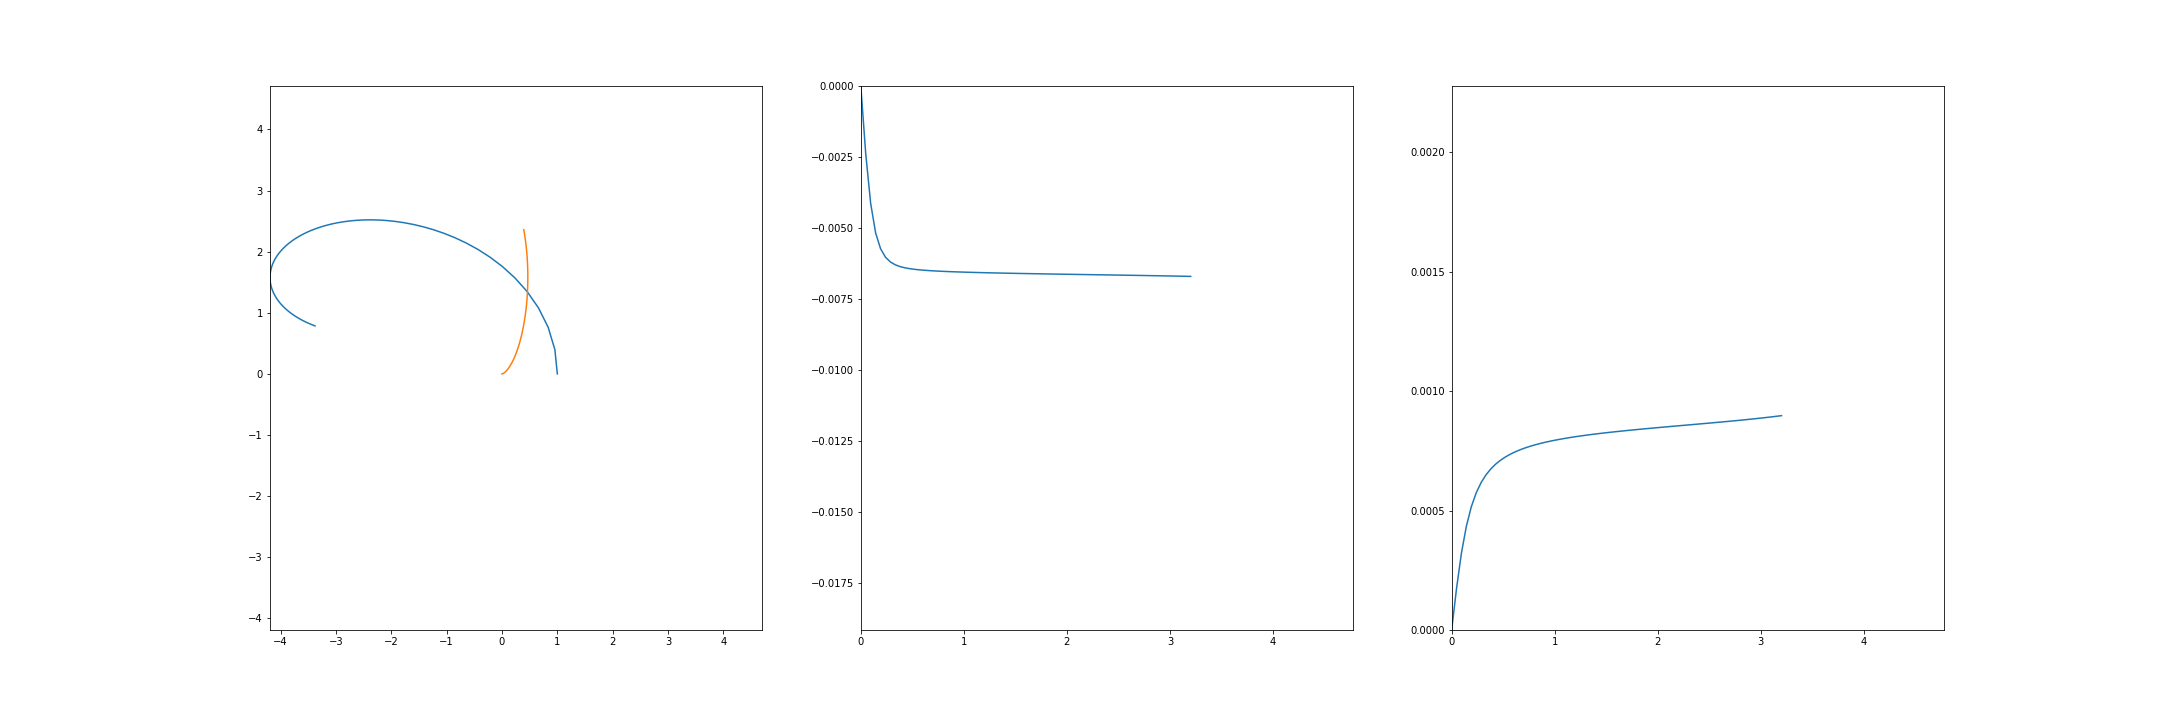
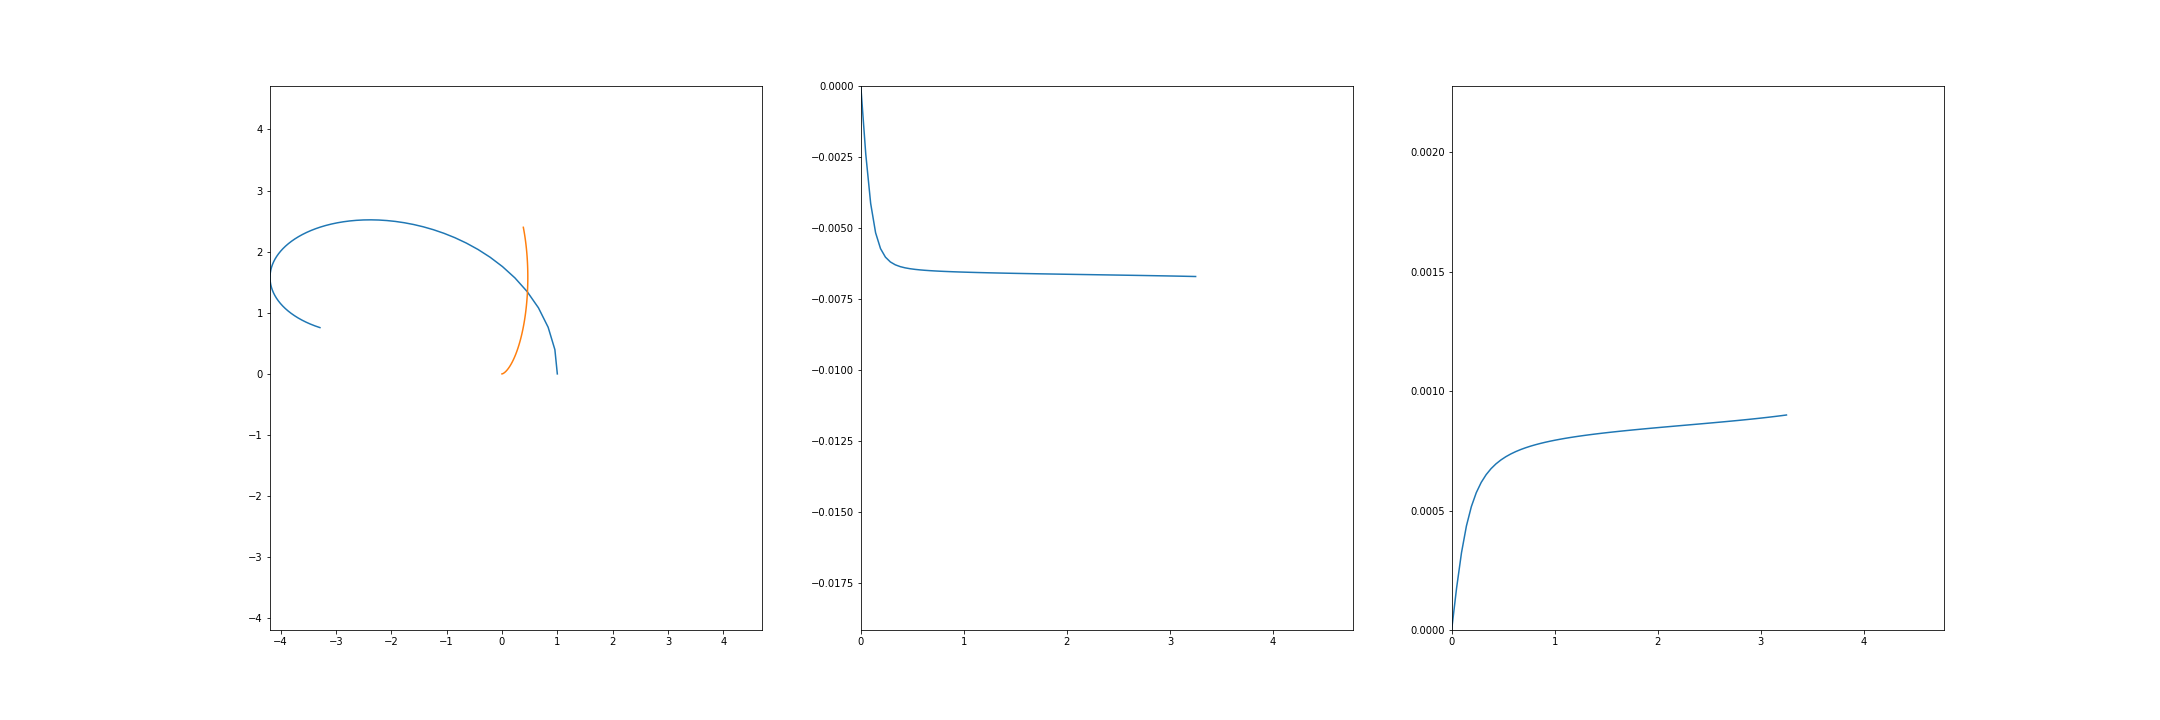
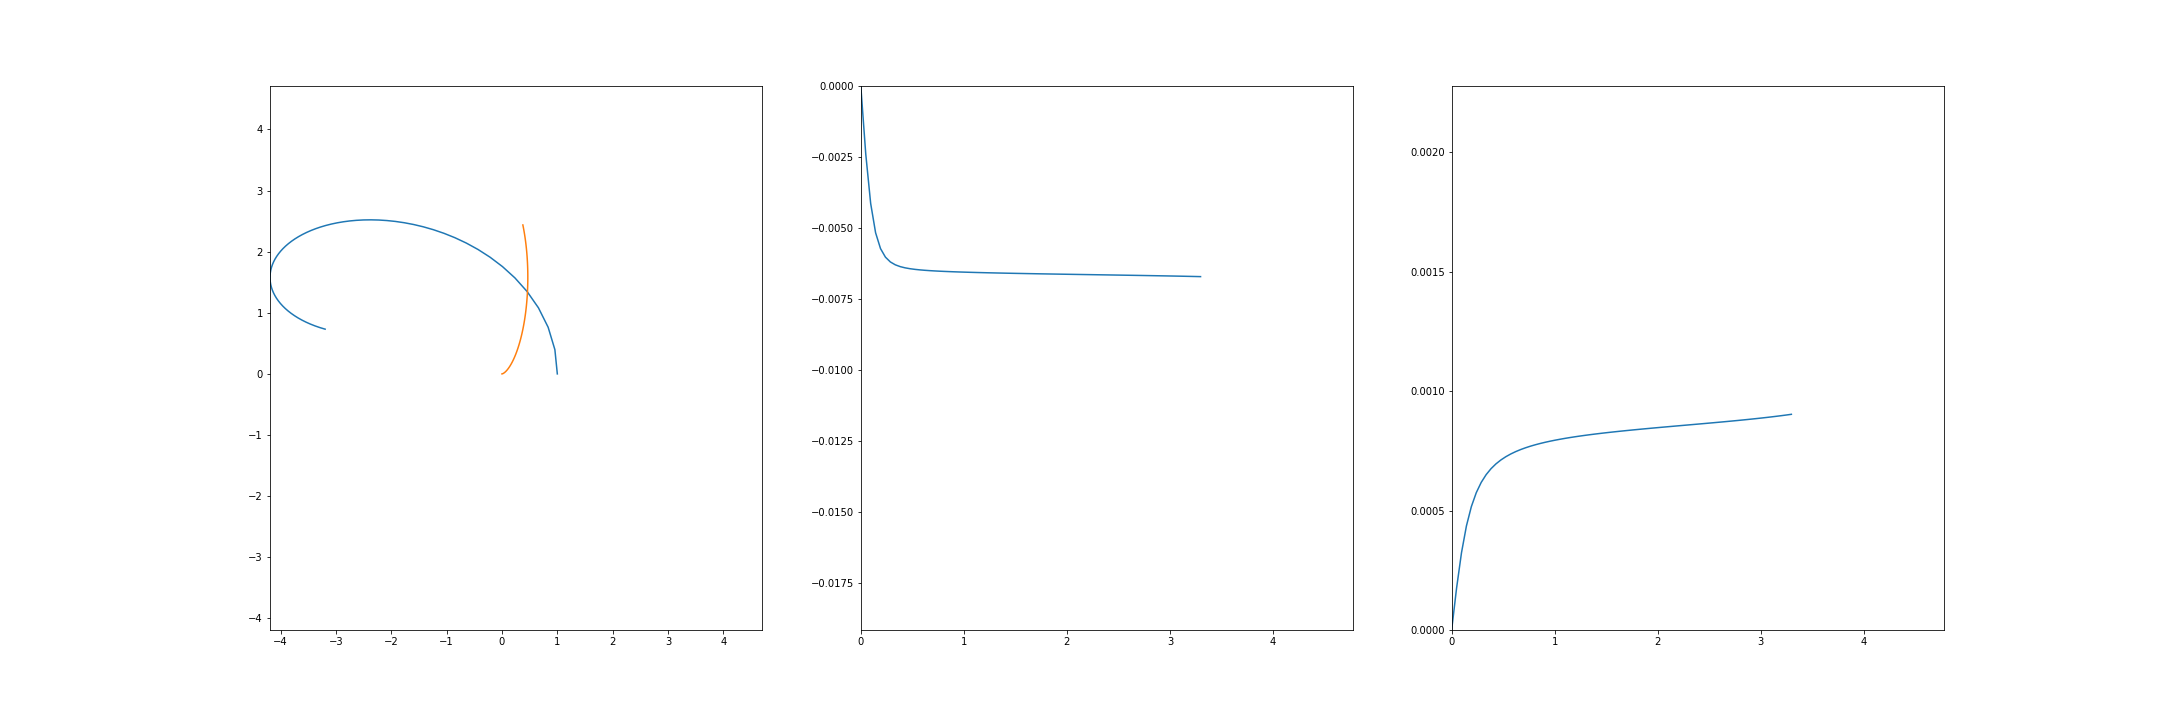
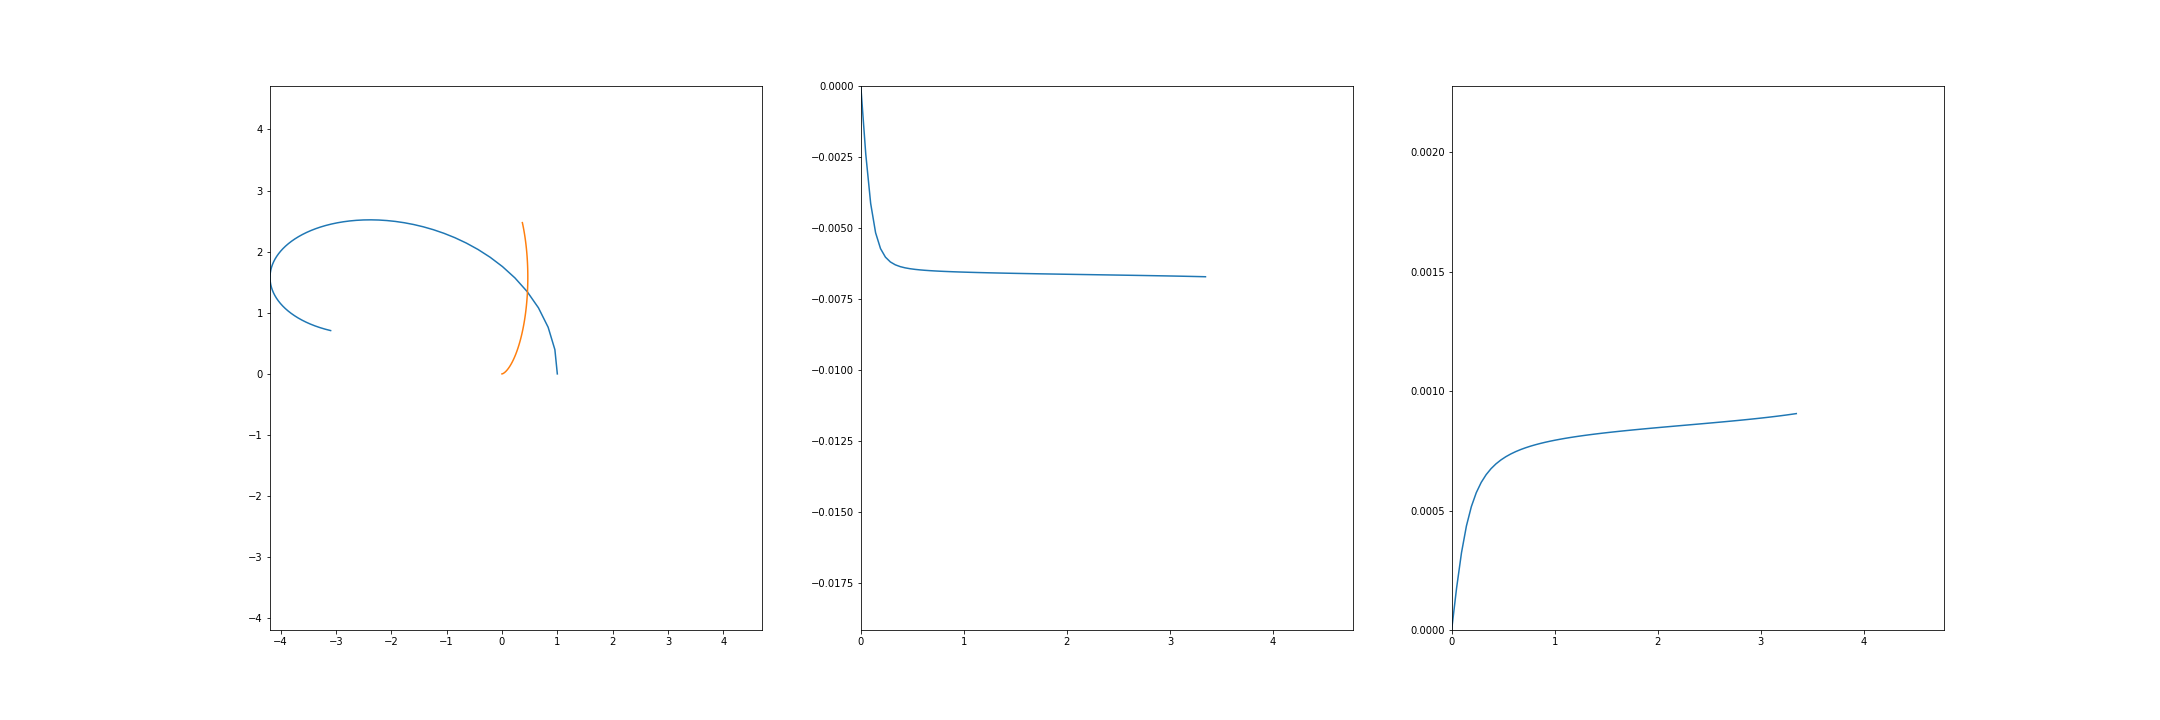
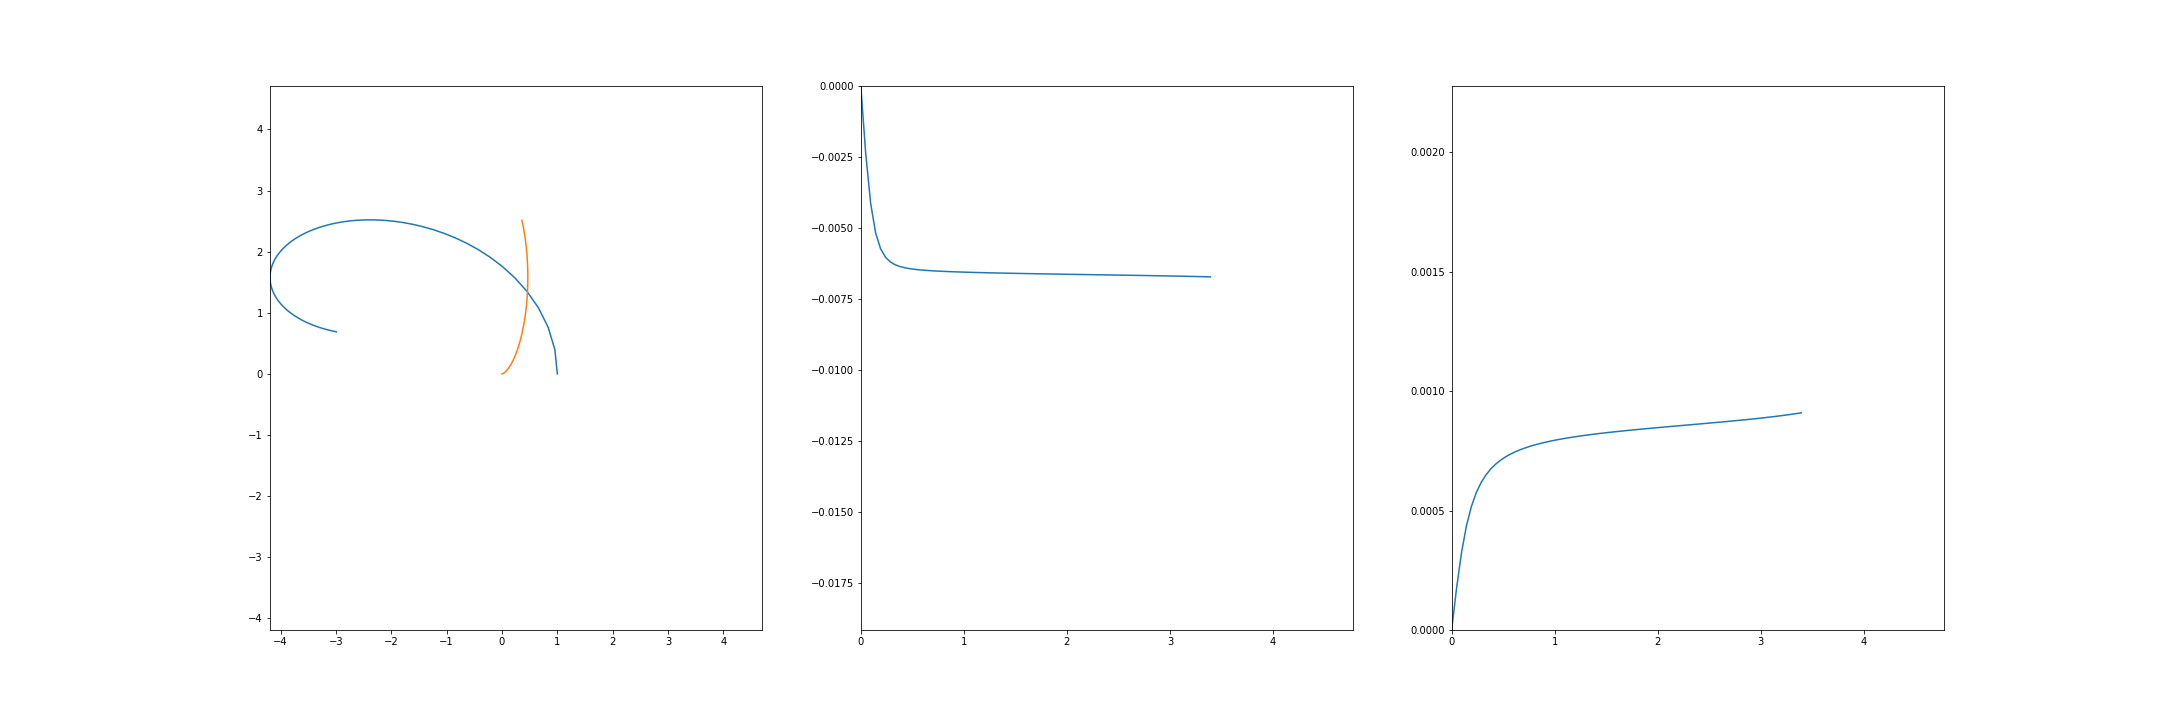
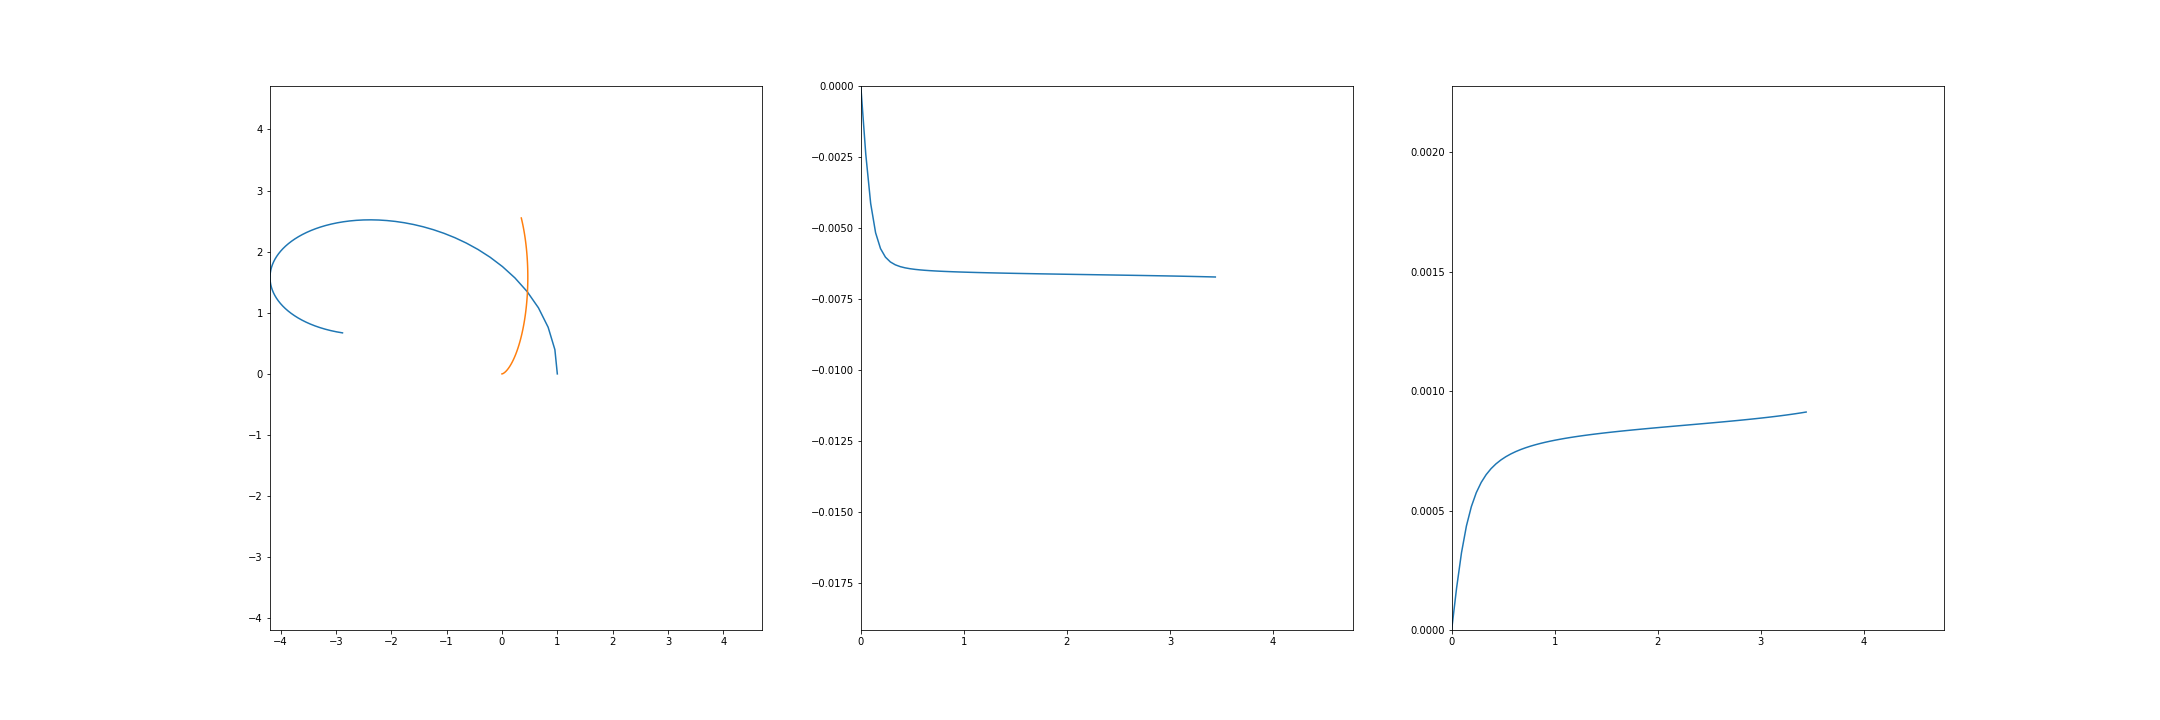
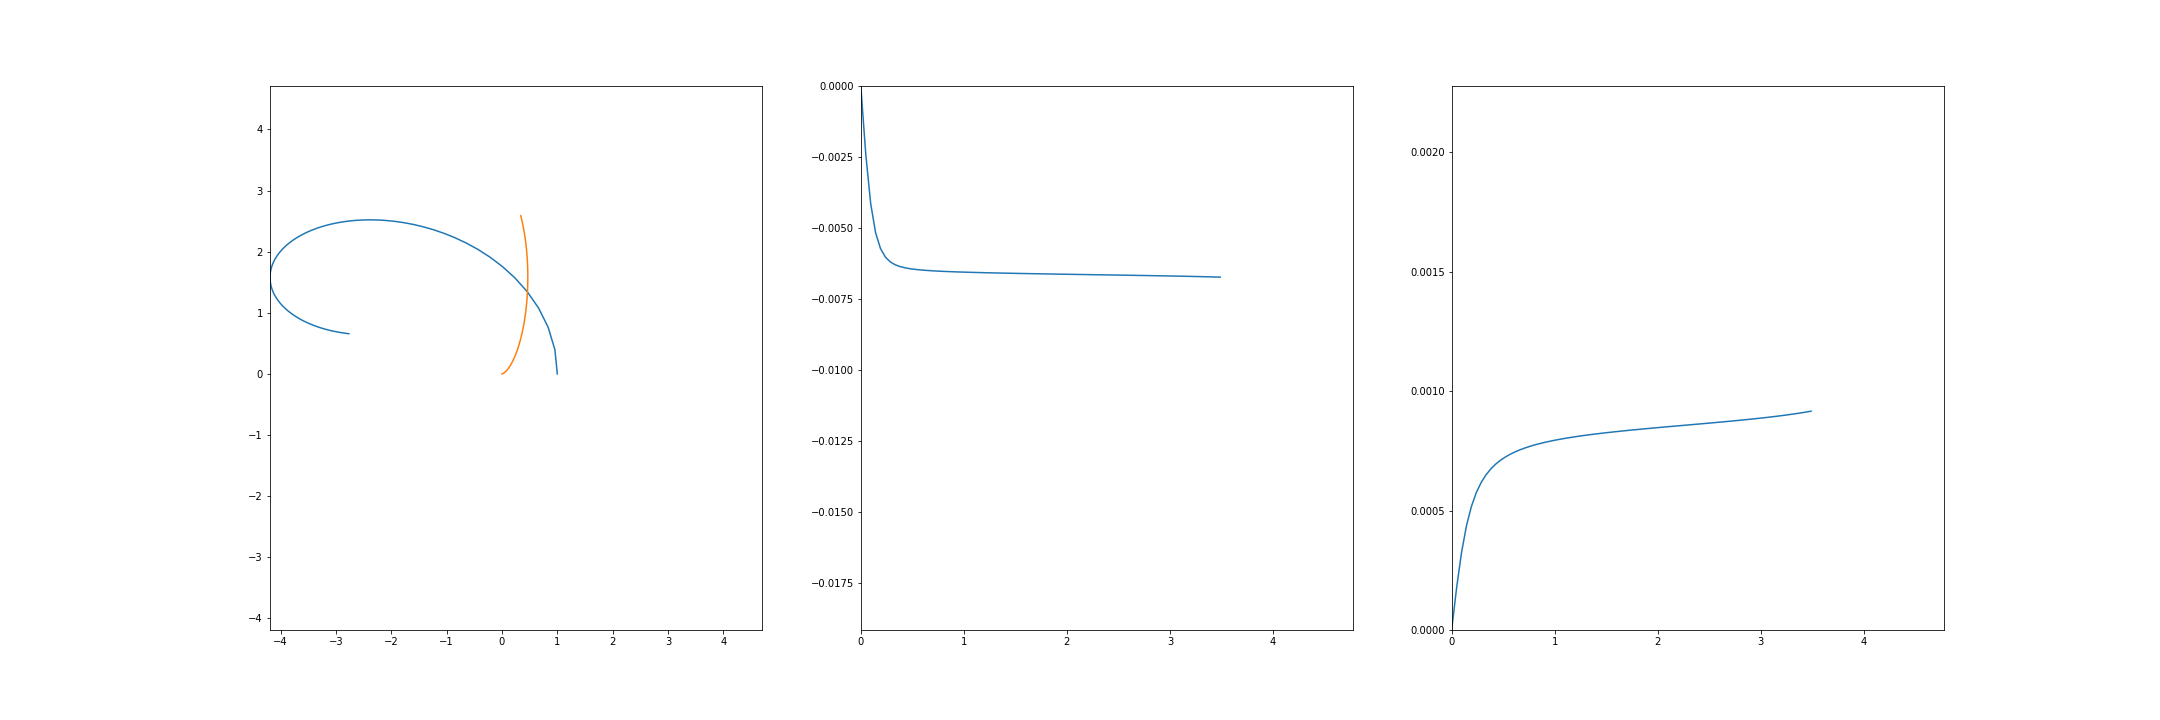
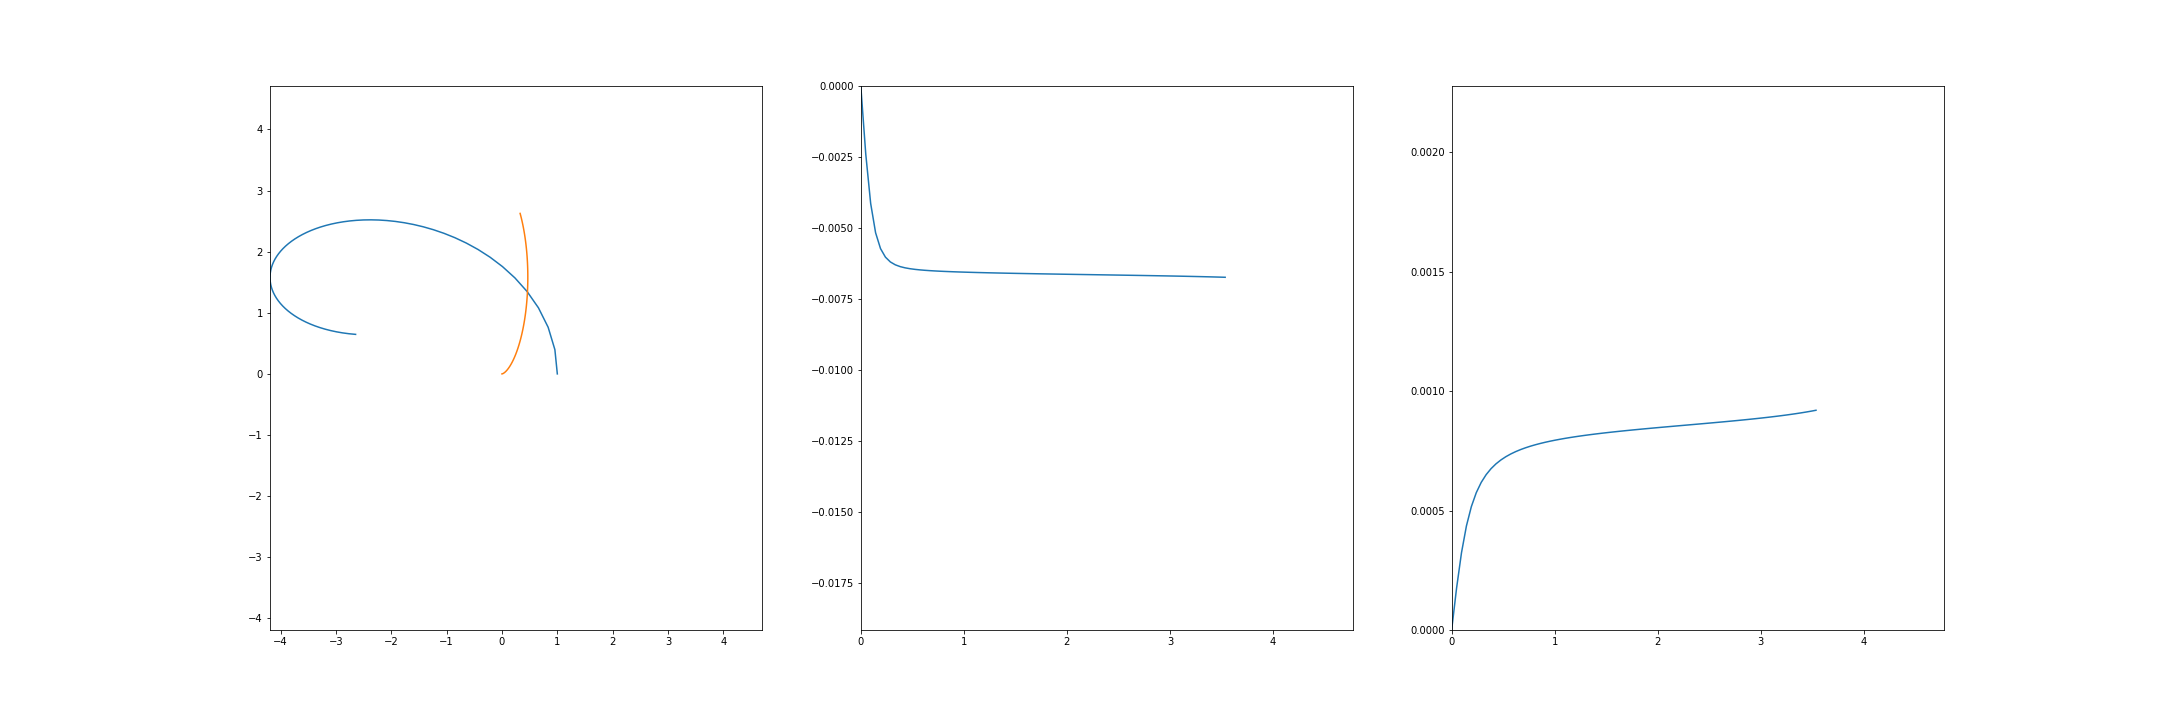
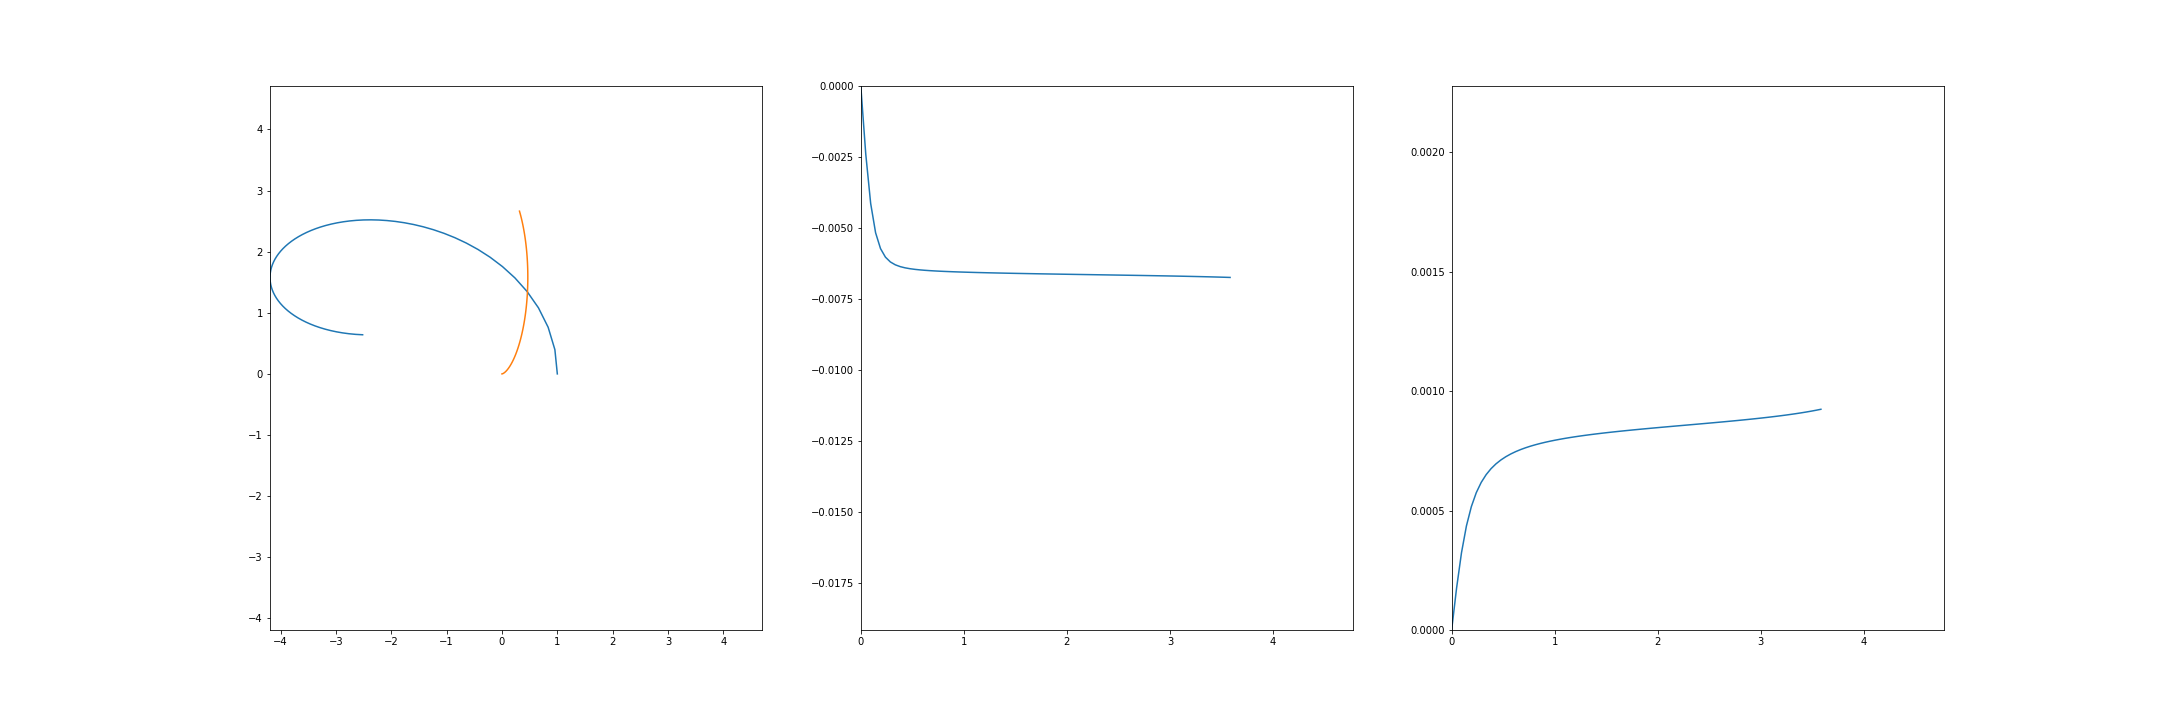
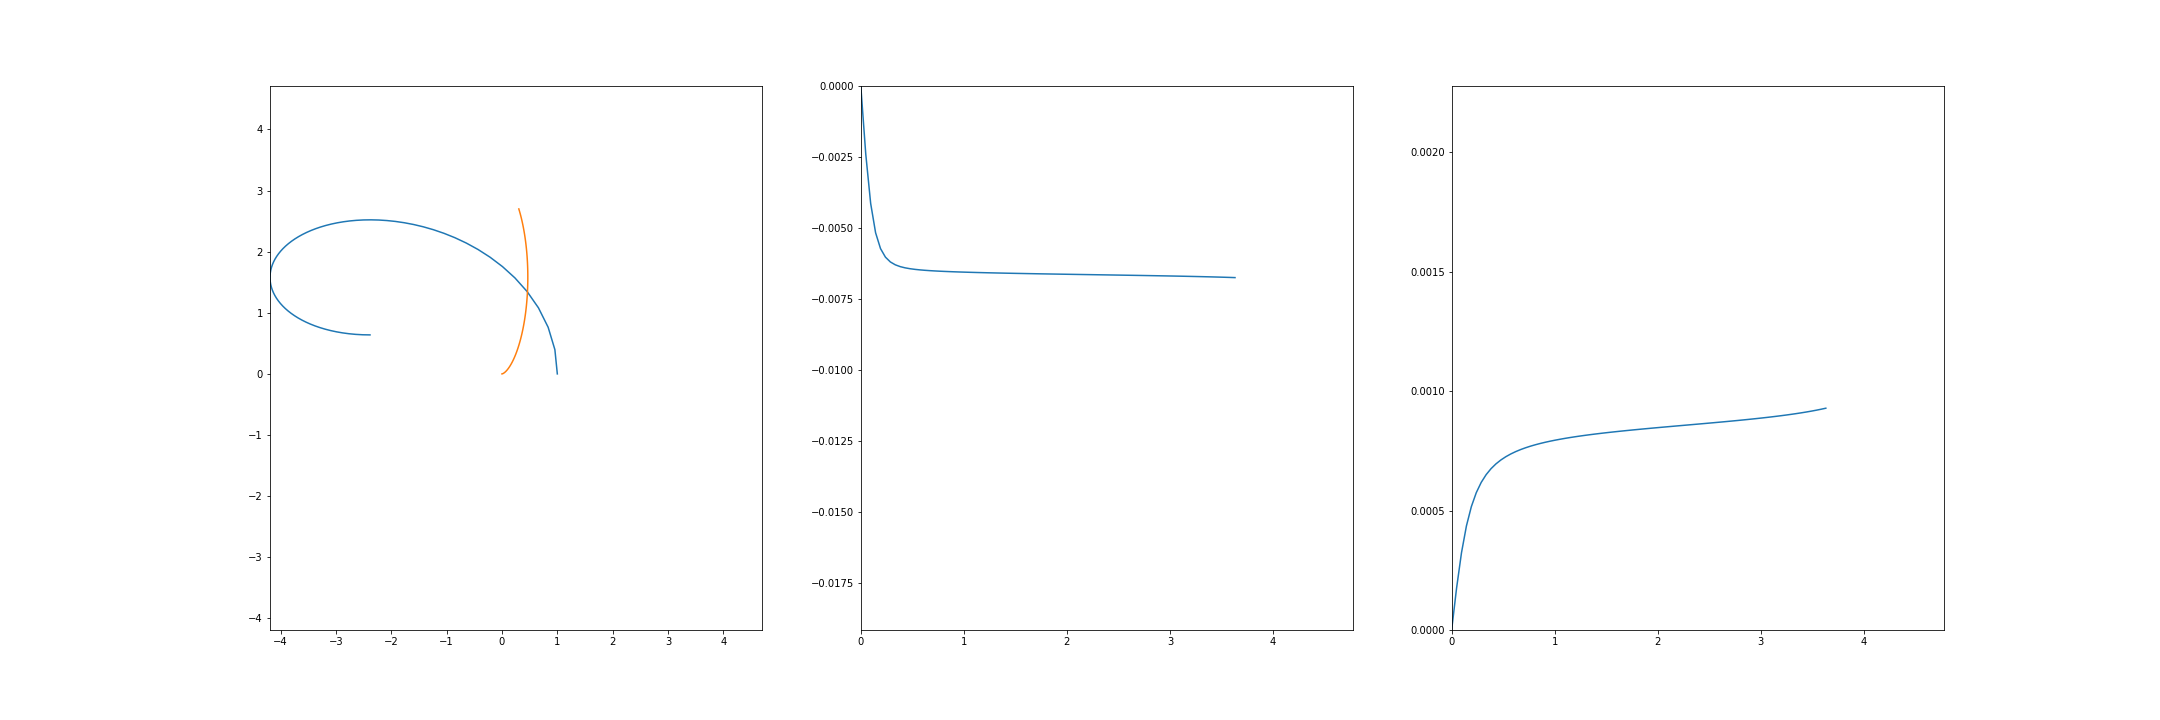
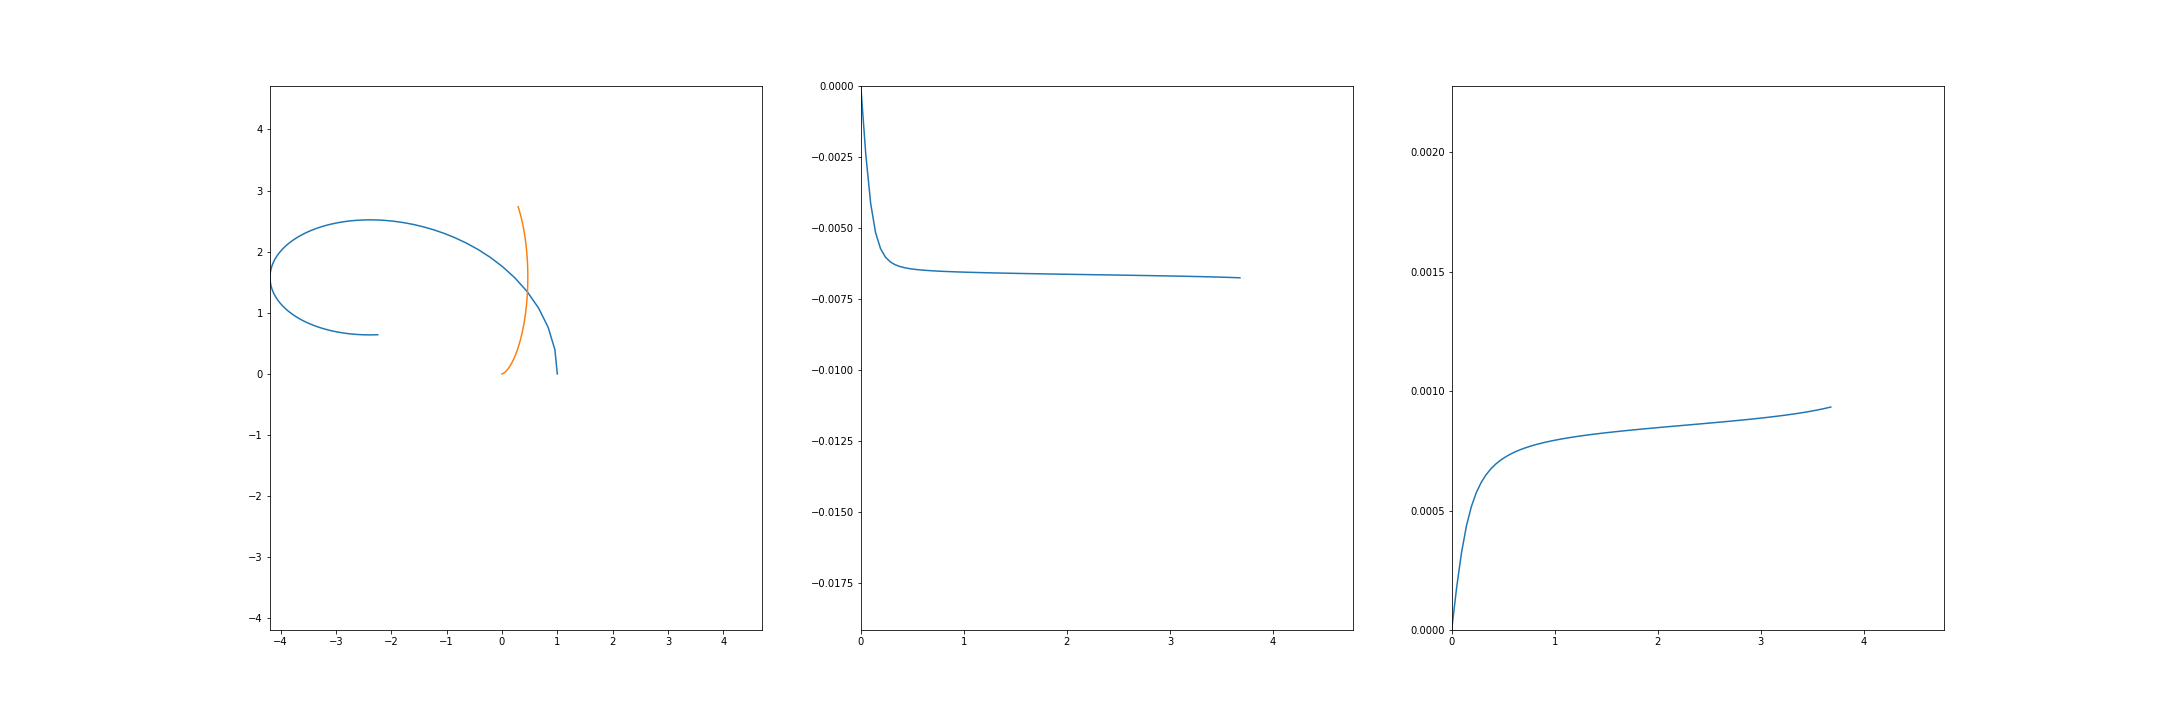
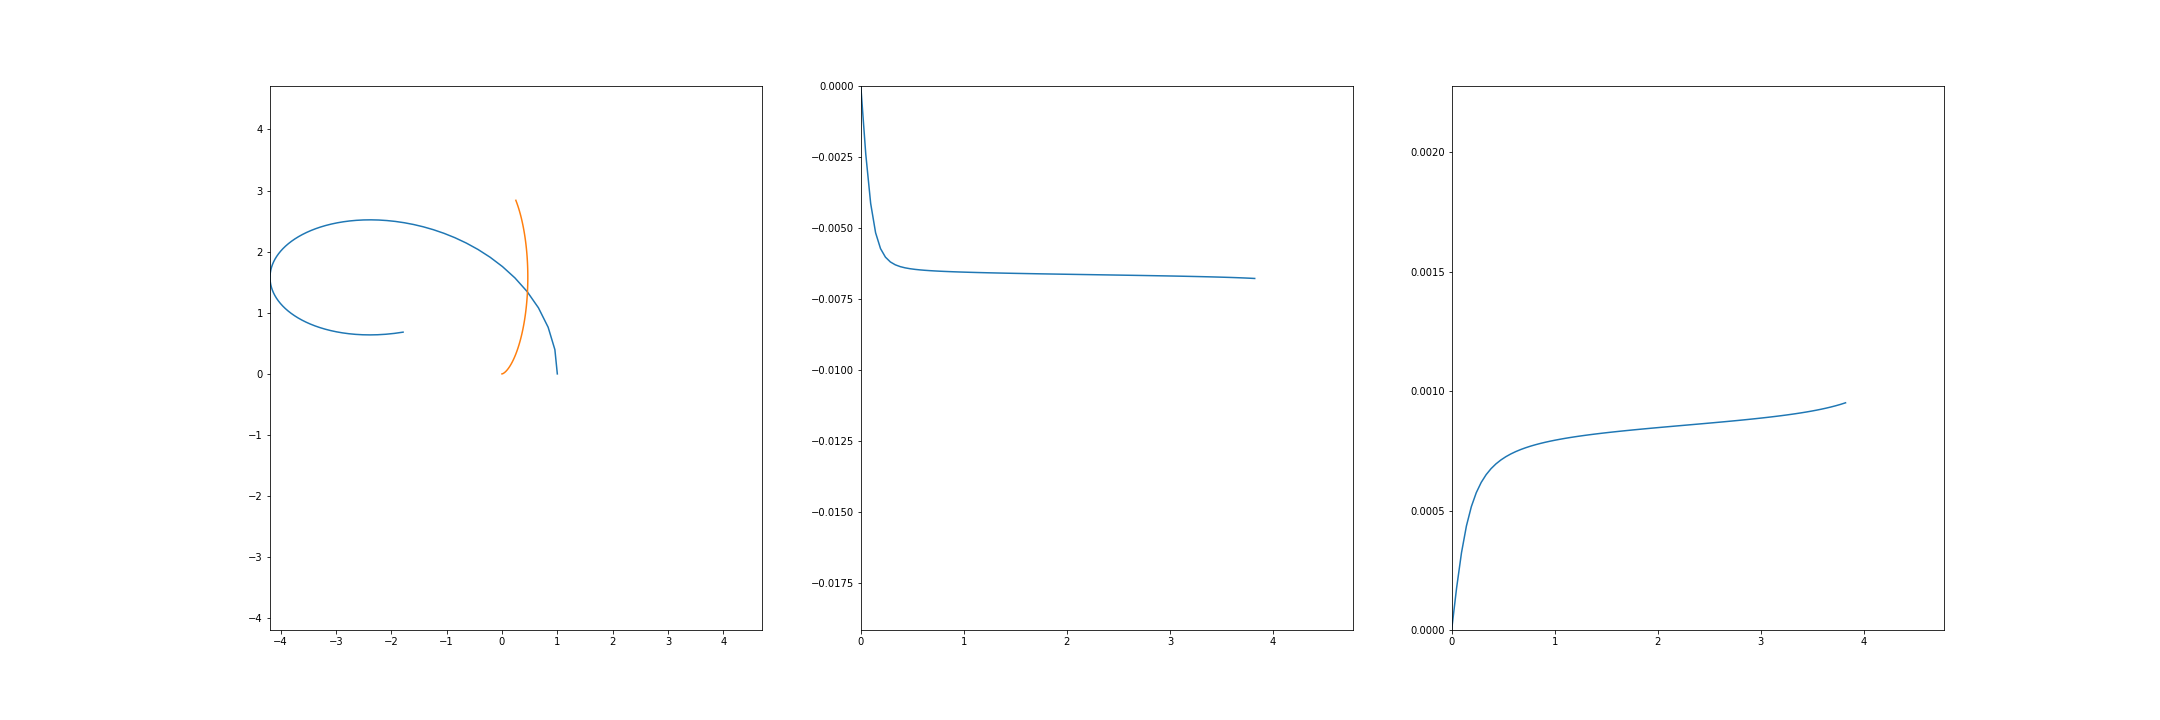
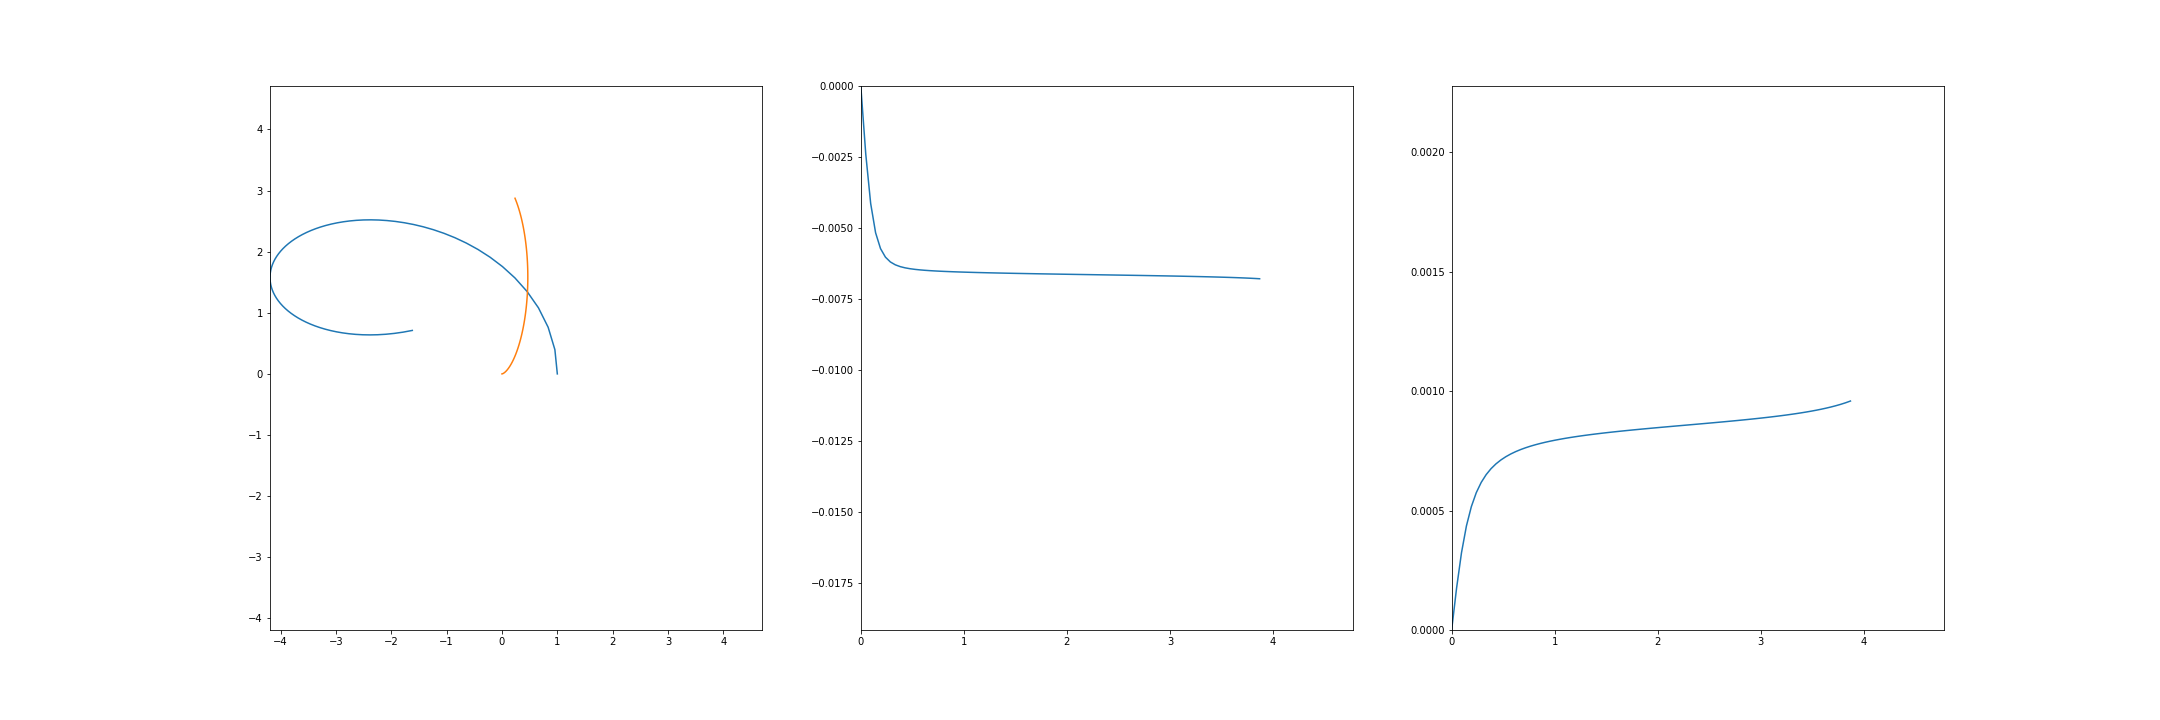
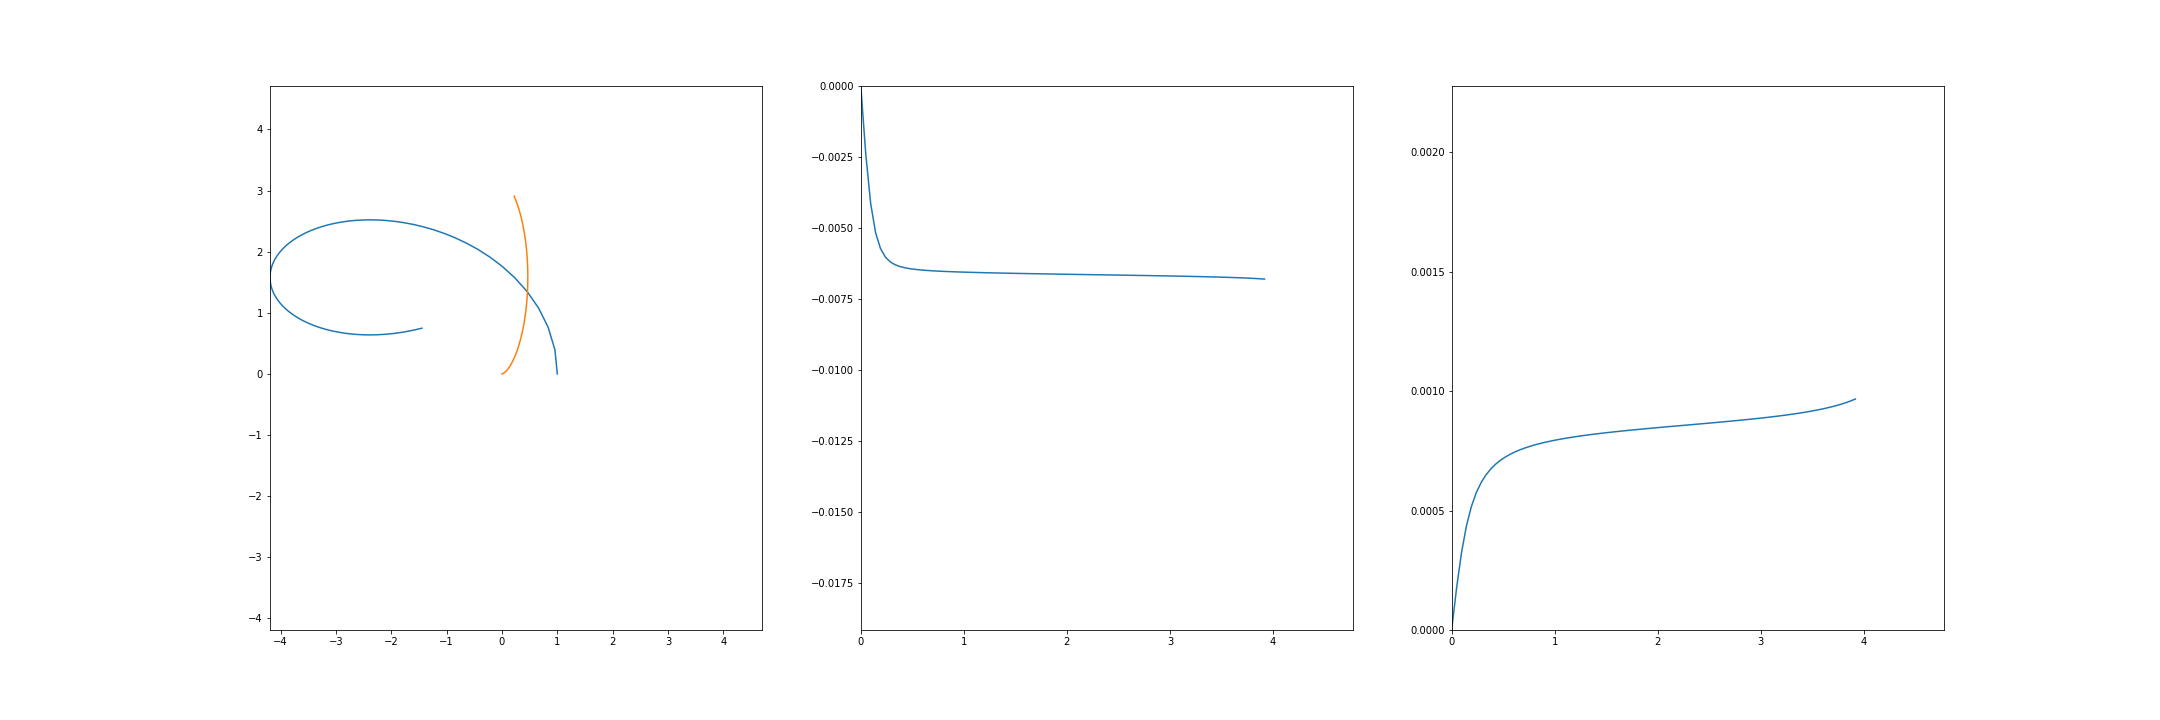
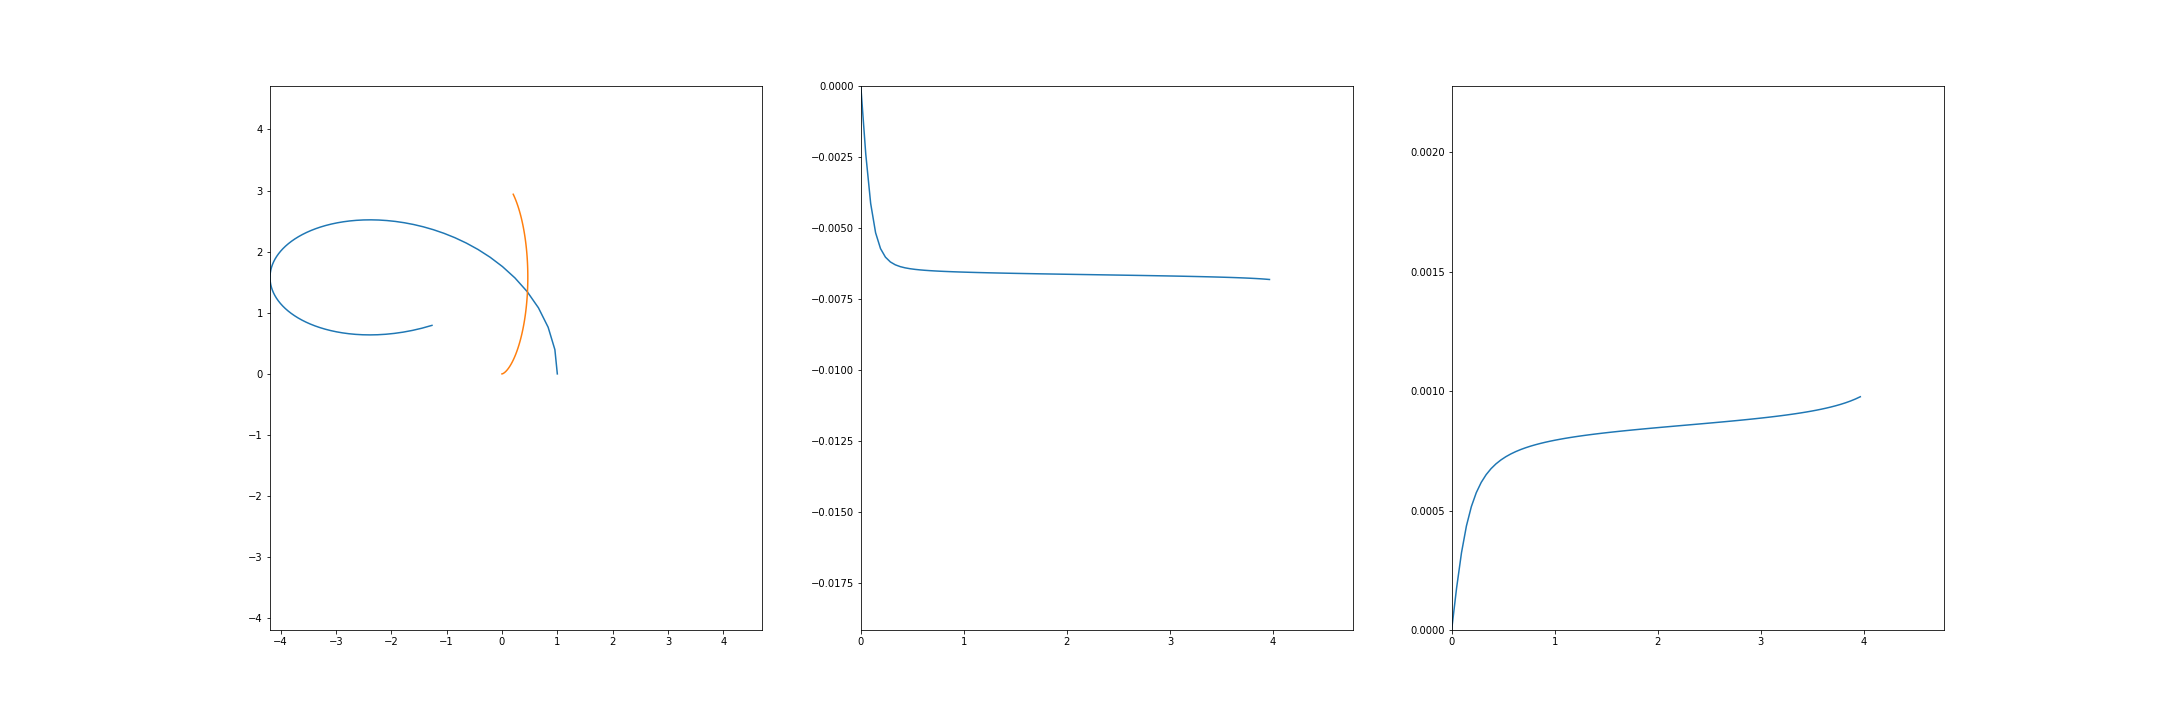
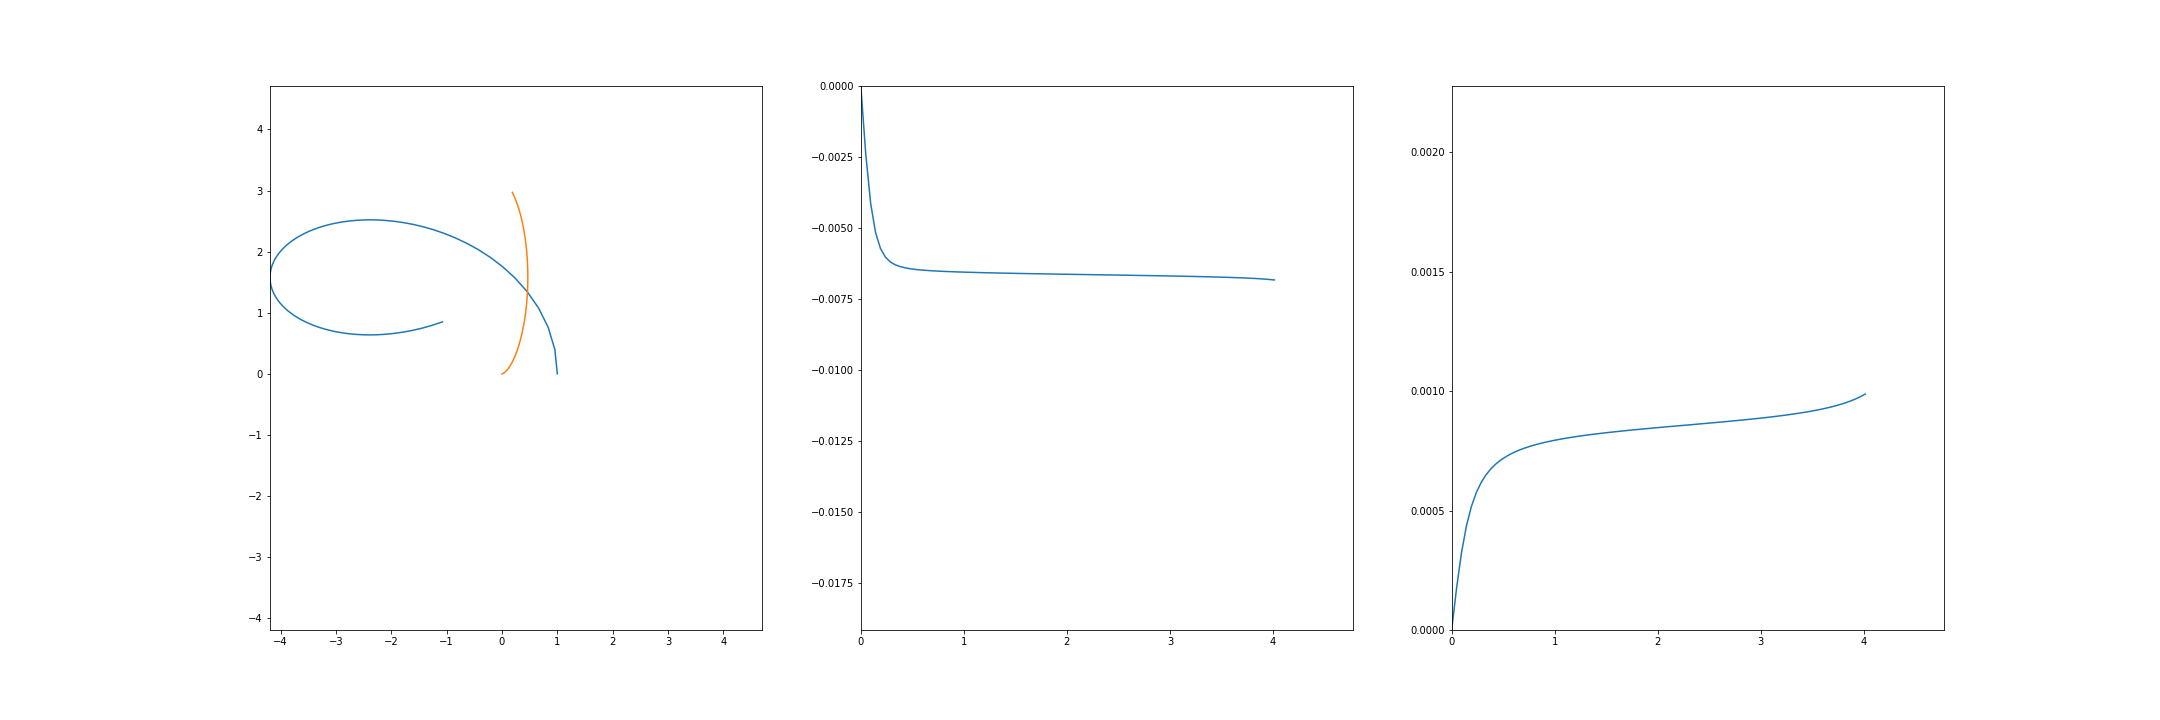
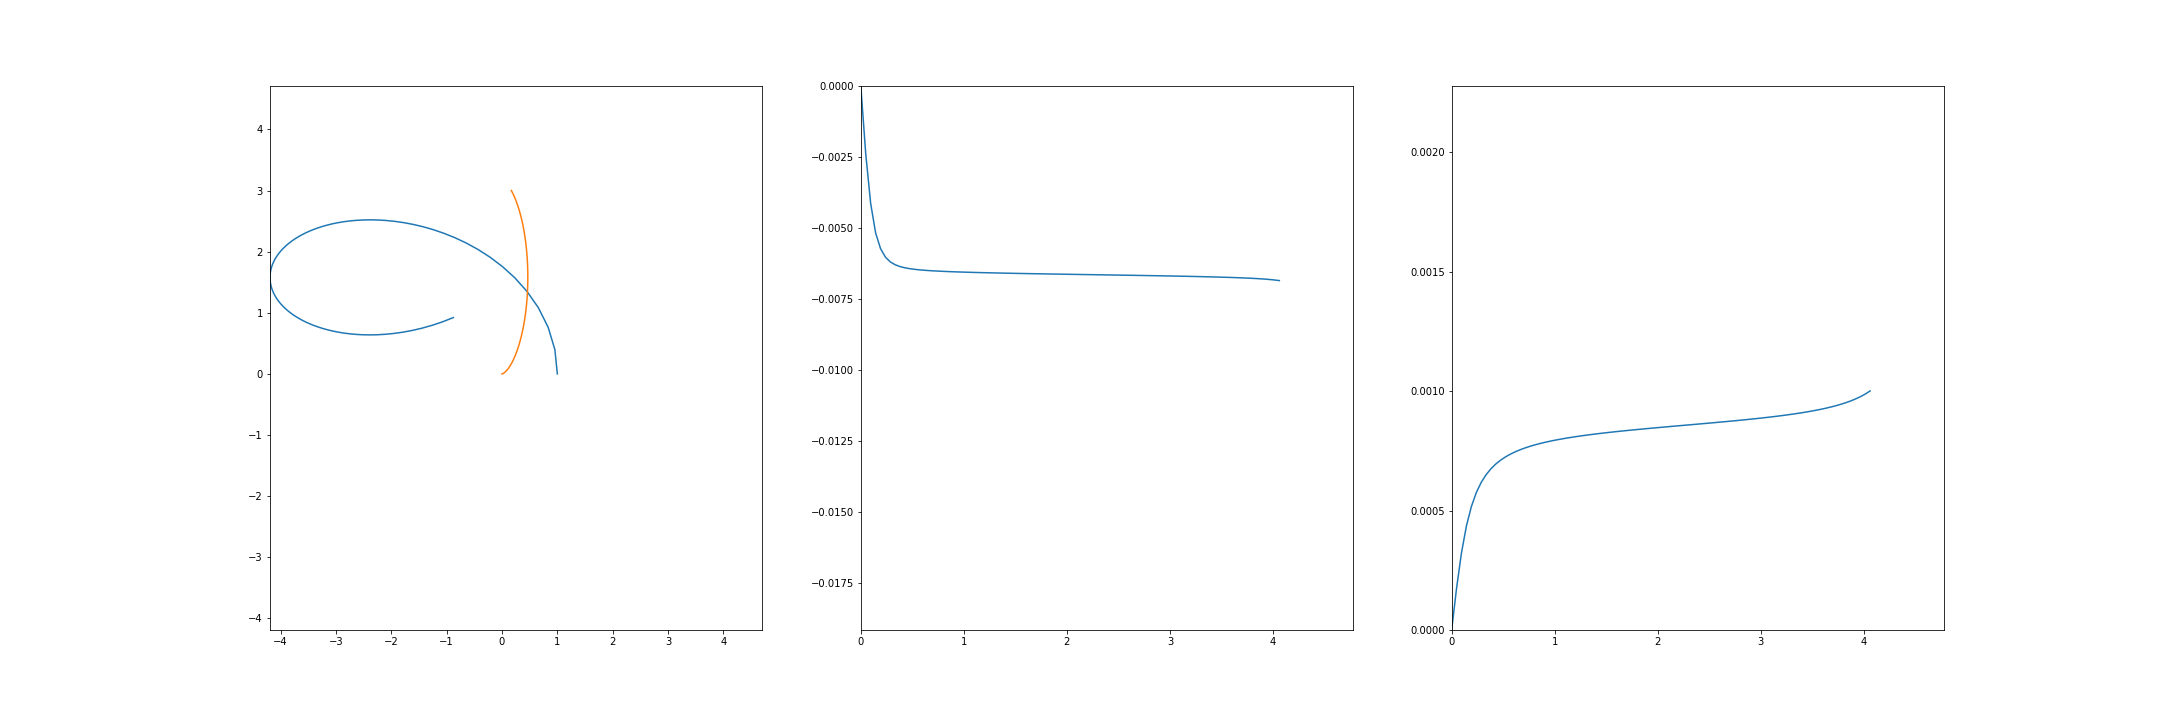
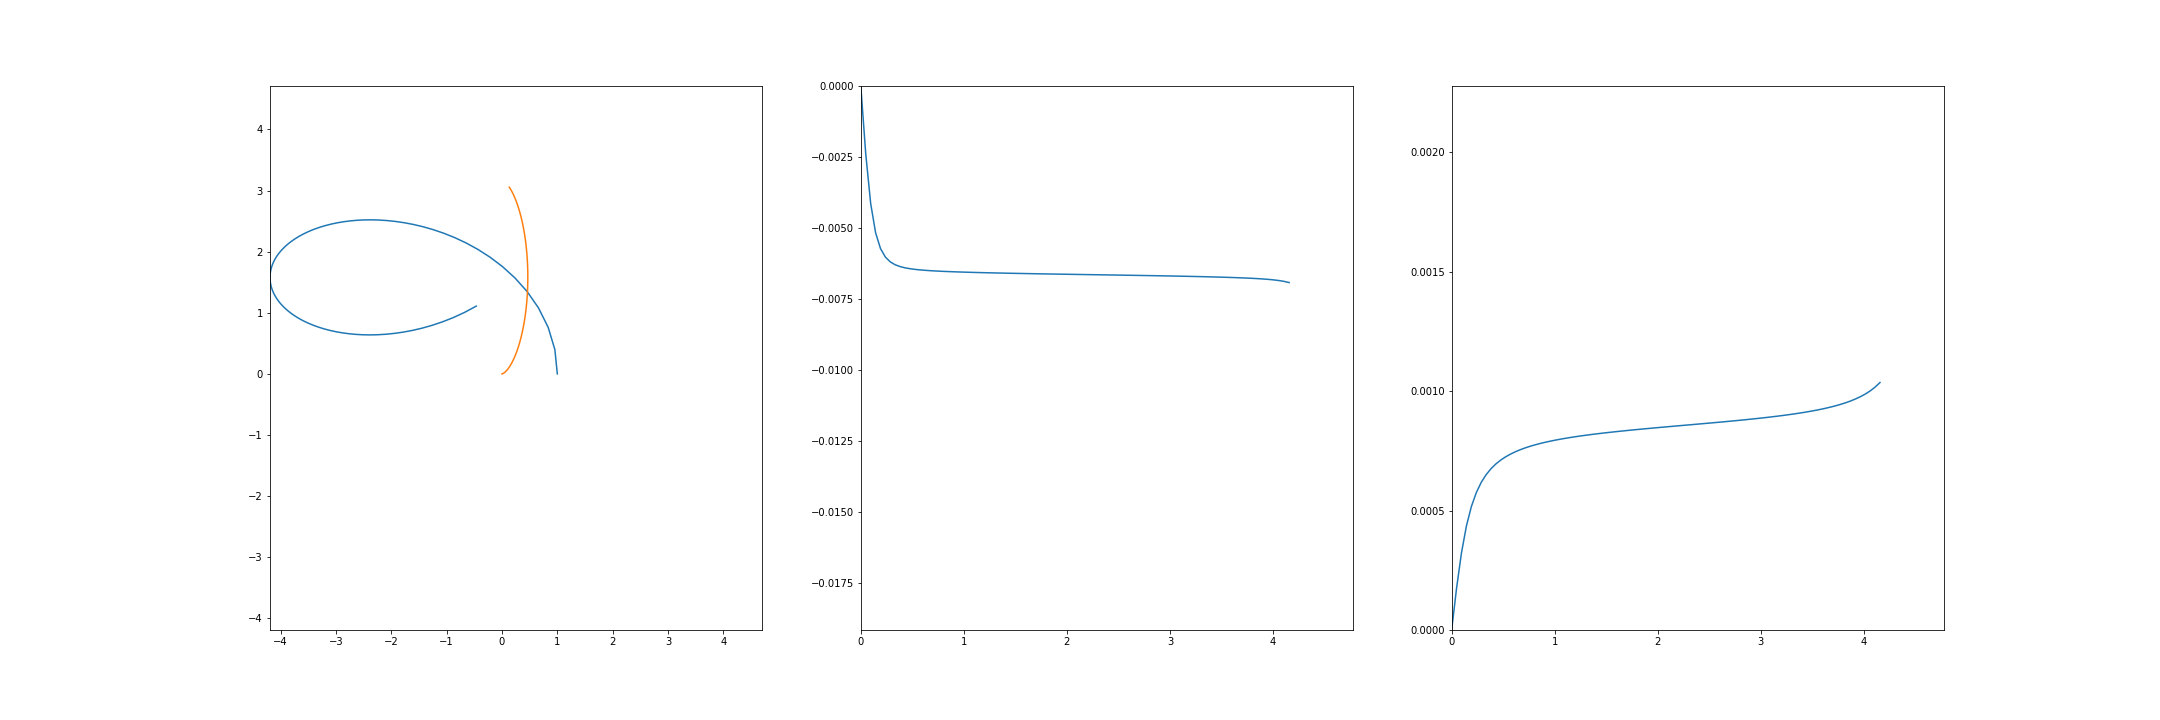
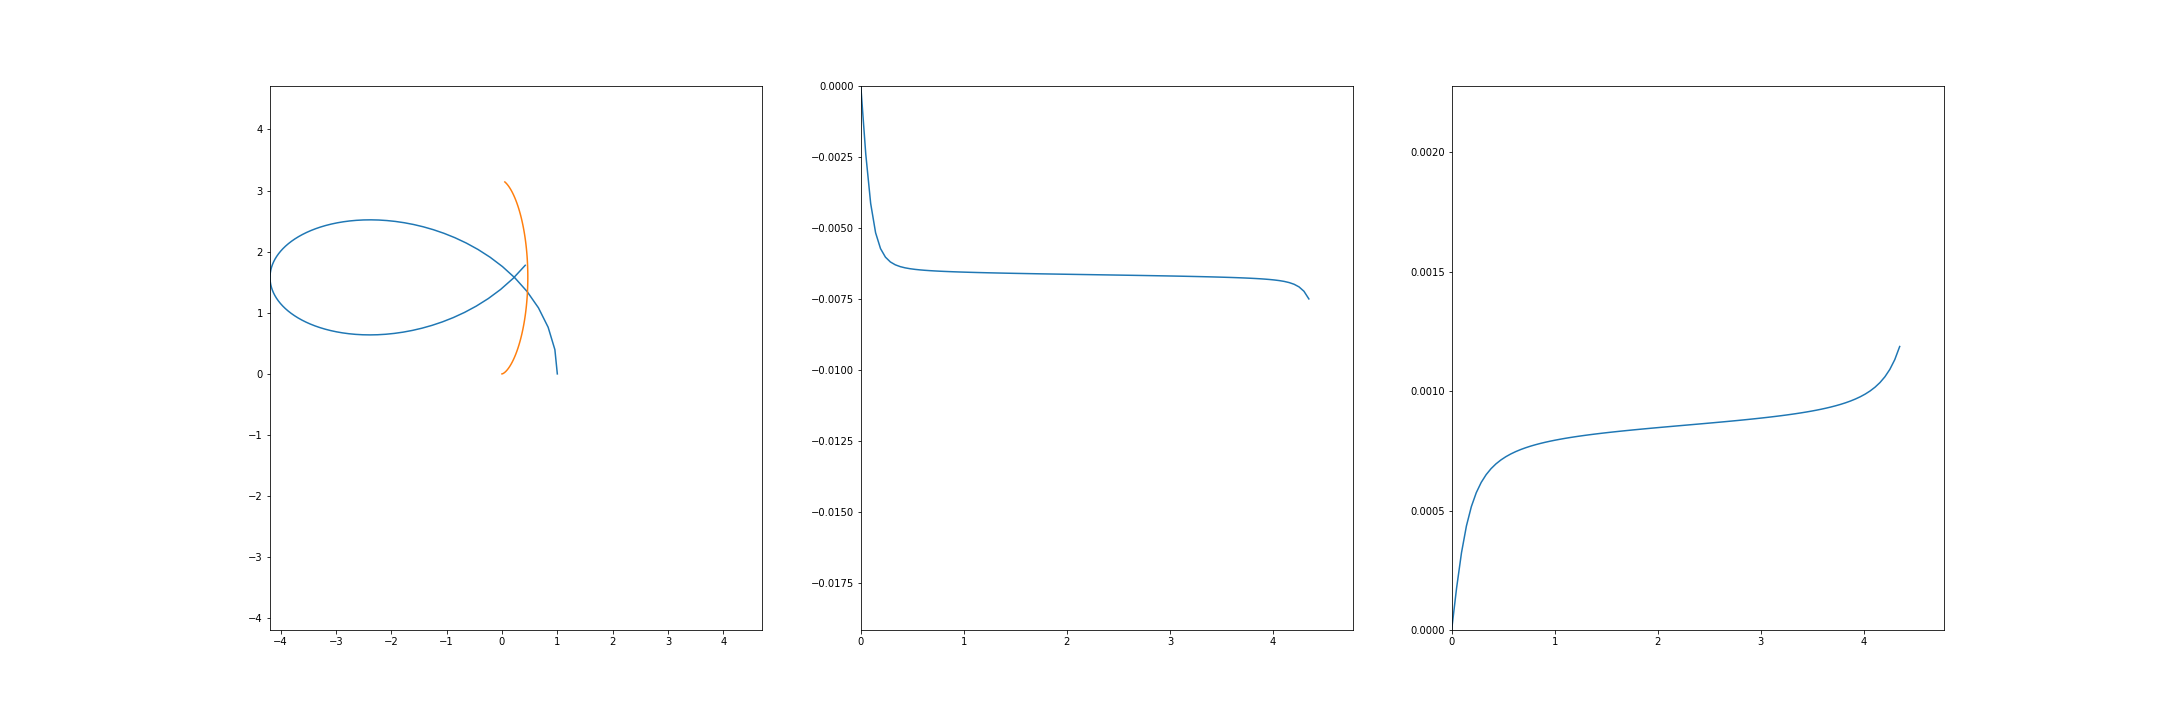
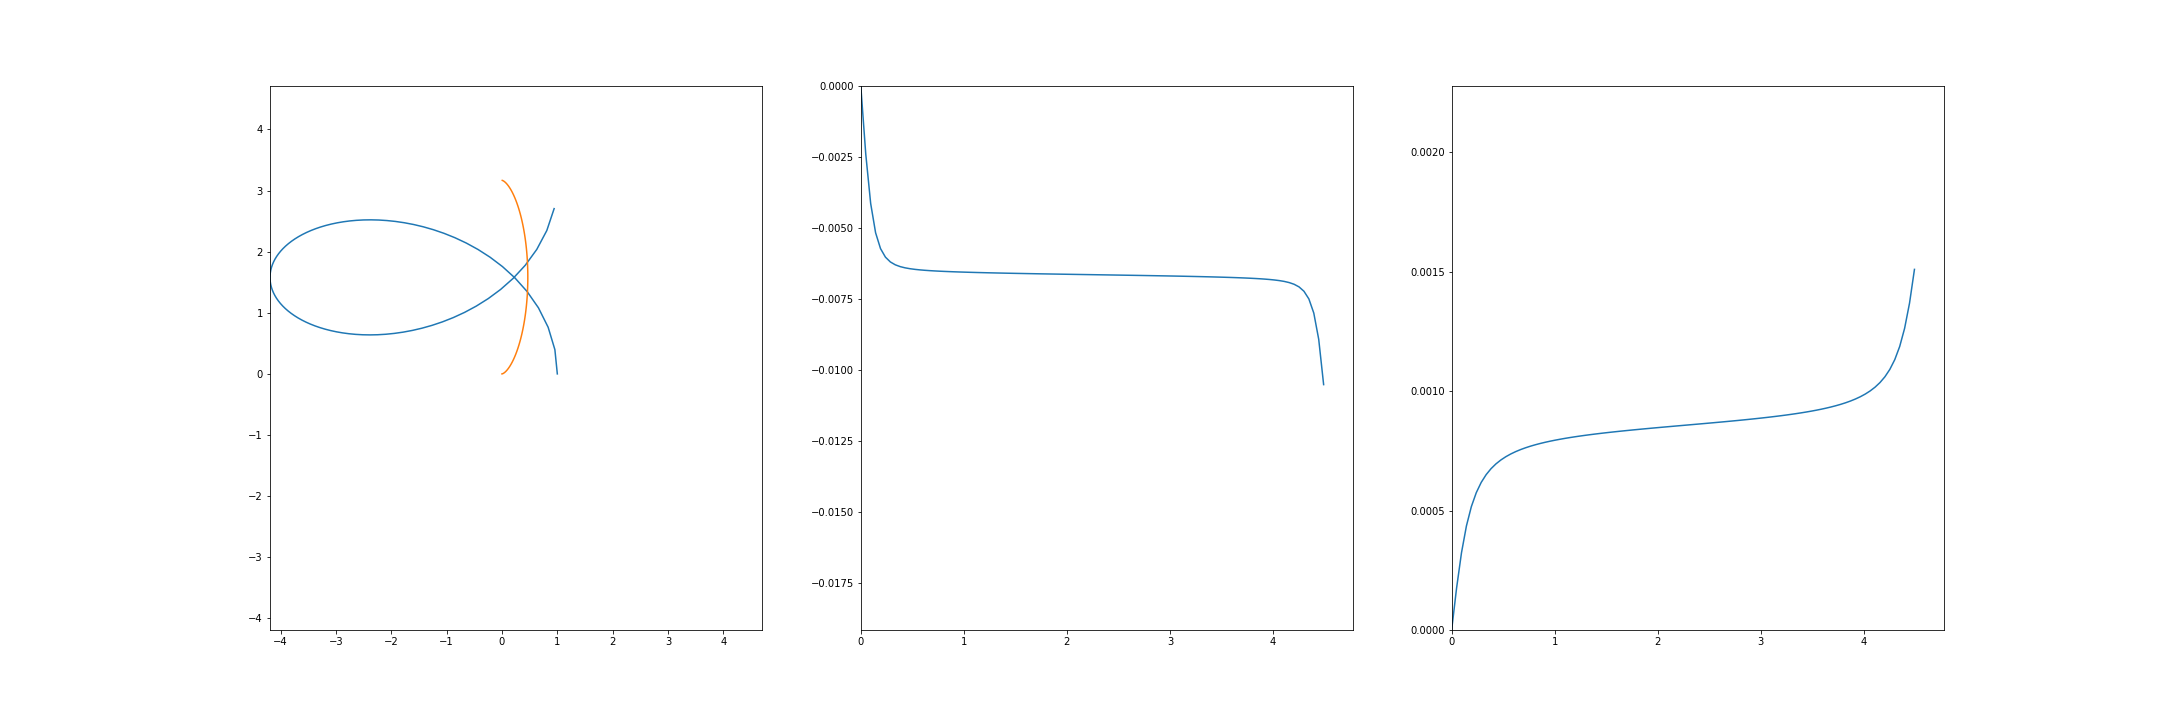
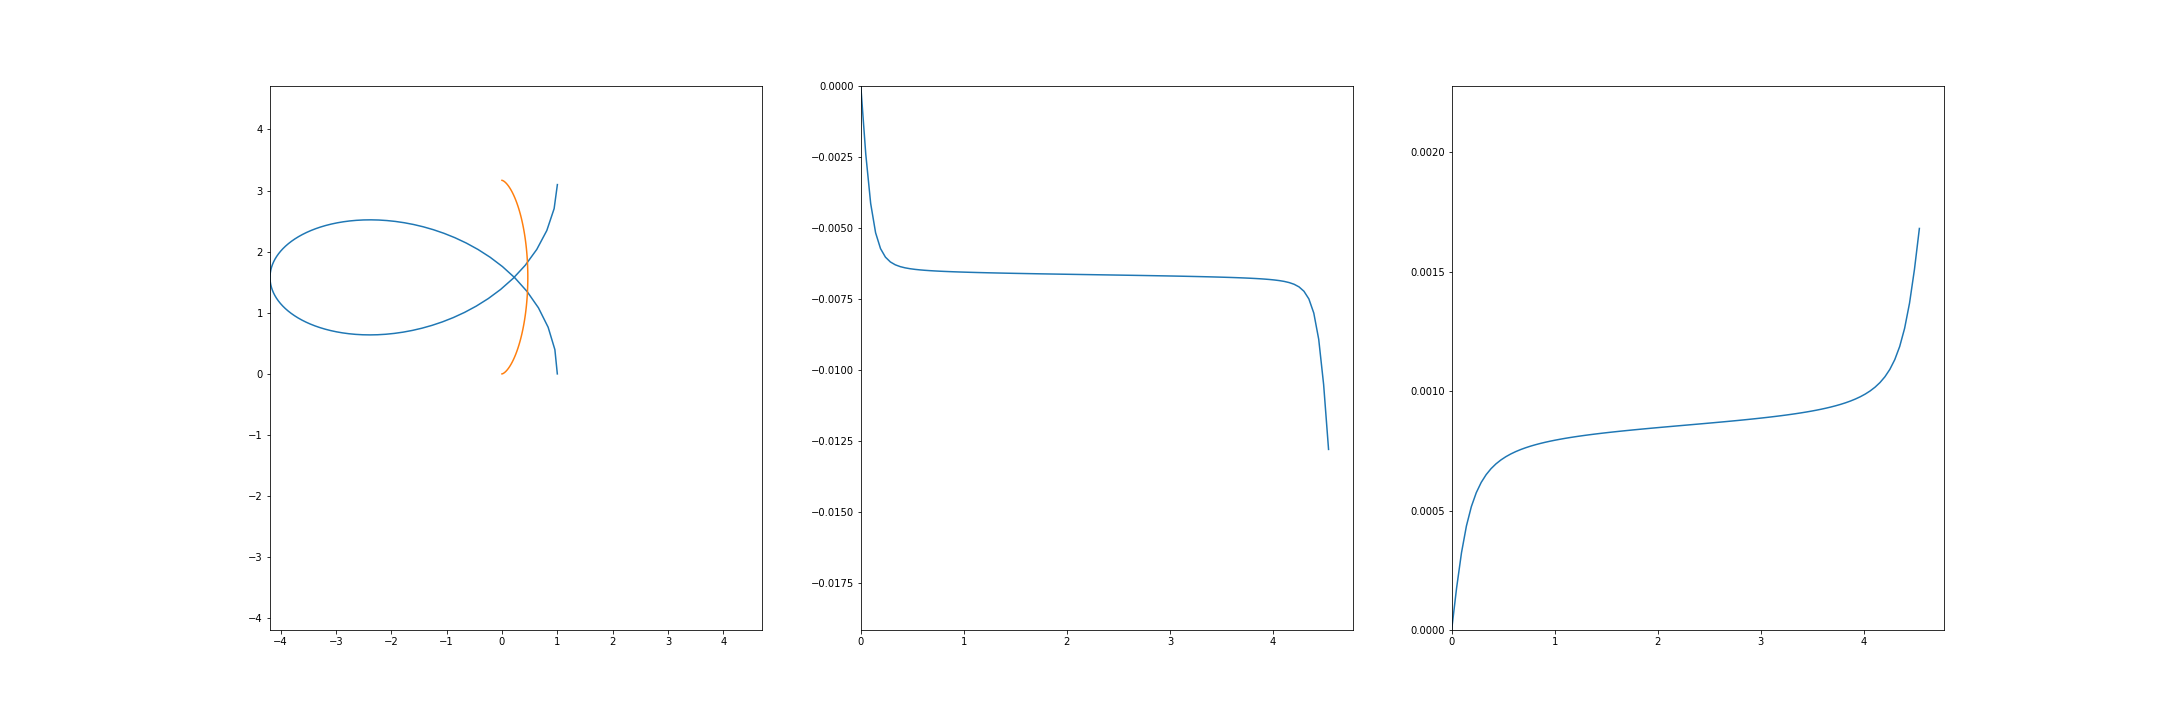
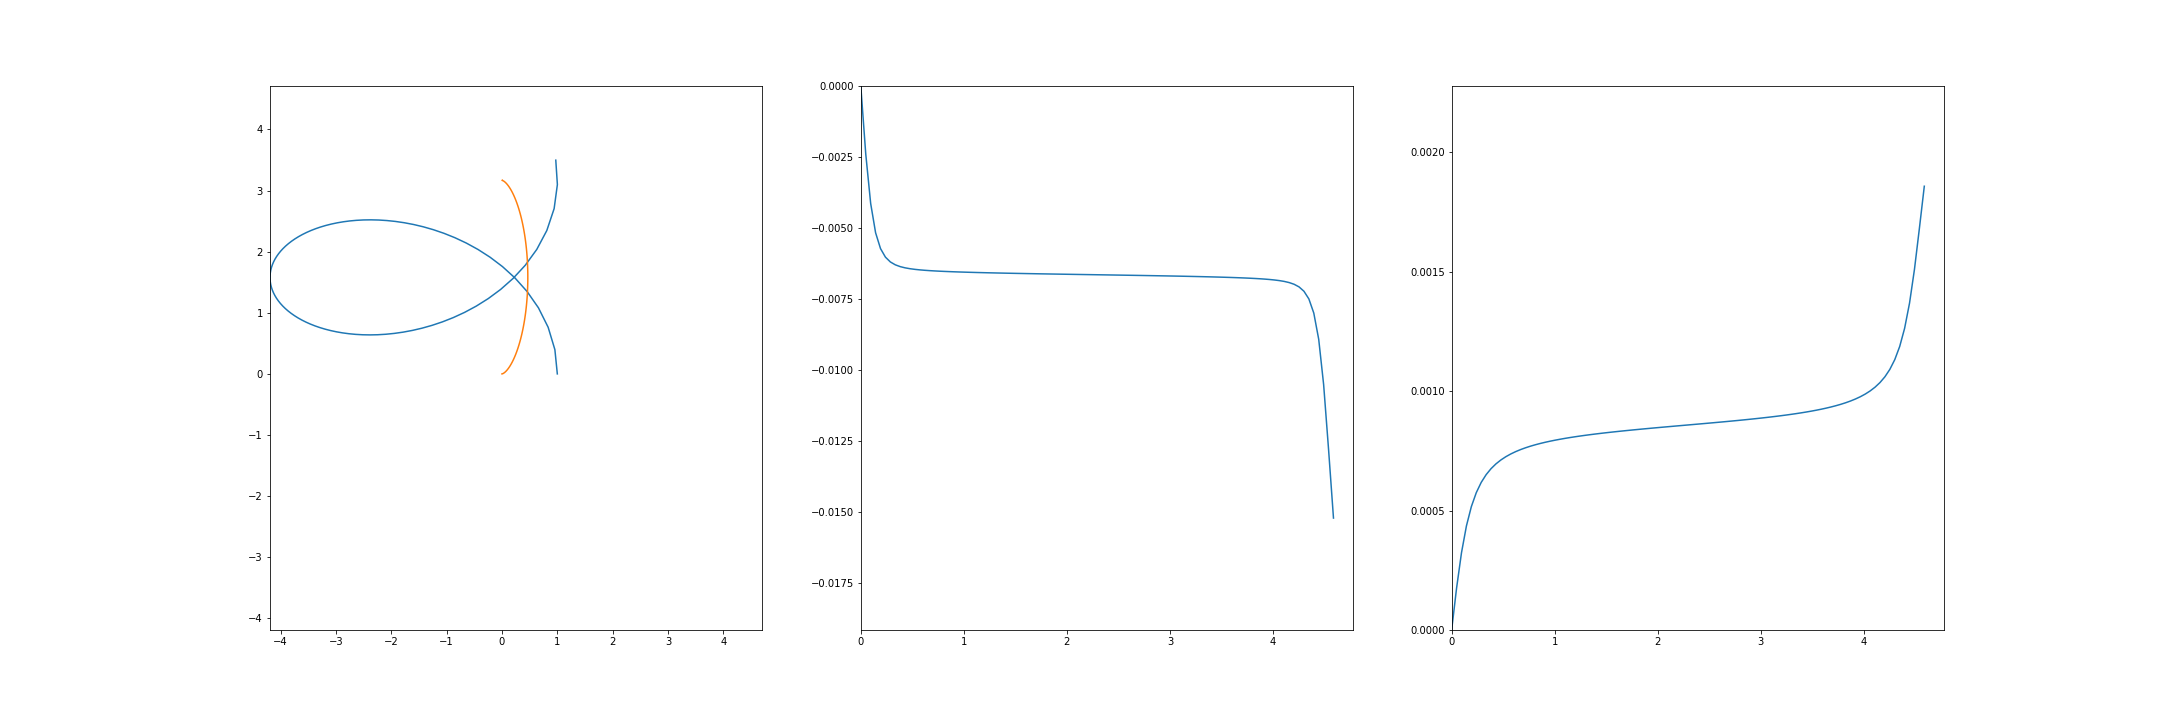
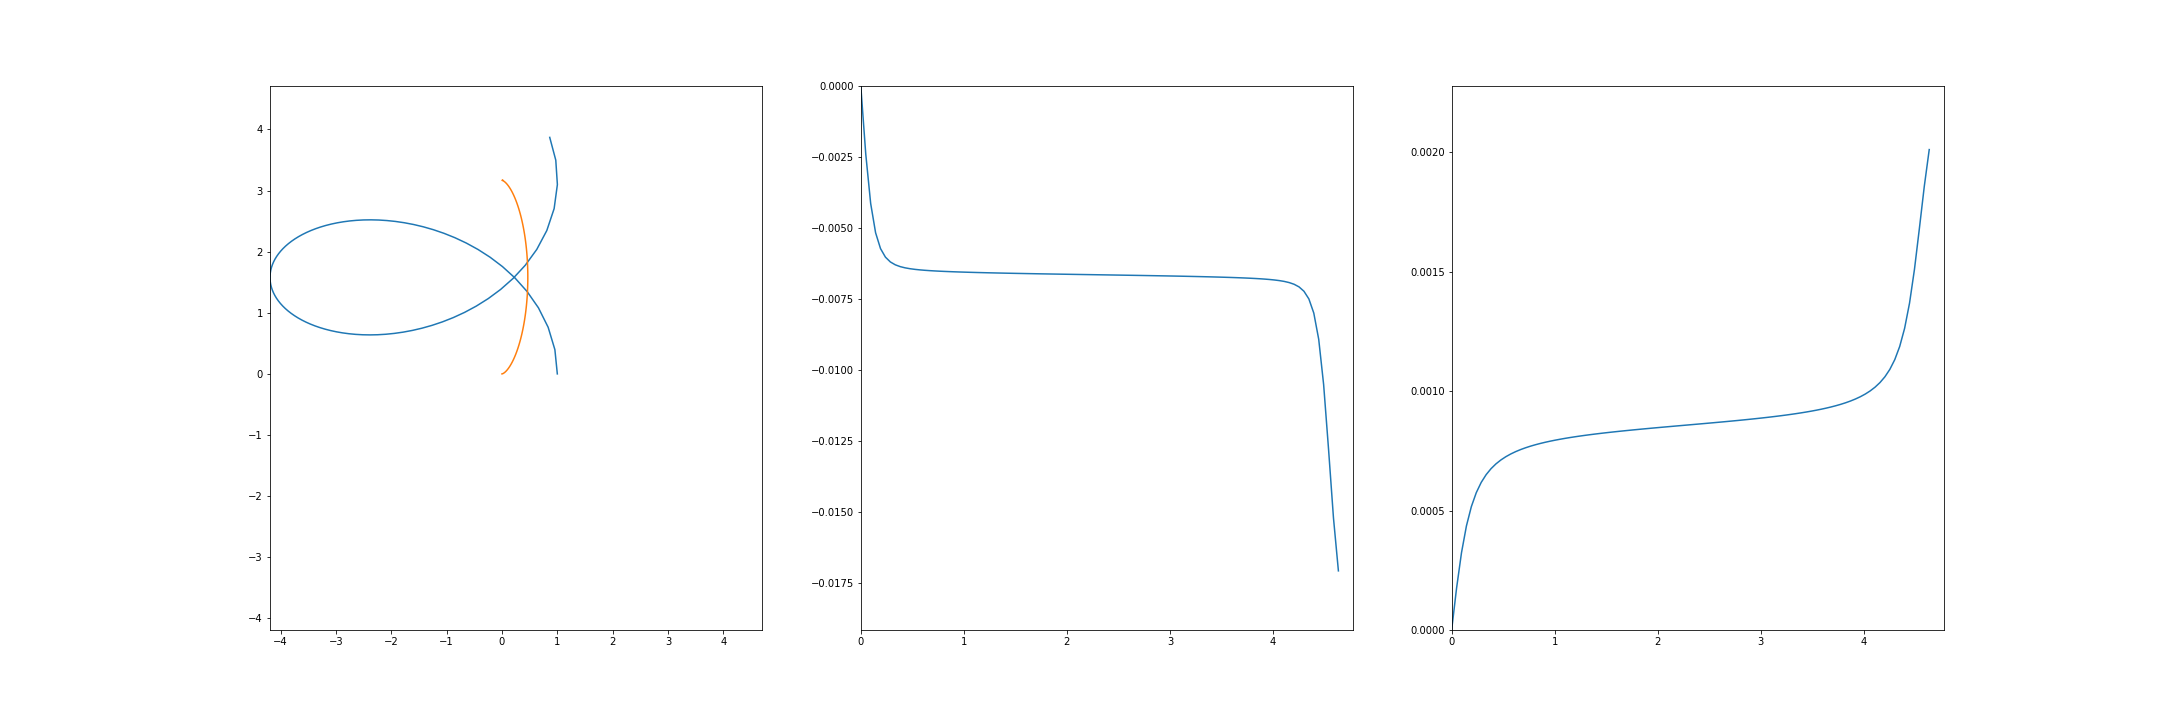
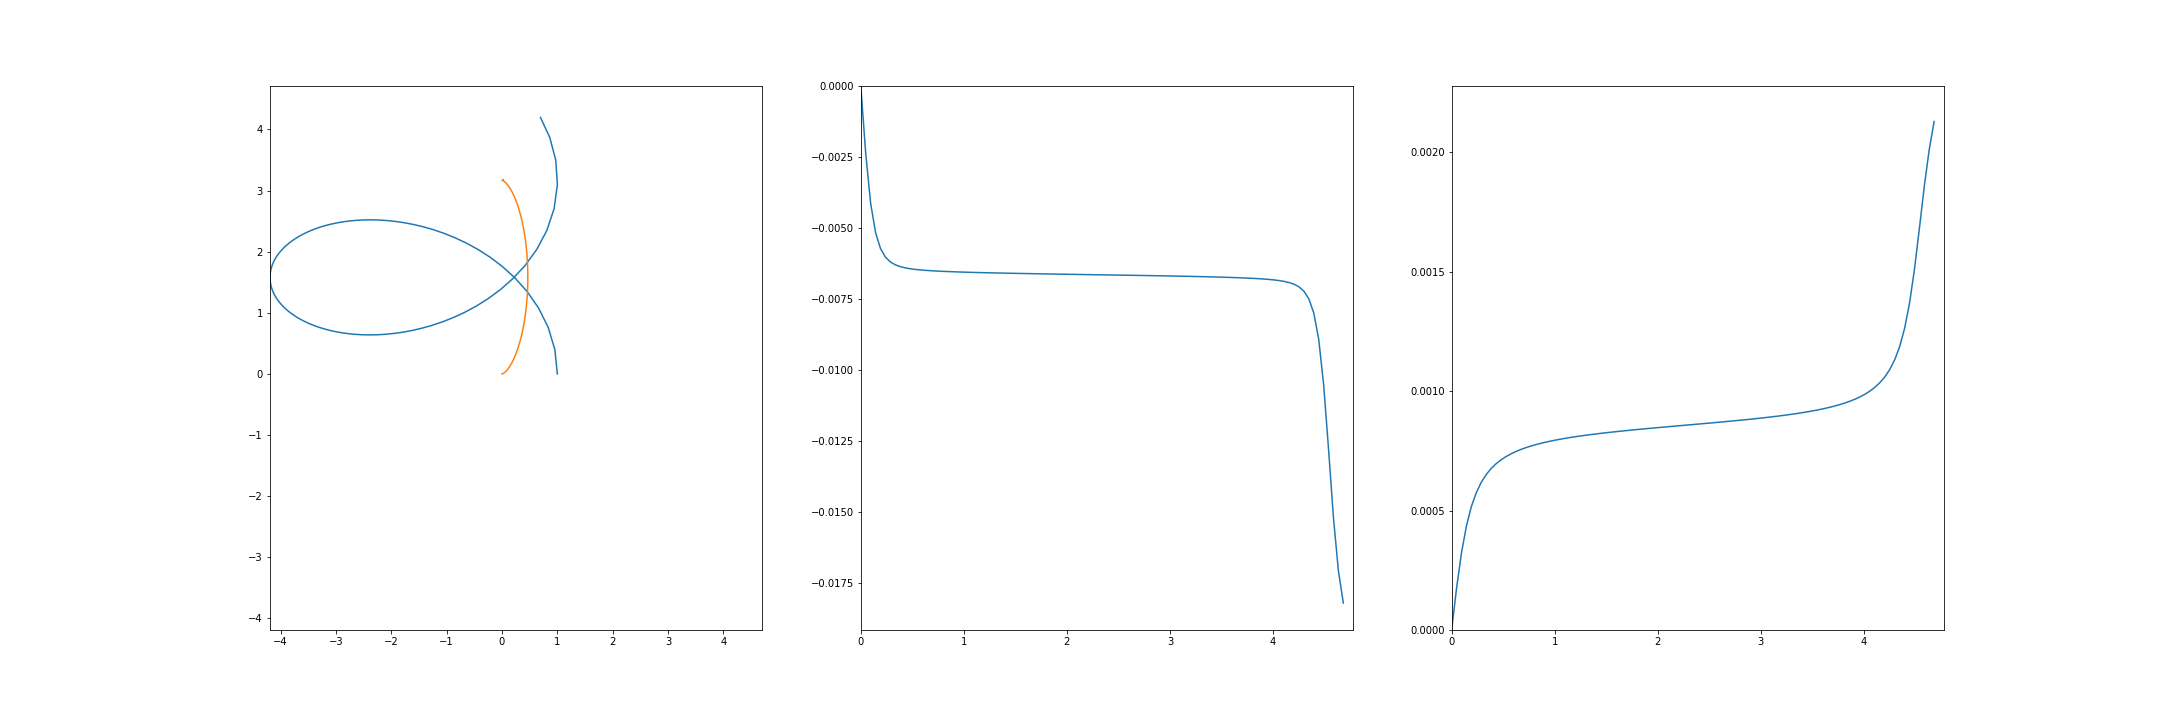

In [30]:
# start:stop:step
r = r[0:-1:stepSize,:,:]
t = t[0:-1:stepSize]
E = E[0:-1:stepSize]
L = L[0:-1:stepSize]

#nFrames = int(np.round(n_steps/stepSize))
nFrames = len(t)

print('Number of frames = ', nFrames)

# we need to initialize stuff - just setting data
def init():
    trajectory1.set_data([], [])
    trajectory2.set_data([], [])
    energy.set_data([], [])
    angMom.set_data([], [])
    return trajectory1, trajectory2, energy, angMom

# now, each time we step through
def animate(i):
    #print(i)
    trajectory1.set_data(r[:i,0,0]/AUinCM, 
                         r[:i,0,1]/AUinCM)
    trajectory2.set_data(r[:i,1,0]/AUinCM, 
                         r[:i,1,1]/AUinCM)
    
    energy.set_data(t[:i], E[:i])
    angMom.set_data(t[:i], L[:i])
    
    return trajectory1, trajectory2, energy, angMom
  
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nFrames, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

You can see that at perhelion, the place of closest approach, we have a large drop off in energy/angular momentum.

This makes sense since the force of gravity is strongest here.

### Exercise
Try this out with different masses.

Bonus: of each of the planets in our soloar system, which has the largest effect on the motion of the Sun?